Saving dataset.csv to dataset (4).csv
Enter the target column name: Disease


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9176829268292683
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.67      0.53      0.59        30
           2       0.68      0.79      0.73        24
           3       1.00      0.96      0.98        25
           4       0.60      1.00      0.75        24
           5       0.90      0.78      0.84        23
           6       1.00      0.97      0.98        33
           7       1.00      0.74      0.85        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      0.86      0.93        29
          14       1.00      0.67      0.80        24
          15       0.64      0.84      0.73        19
          16       0.97      1.0

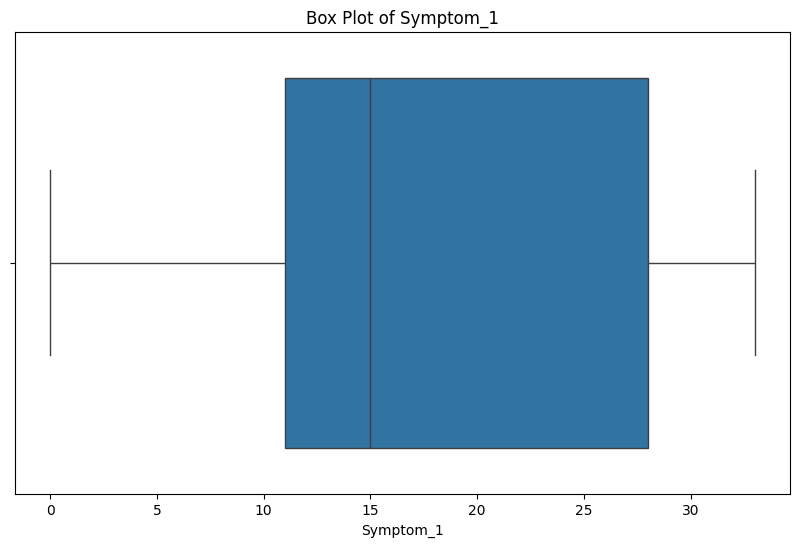

Enter the x column name for scatter plot: Symptom_1
Enter the y column name for scatter plot: Disease


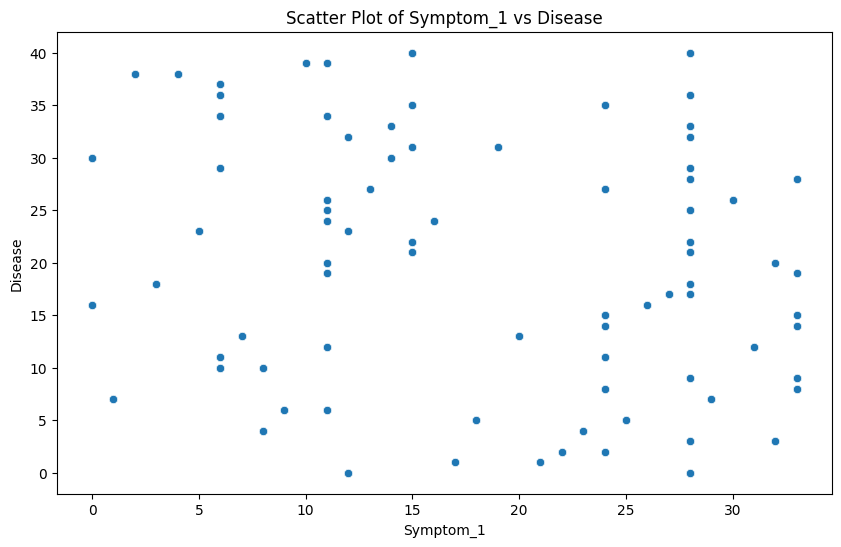

Enter a column name for bar plot: Symptom_2


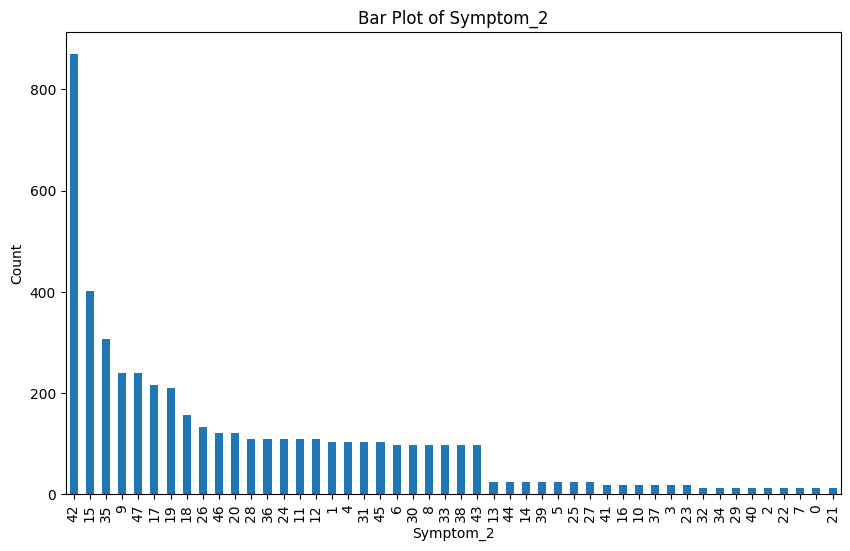

Enter a column name for pie chart: Disease


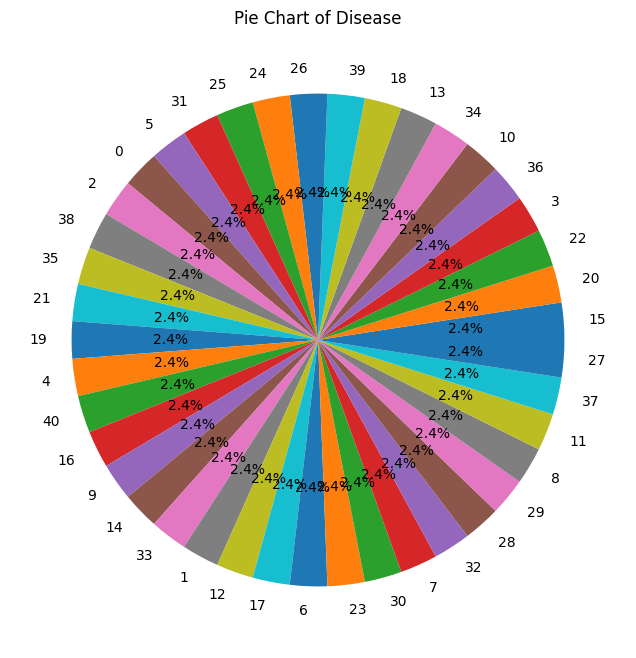

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from
# Load Data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

# File upload in Google Colab
uploaded = files.upload()
for file_name in uploaded.keys():
    file_path = file_name

data = load_data(file_path)
if data is None:
    print("No file selected. Exiting.")
    exit()

# Preprocess Data
def preprocess_data(df):
    # Convert categorical columns to numeric values
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    return df, label_encoders

data, label_encoders = preprocess_data(data)

# Split Data into Features and Target
def split_data(df, target_column):
    if target_column not in df.columns:
        print(f"Target column '{target_column}' not found in the dataset. Exiting.")
        return None, None, None, None
    X = df.drop(columns=[target_column])
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Manual input for target column
target_column = input("Enter the target column name: ")
X_train, X_test, y_train, y_test = split_data(data, target_column)
if X_train is None:
    exit()

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Multiple Models
def train_models(X_train, y_train):
    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }
    trained_models = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        trained_models[name] = model
    return trained_models

models = train_models(X_train, y_train)

# Evaluate Models
def evaluate_models(models, X_test, y_test):
    for name, model in models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {accuracy}")
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))

evaluate_models(models, X_test, y_test)

# Hyperparameter Tuning (Optional)
def hyperparameter_tuning(X_train, y_train):
    param_grid = {
        'Random Forest': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20, 30]
        }
    }
    best_models = {}
    for name, params in param_grid.items():
        grid_search = GridSearchCV(RandomForestClassifier(), params, cv=5)
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
    return best_models

best_models = hyperparameter_tuning(X_train, y_train)

# Visualizations

# Box Plot
def box_plot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

# Scatter Plot
def scatter_plot(df, x_column, y_column):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[x_column], y=df[y_column])
    plt.title(f'Scatter Plot of {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Bar Plot
def bar_plot(df, column):
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Pie Chart
def pie_chart(df, column):
    plt.figure(figsize=(8, 8))
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Pie Chart of {column}')
    plt.ylabel('')
    plt.show()

# Example usage of visualizations
column_name = input("Enter a column name for box plot: ")
box_plot(data, column_name)

x_column = input("Enter the x column name for scatter plot: ")
y_column = input("Enter the y column name for scatter plot: ")
scatter_plot(data, x_column, y_column)

column_name = input("Enter a column name for bar plot: ")
bar_plot(data, column_name)

column_name = input("Enter a column name for pie chart: ")
pie_chart(data, column_name)


In [20]:
data.head()

Disease  Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  \
0       15         33         35         35         11         38         32   
1       15         24         27         18         50         38         32   
2       15         33         27         18         50         38         32   
3       15         33         35         18         50         38         32   
4       15         33         35         35         50         38         32   

   Symptom_7  Symptom_8  Symptom_9  Symptom_10  Symptom_11  Symptom_12  \
0         26         21         22          21          18          11   
1         26         21         22          21          18          11   
2         26         21         22          21          18          11   
3         26         21         22          21          18          11   
4         26         21         22          21          18          11   

   Symptom_13  Symptom_14  Symptom_15  Symptom_16  Symptom_17  
0           8           4           3           3           1  
1           8           4           3           3           1  
2           8           4           3           3           1  
3           8           4           3           3           1  
4           8           4           3           3           1

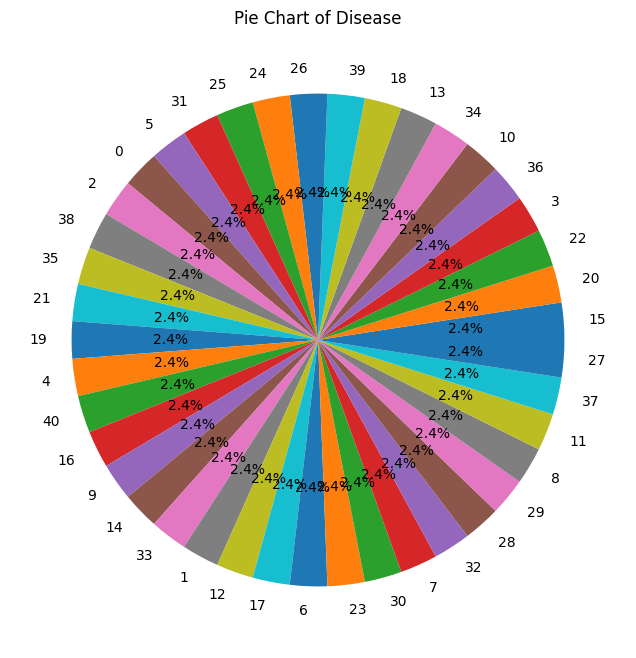

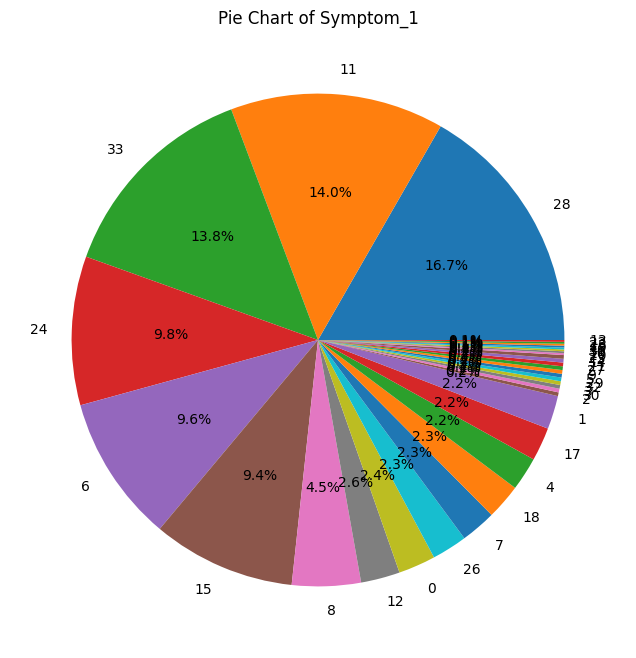

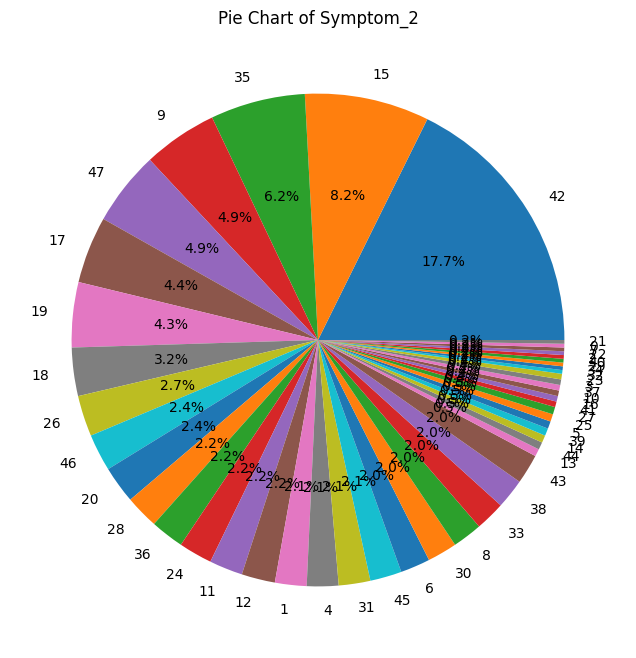

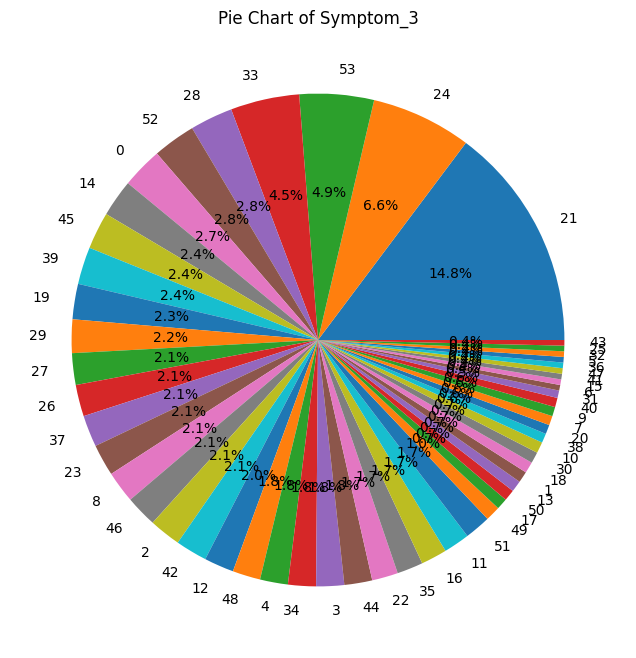

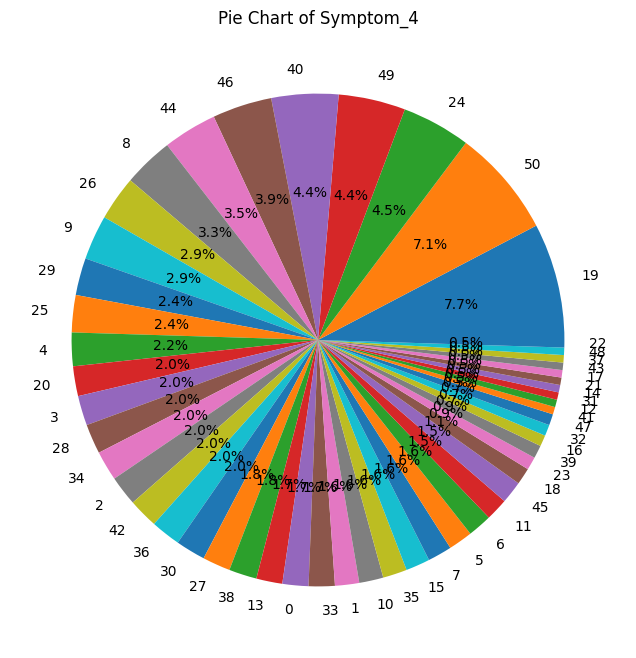

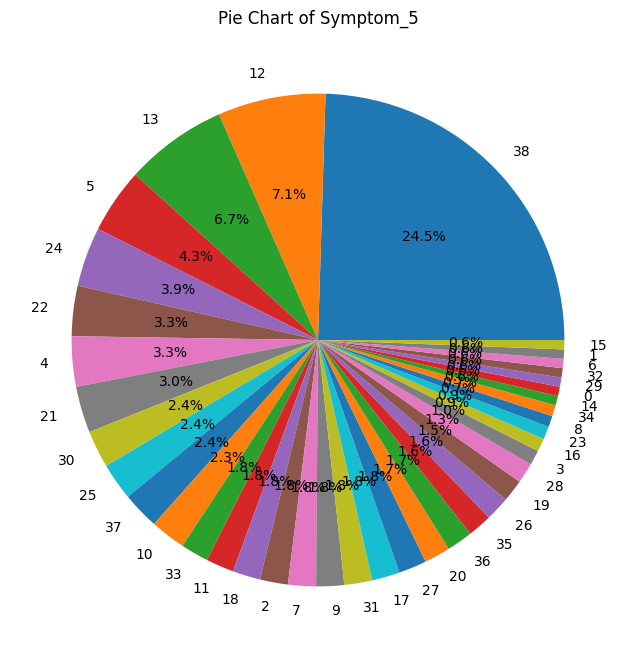

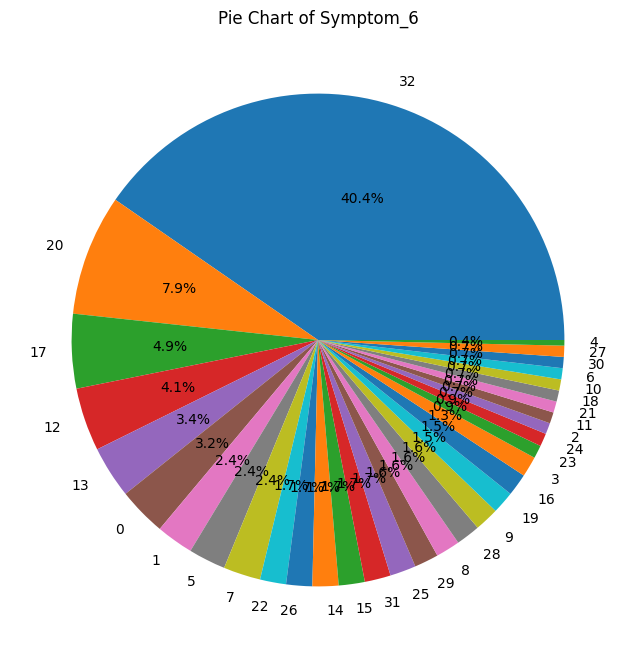

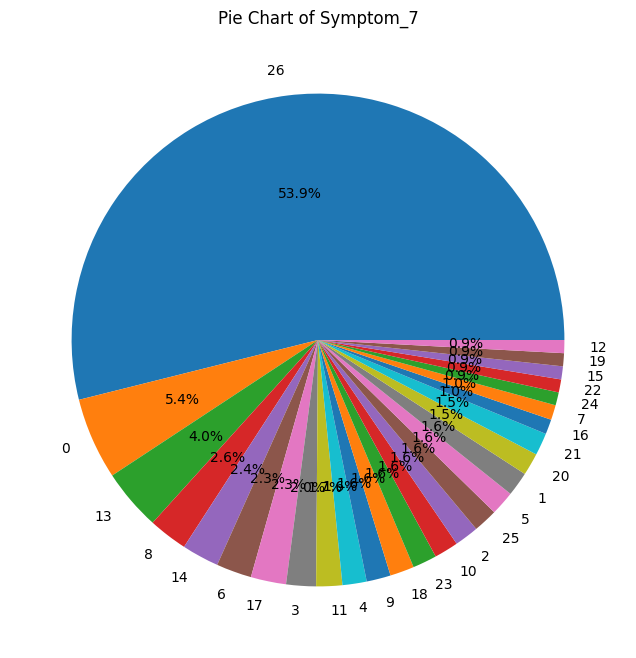

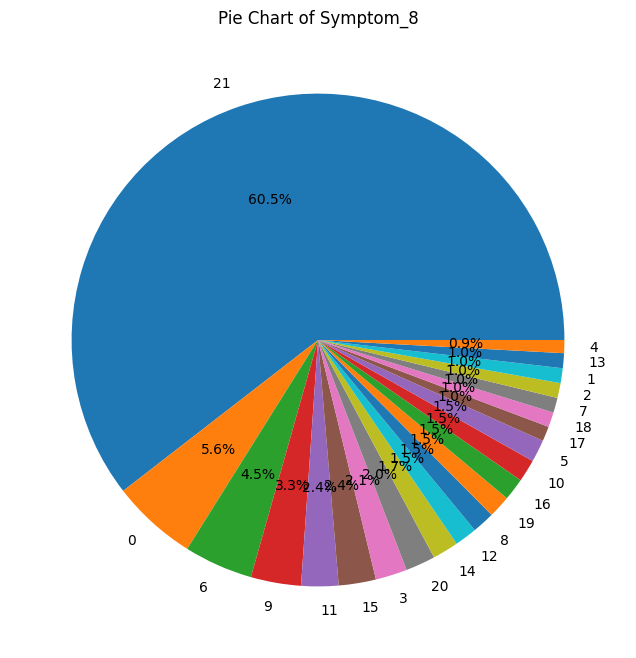

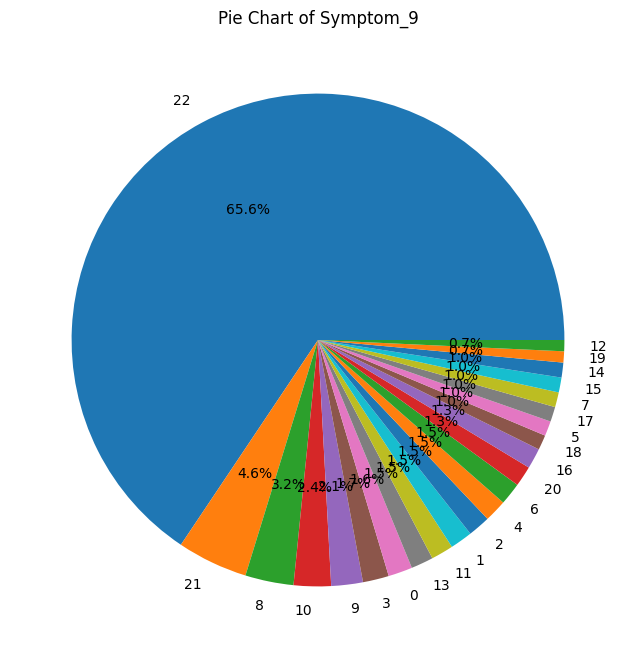

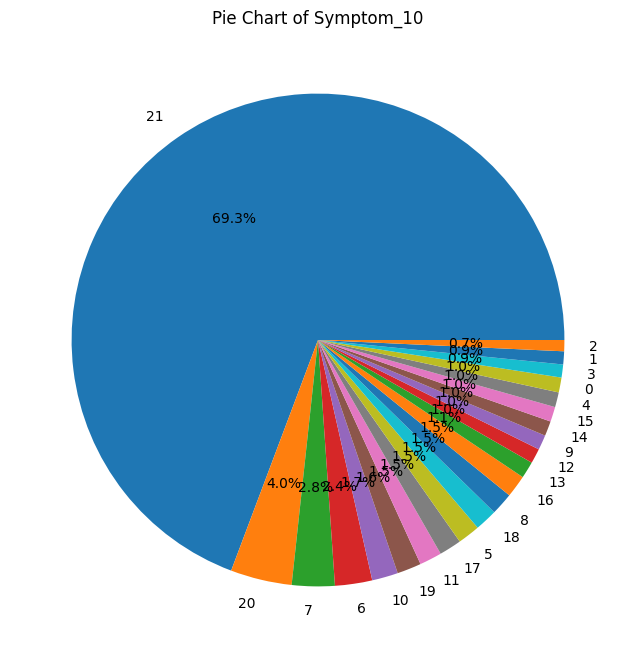

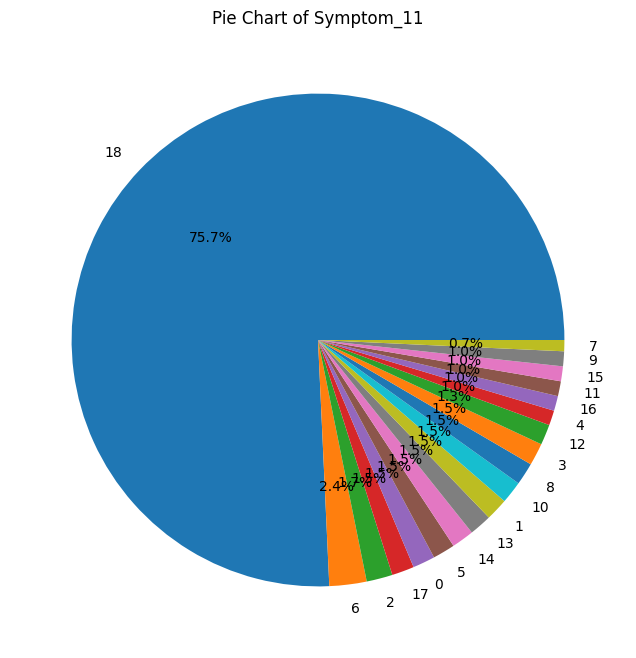

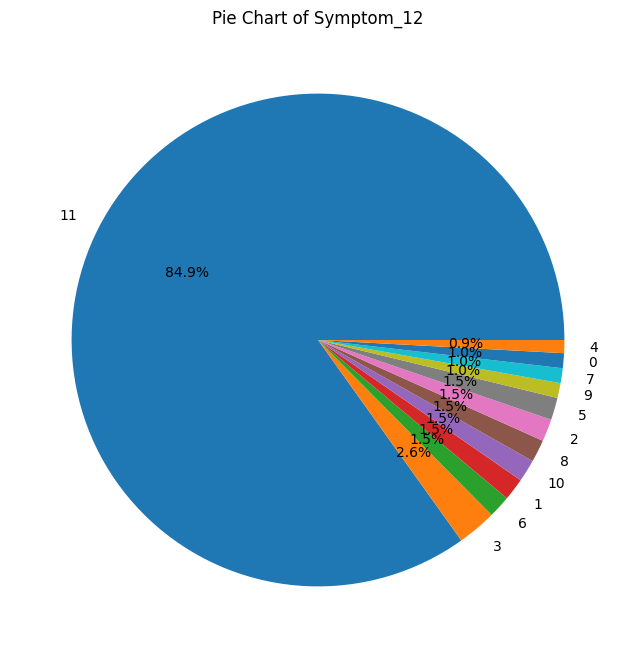

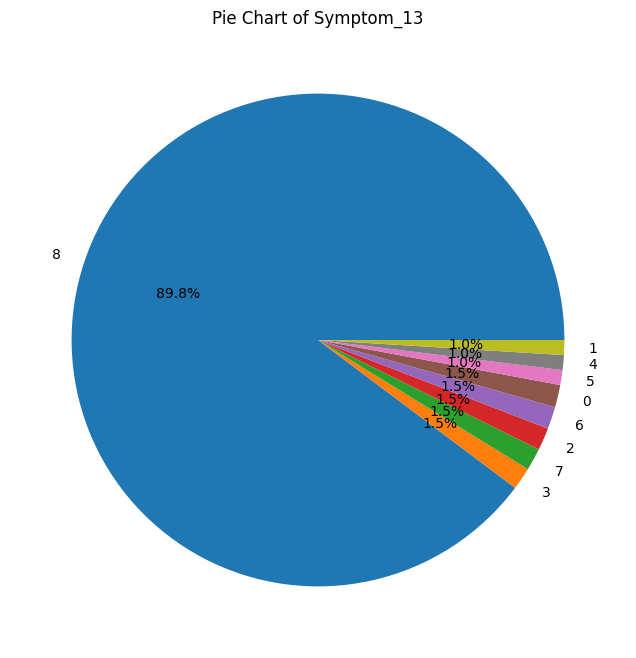

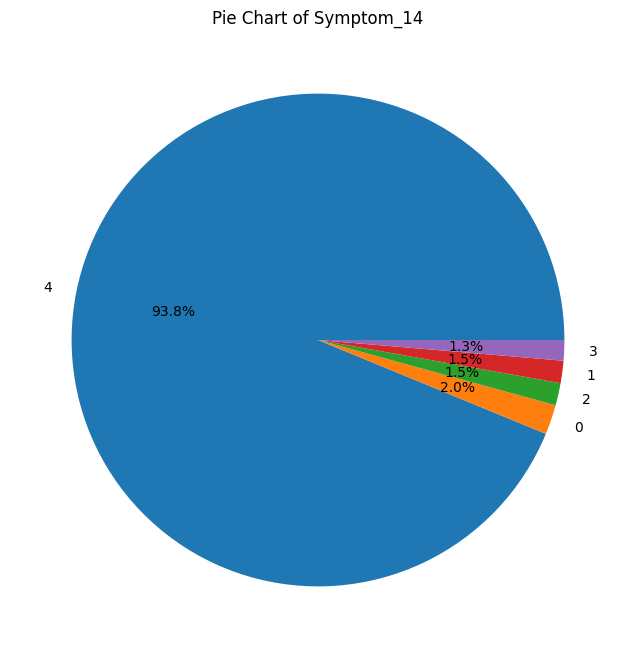

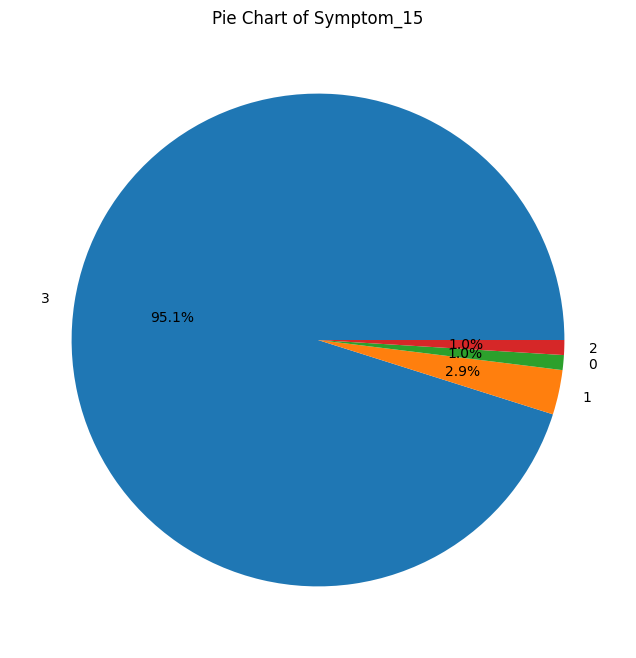

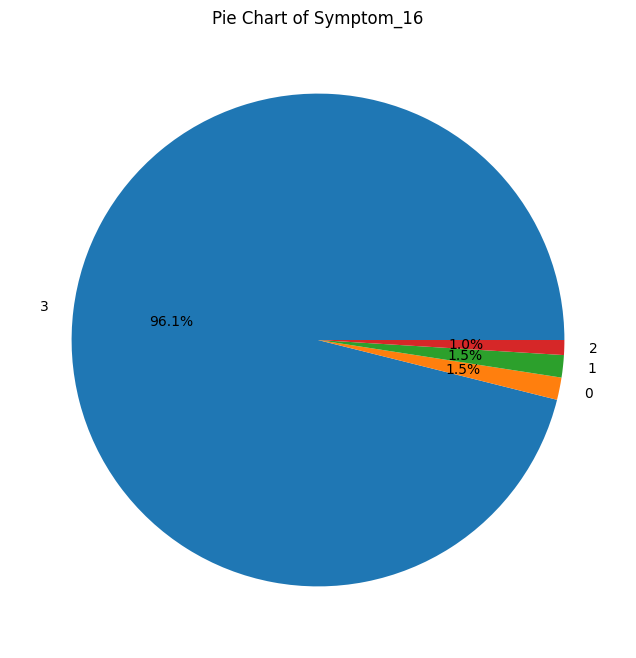

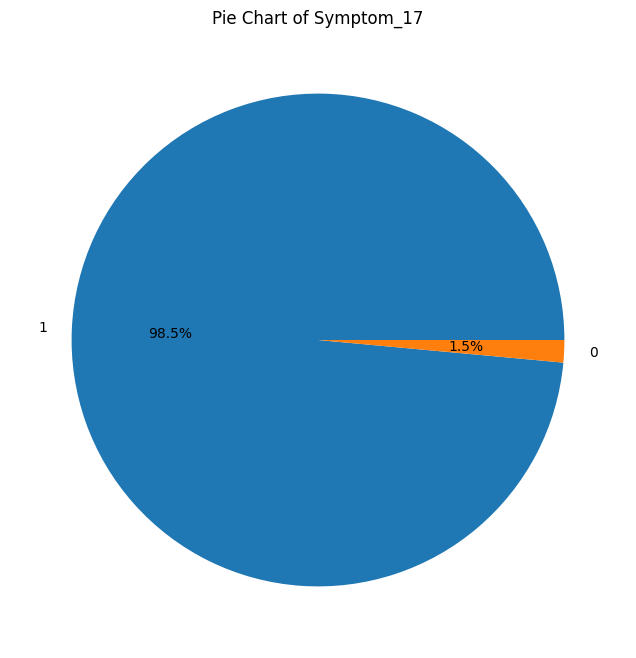

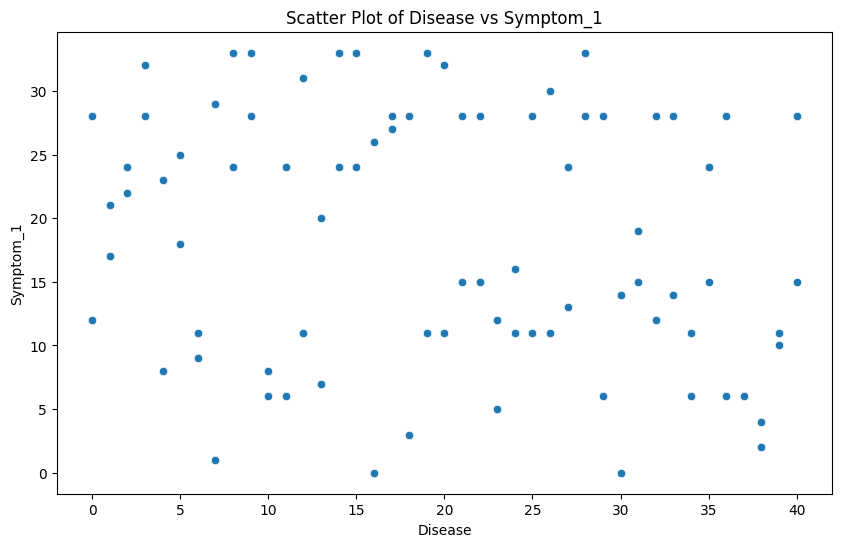

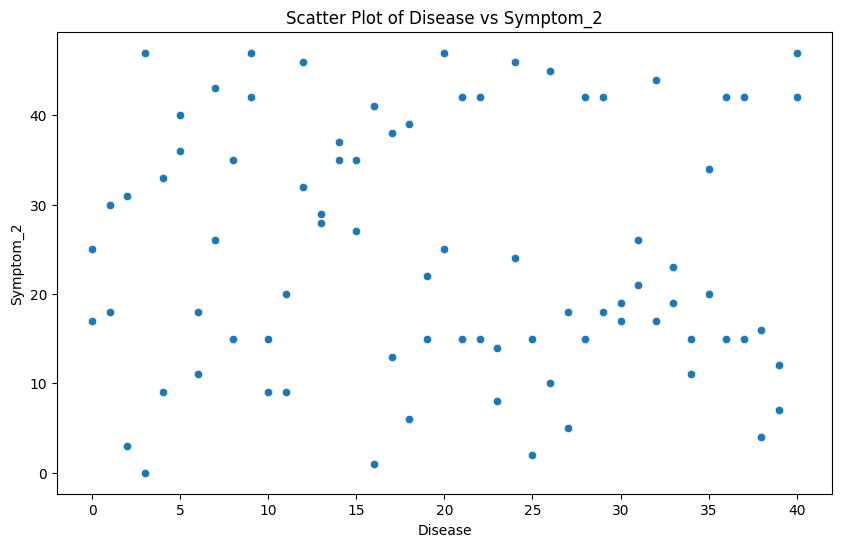

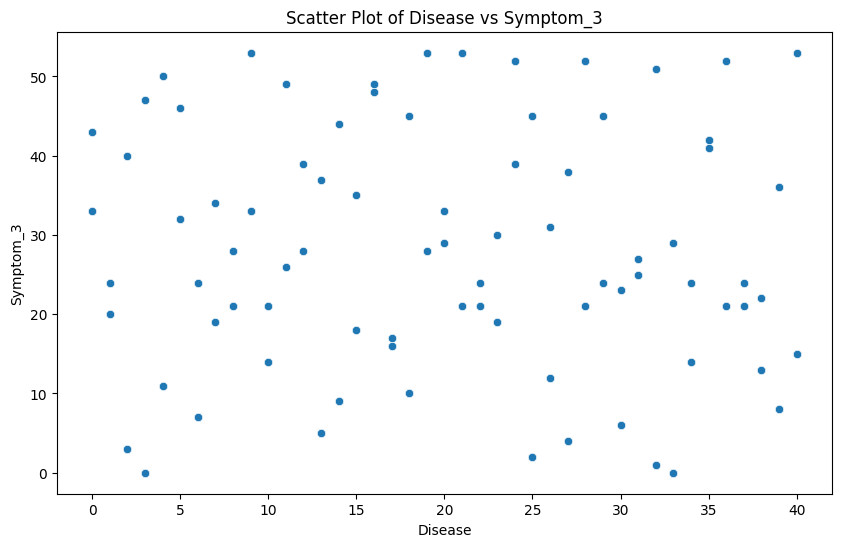

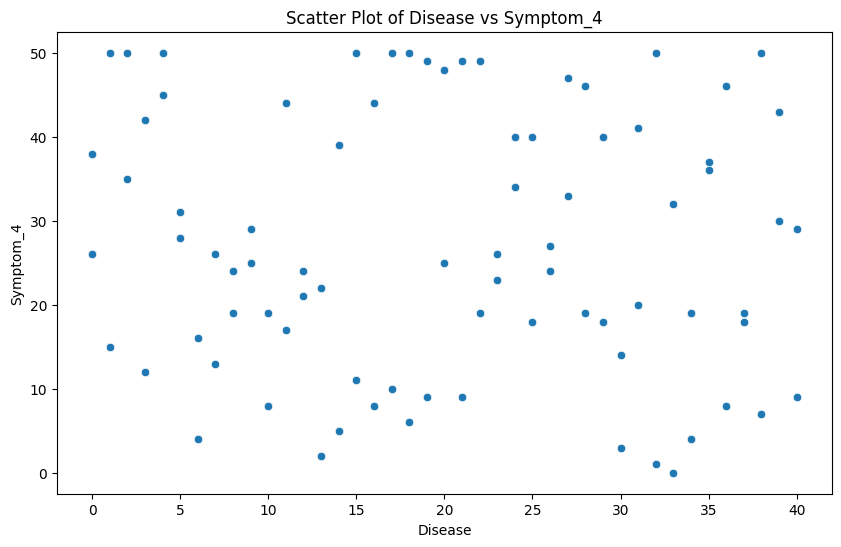

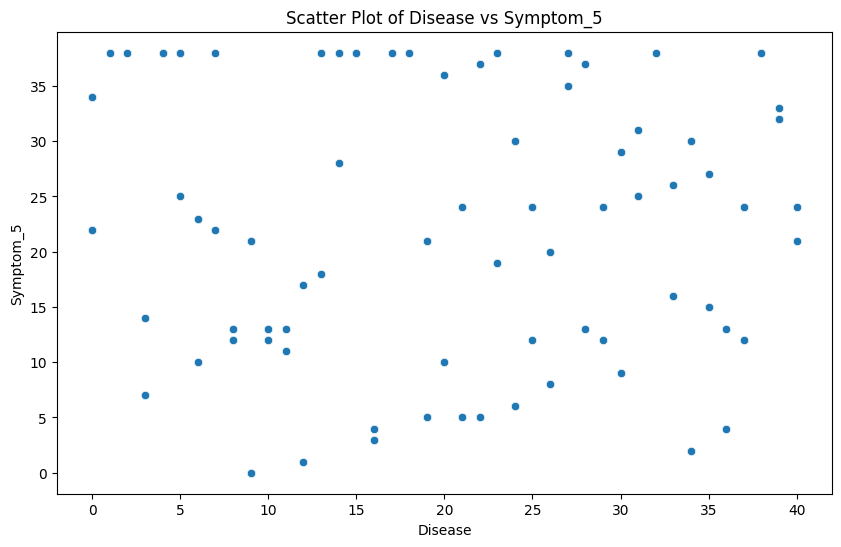

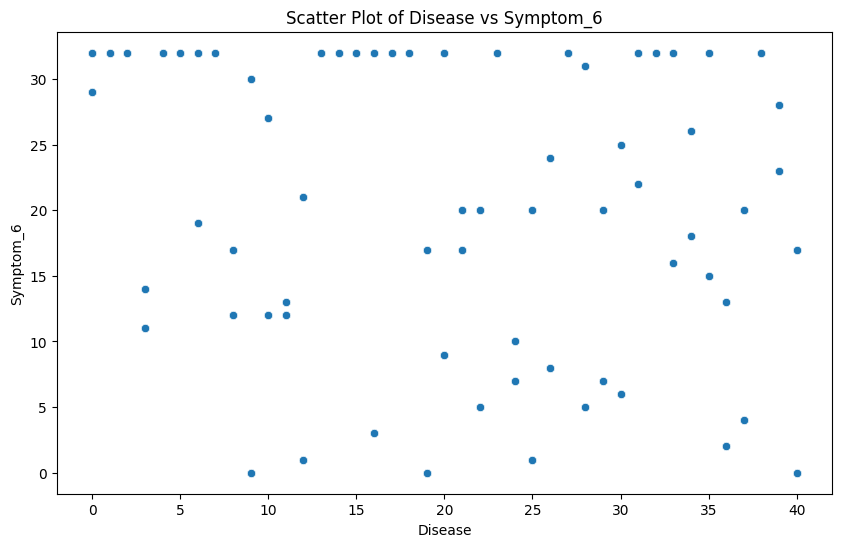

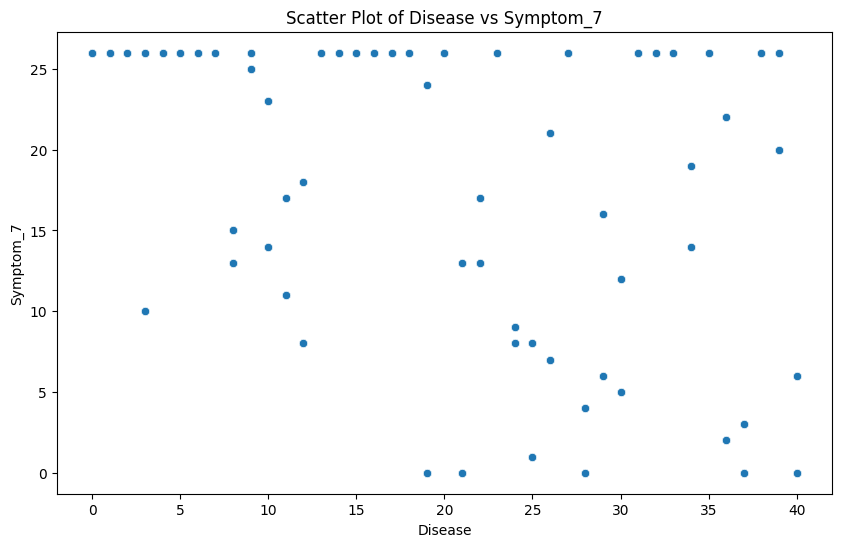

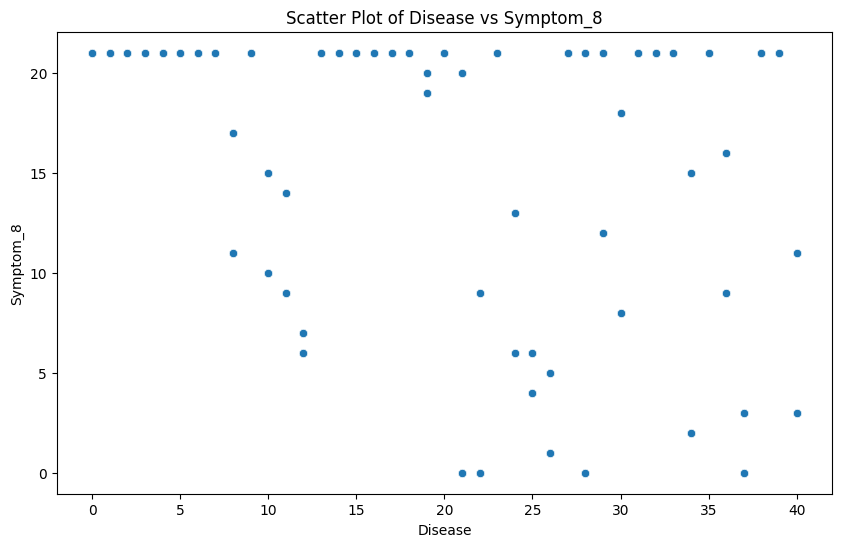

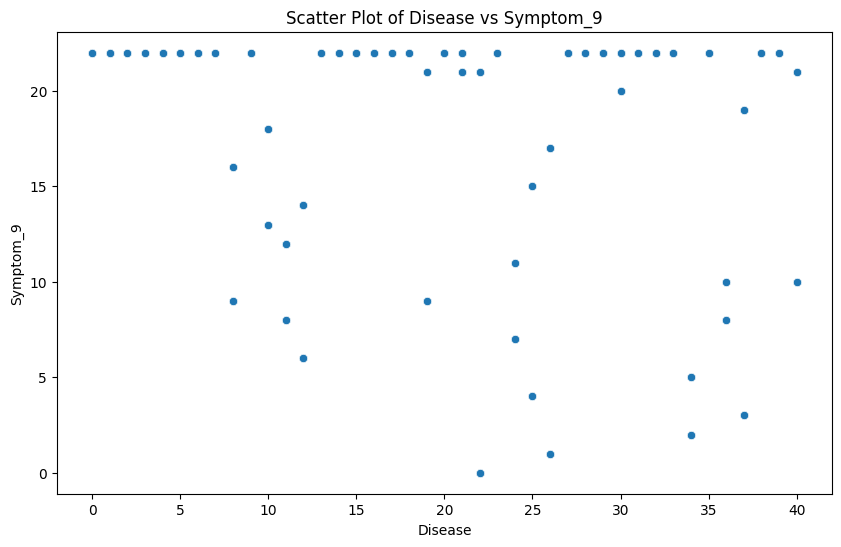

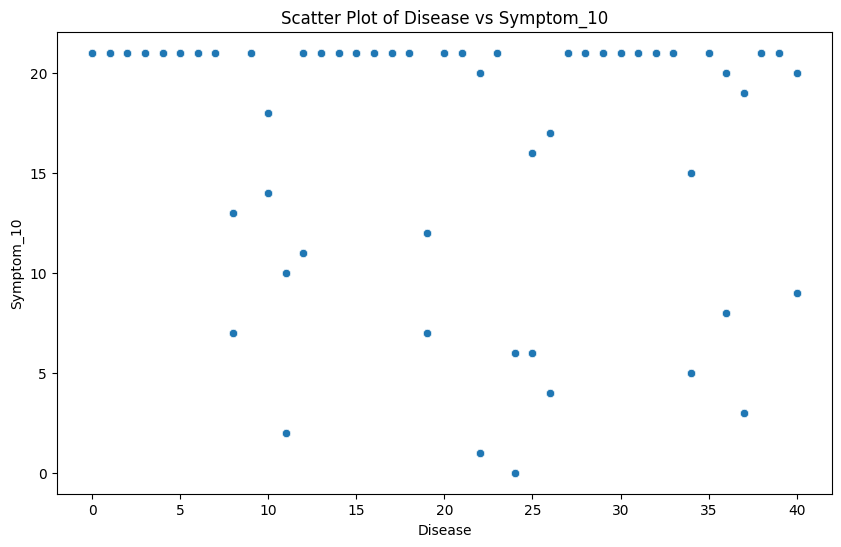

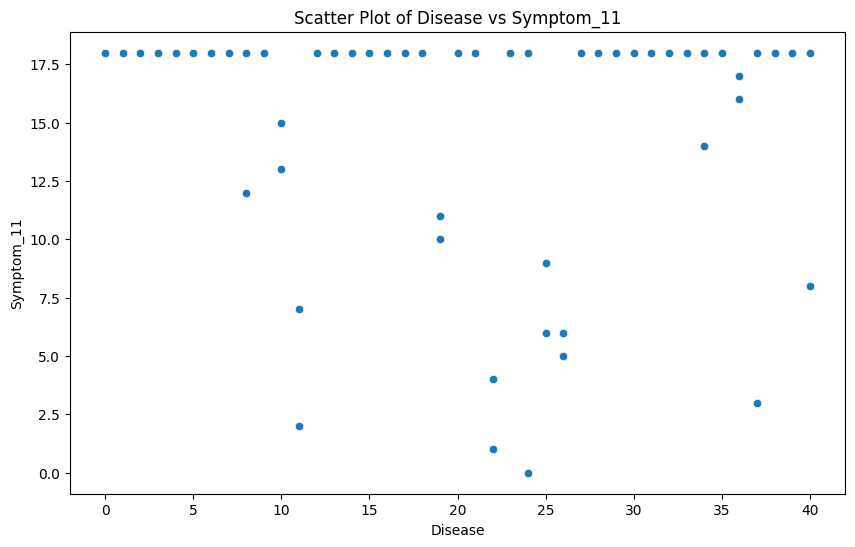

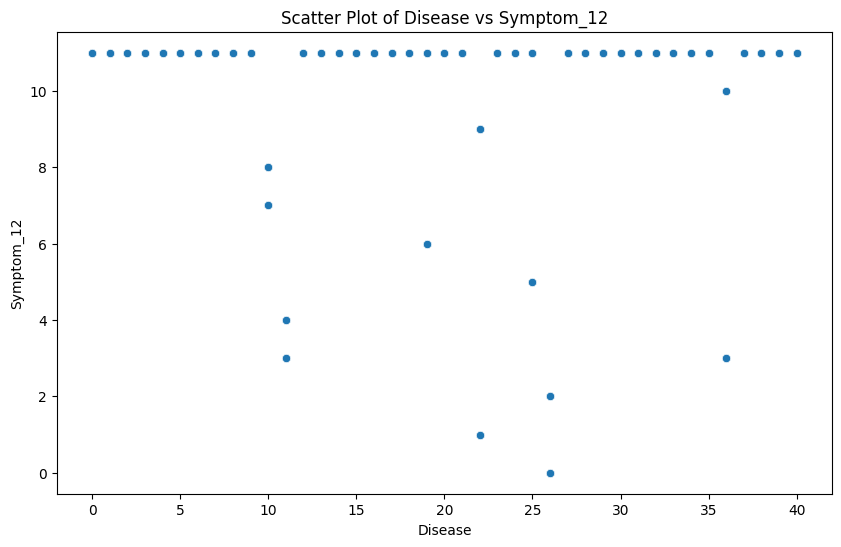

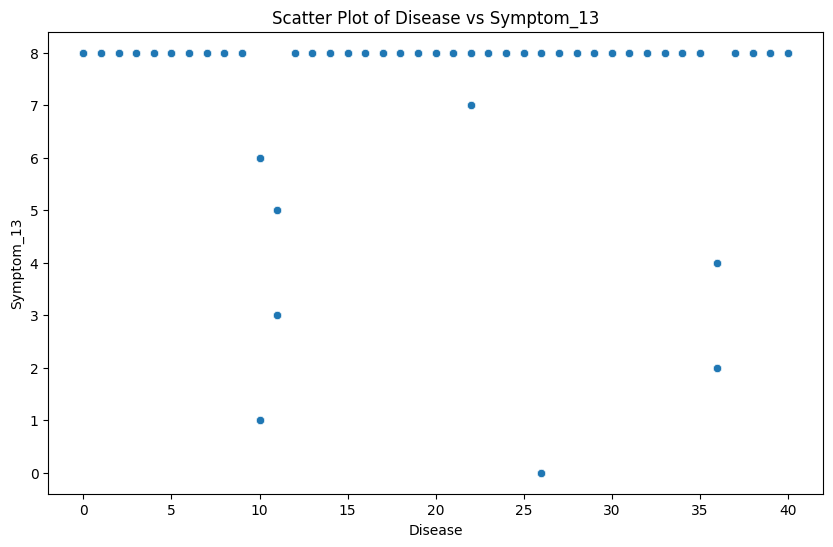

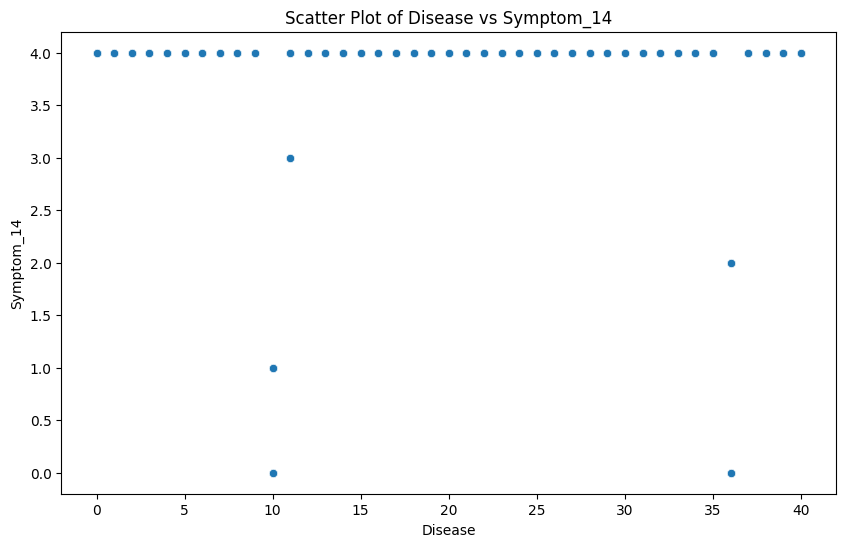

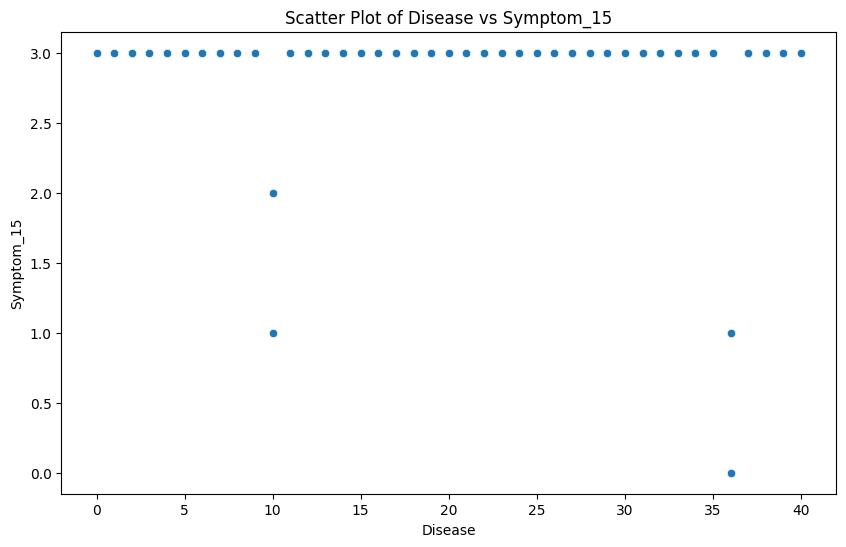

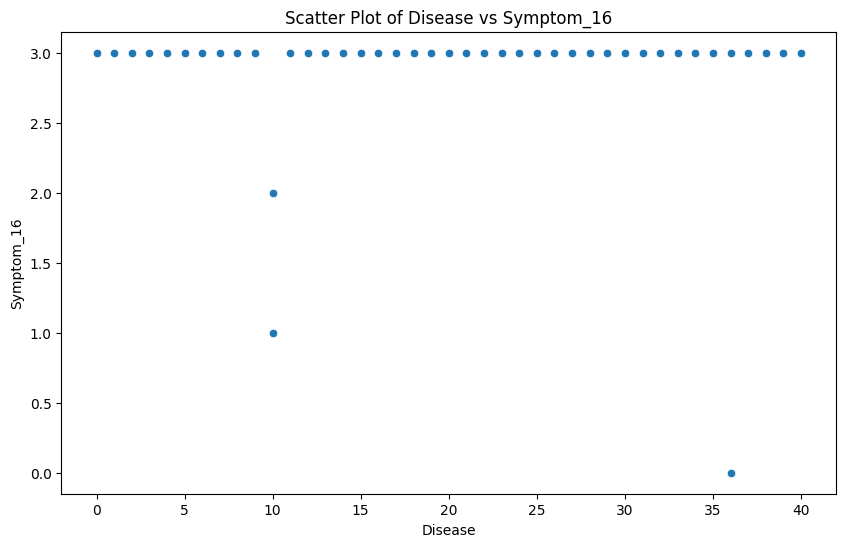

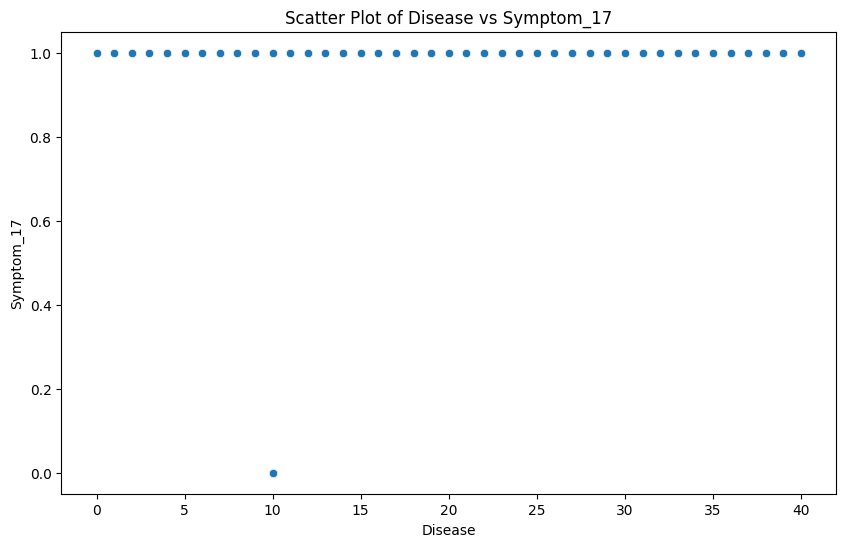

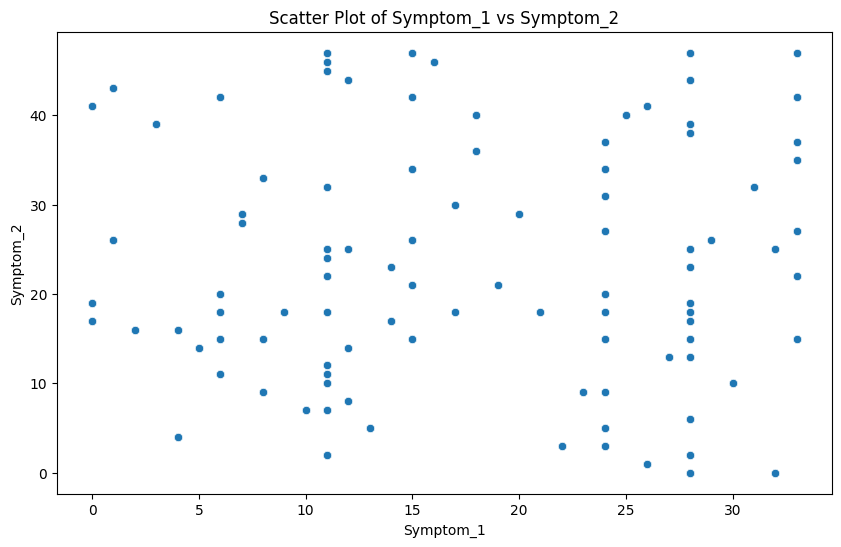

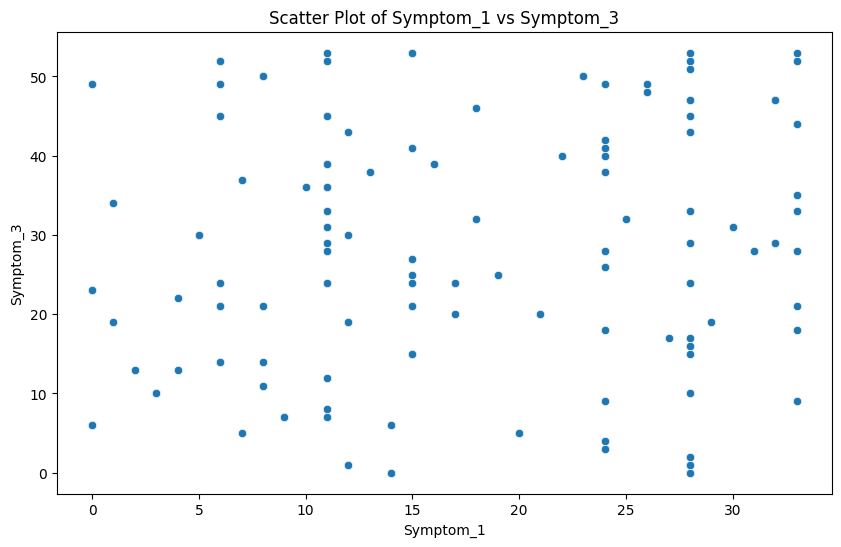

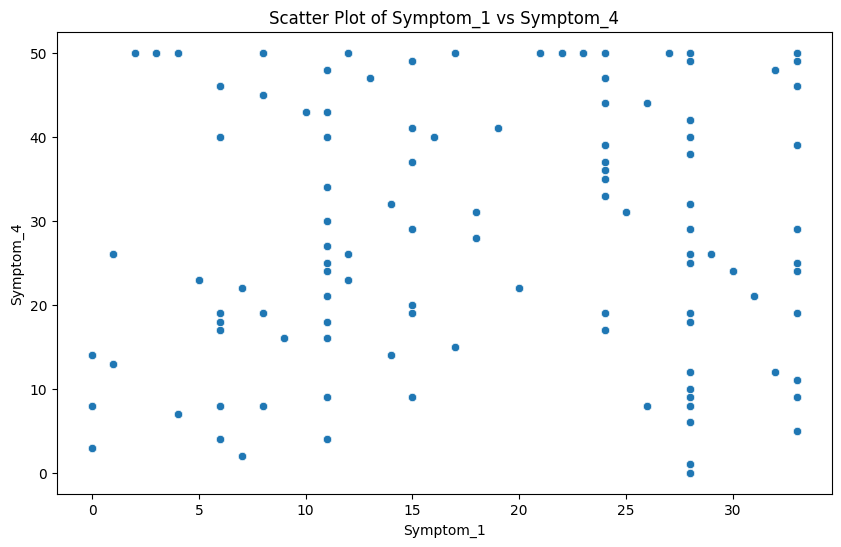

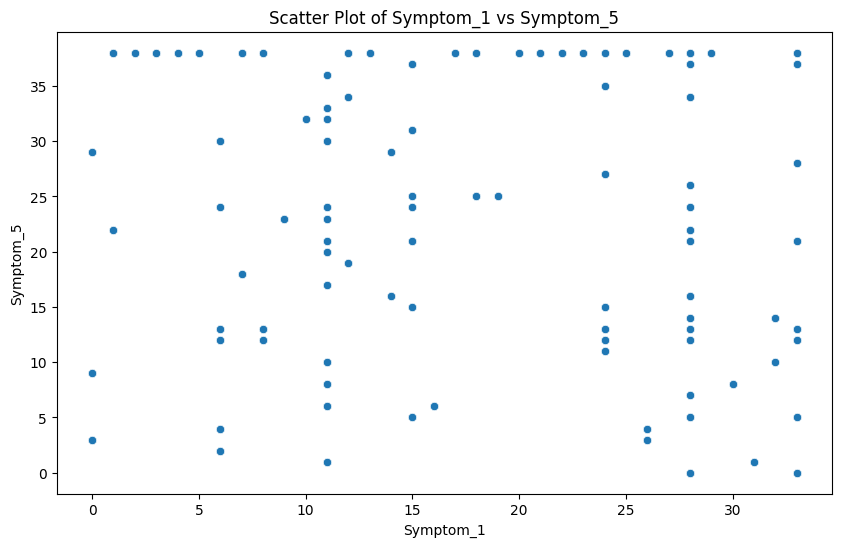

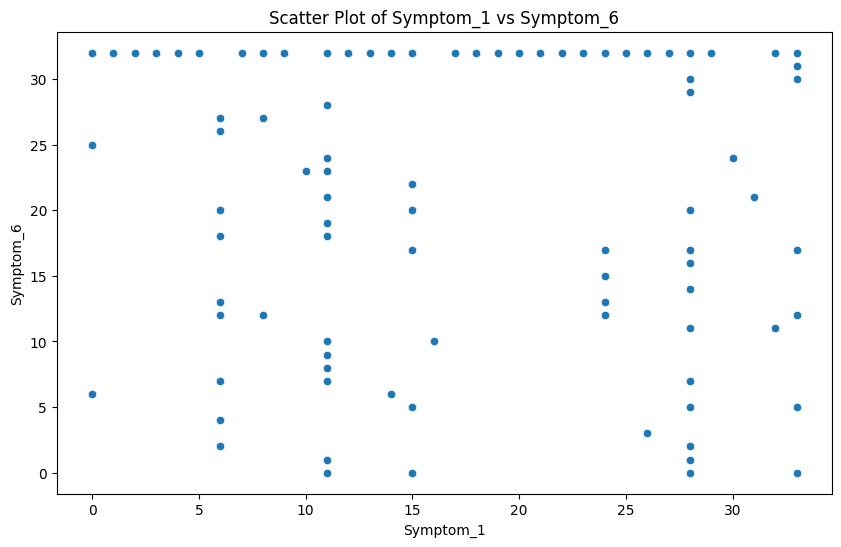

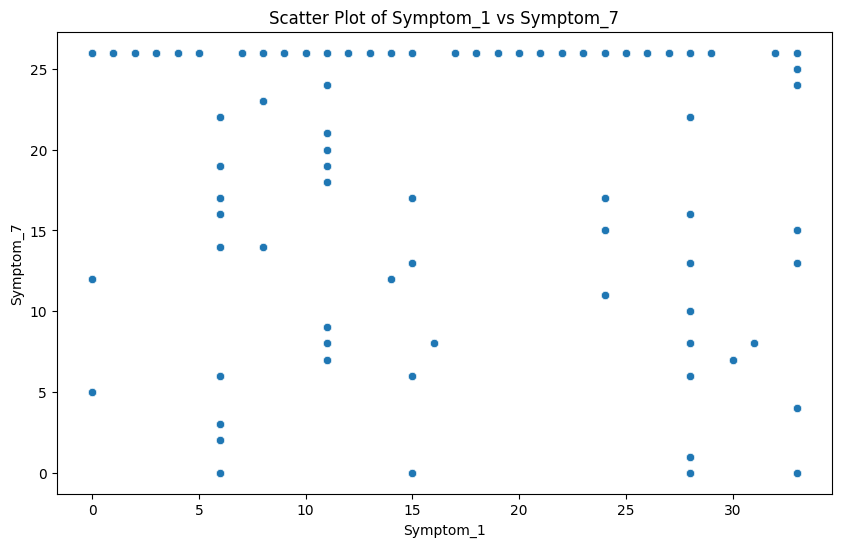

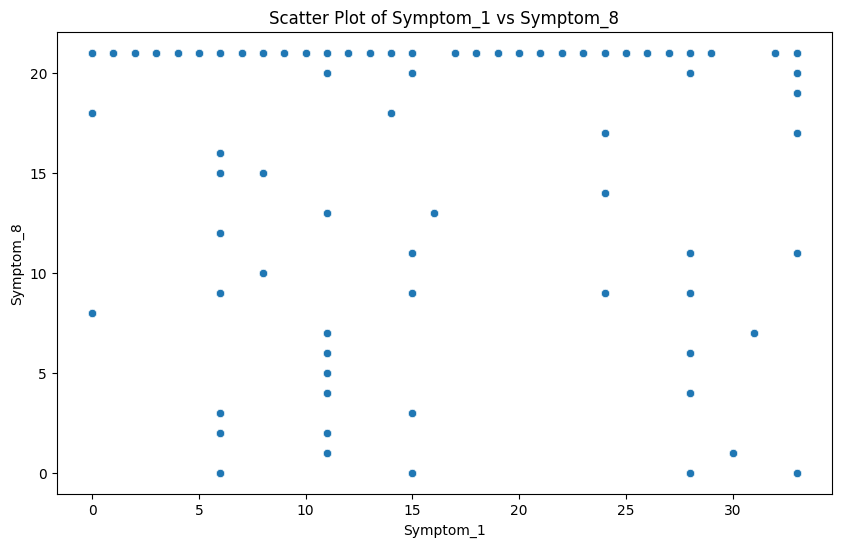

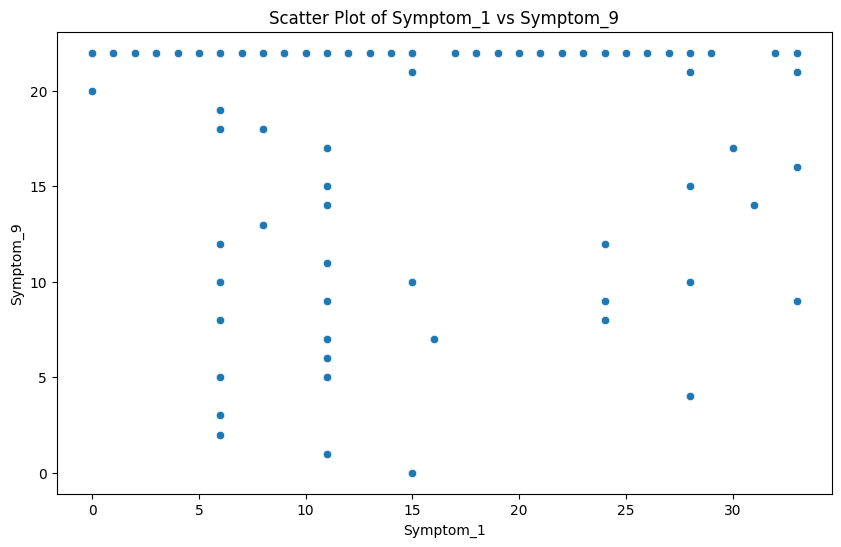

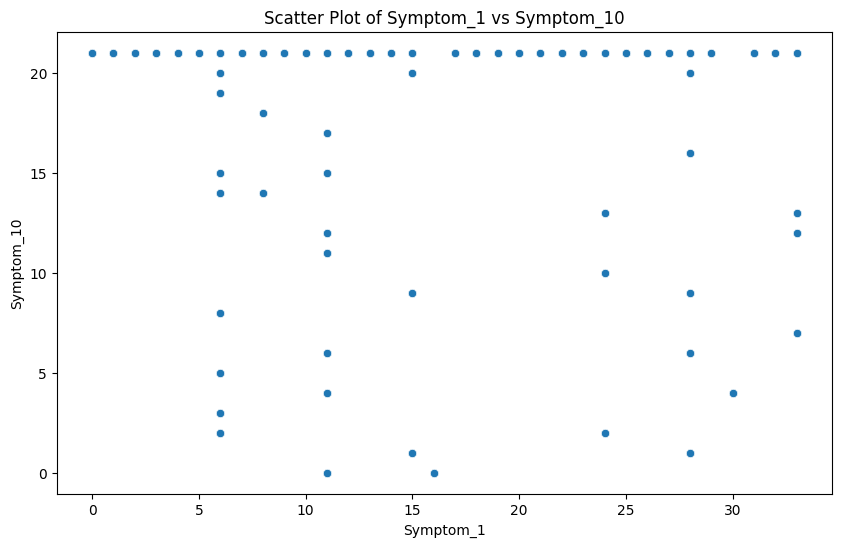

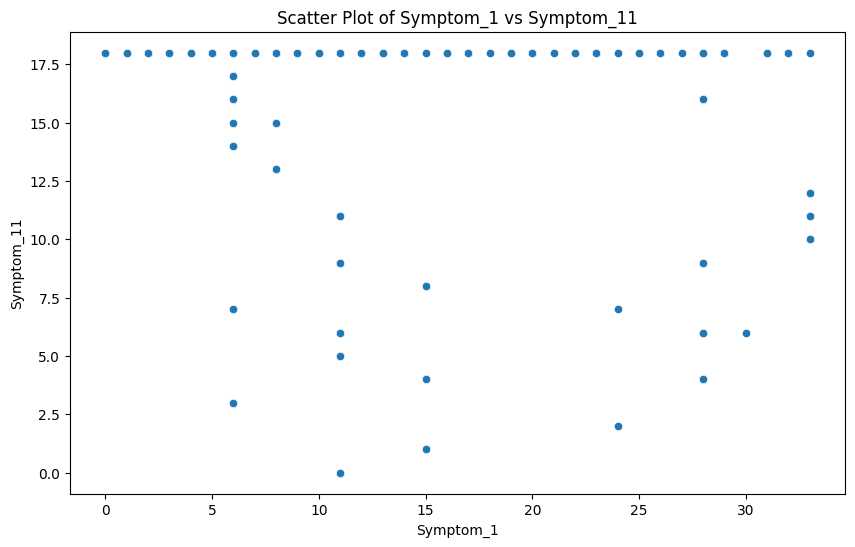

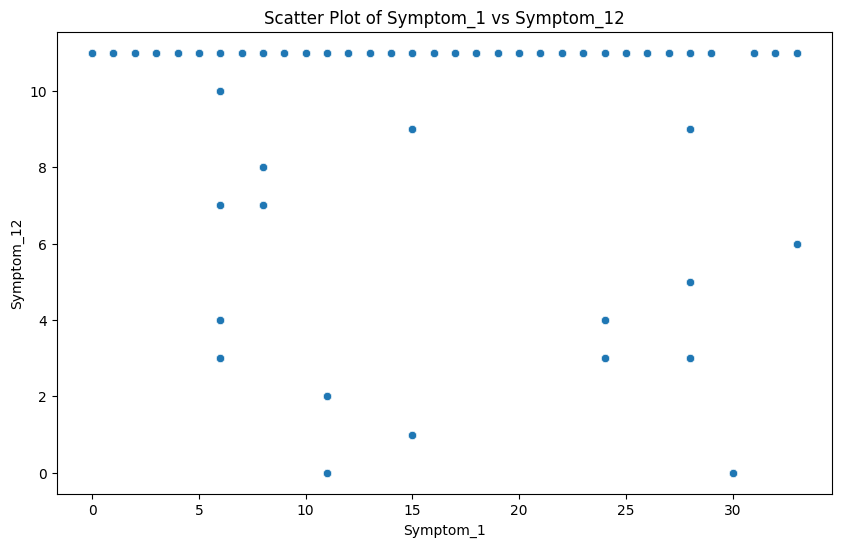

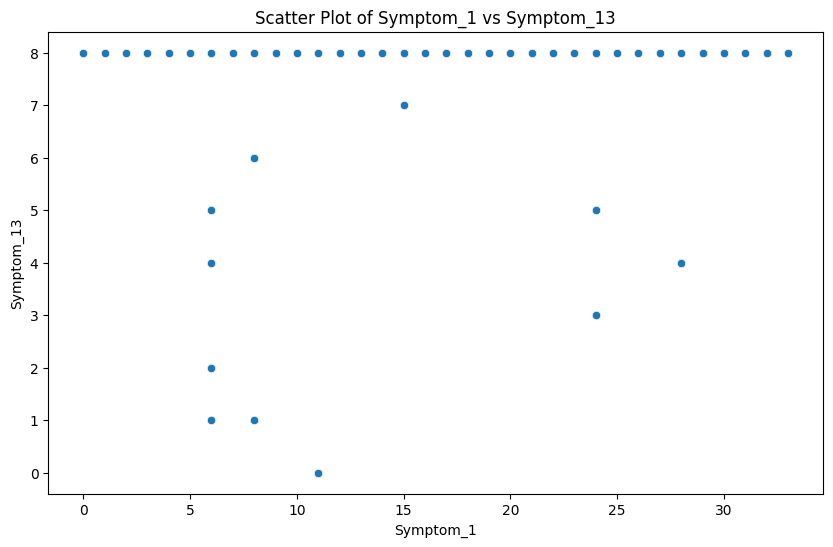

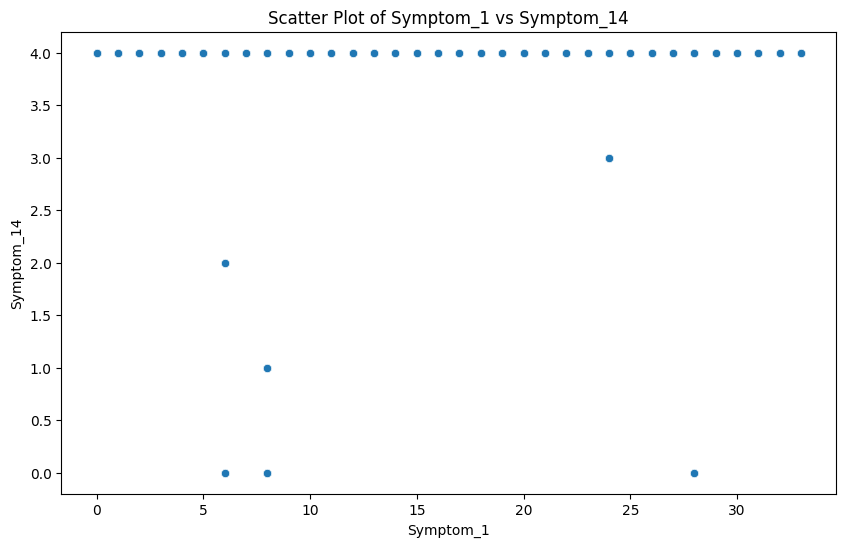

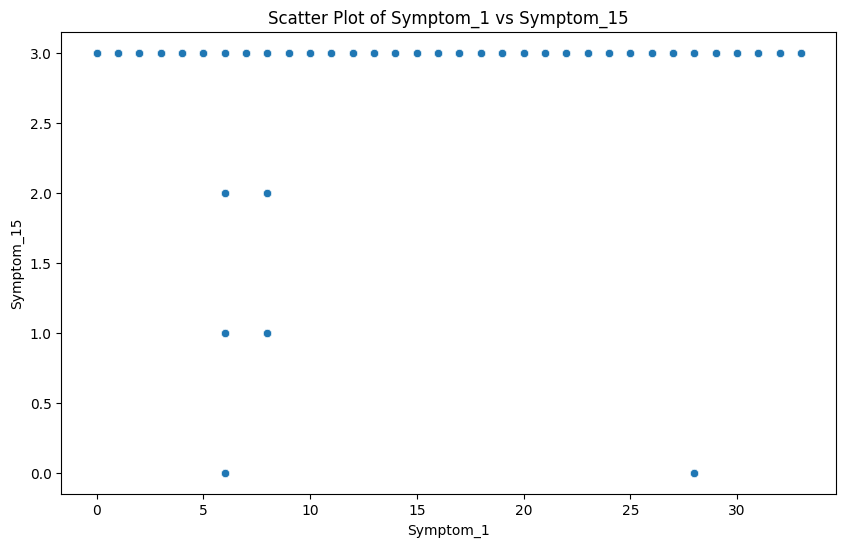

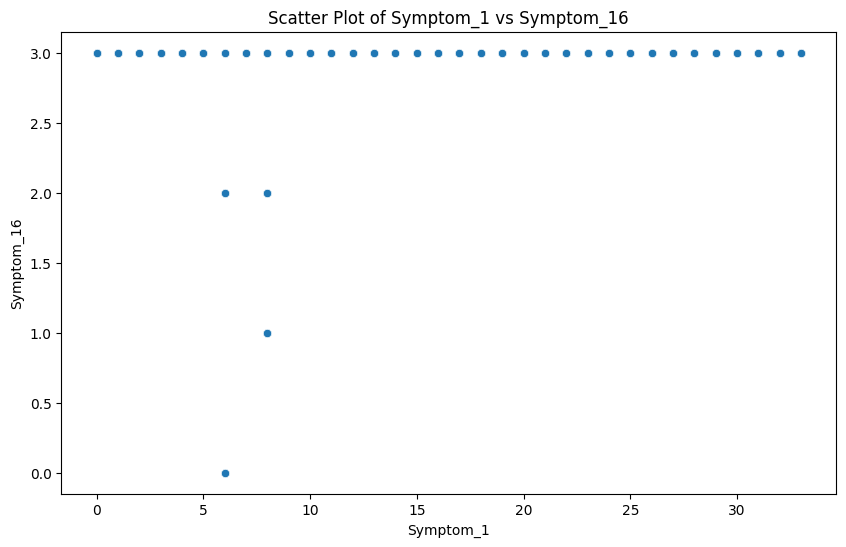

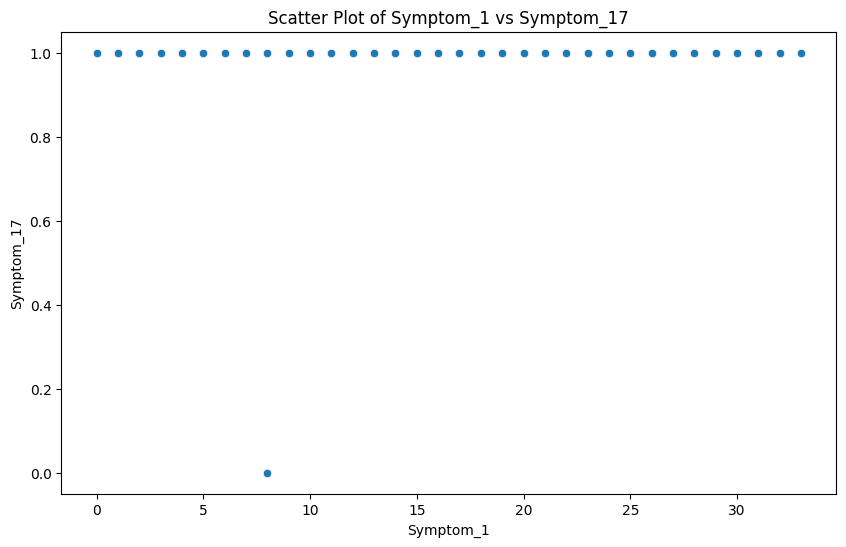

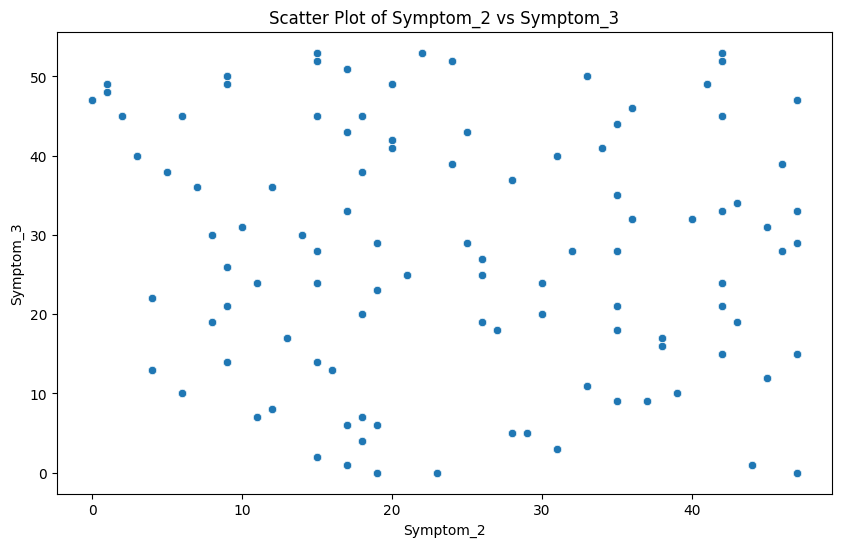

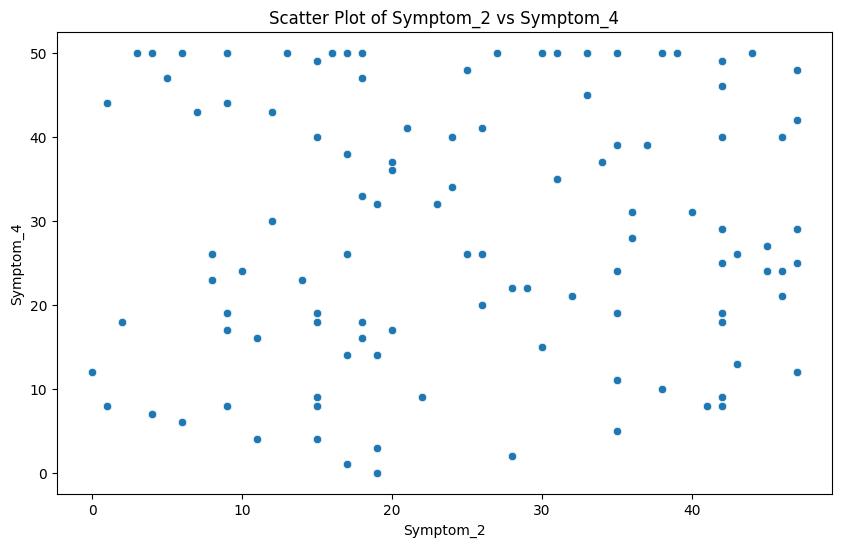

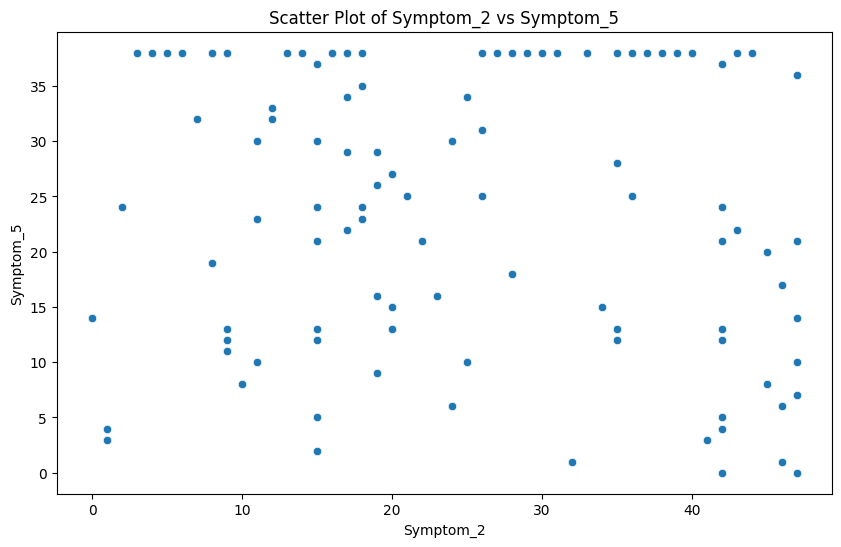

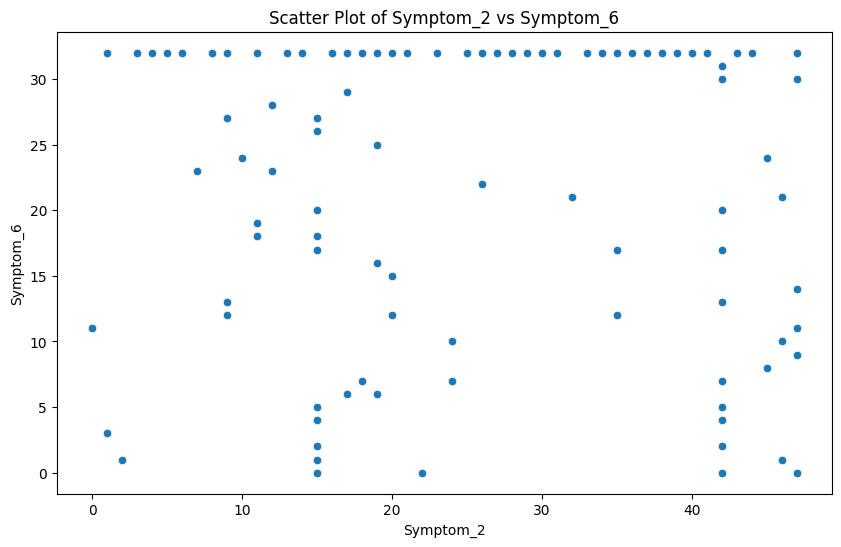

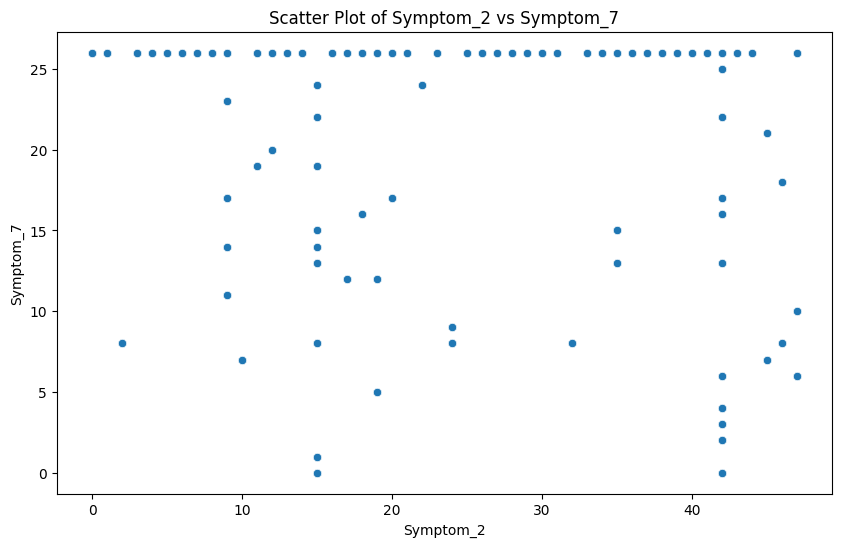

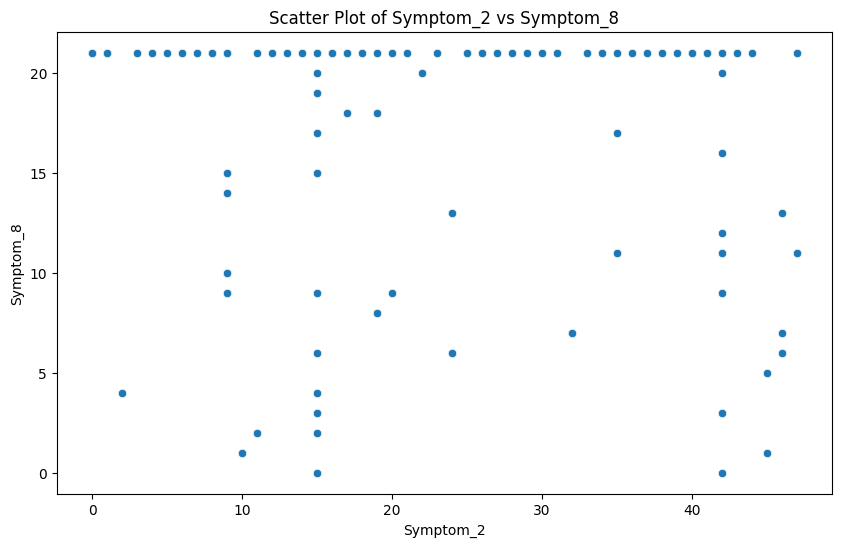

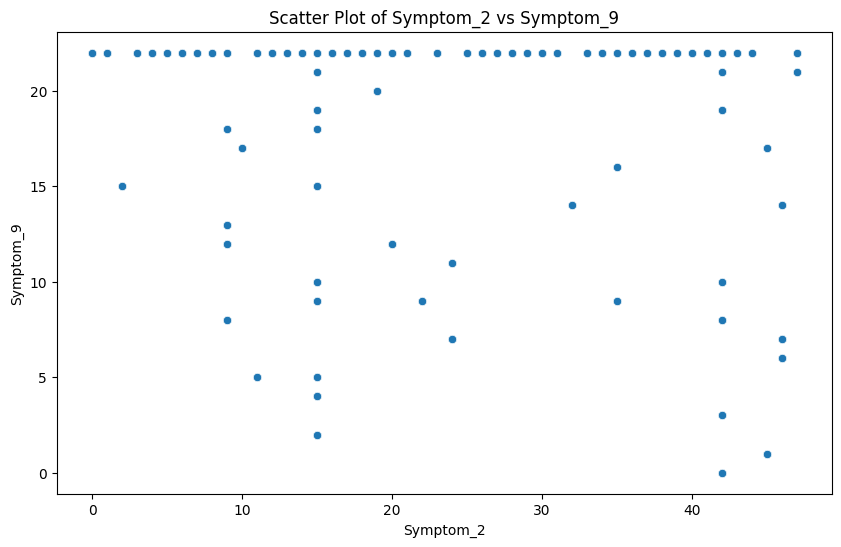

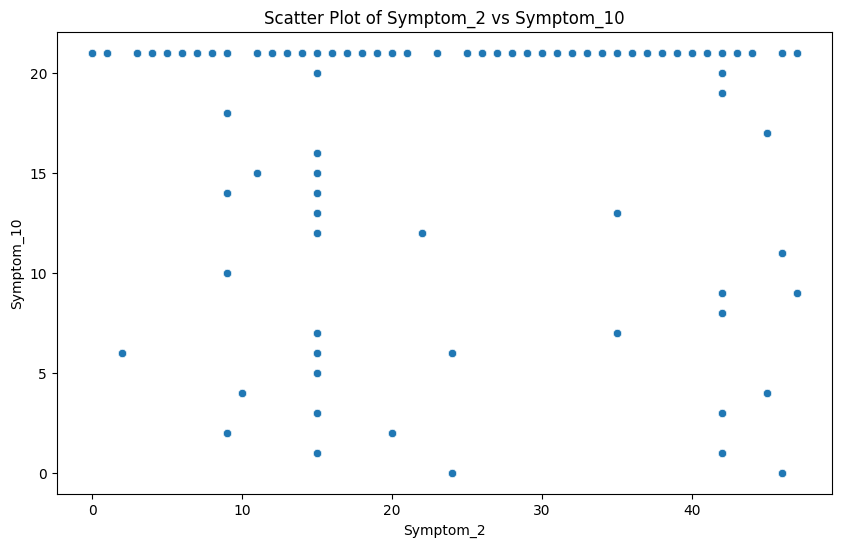

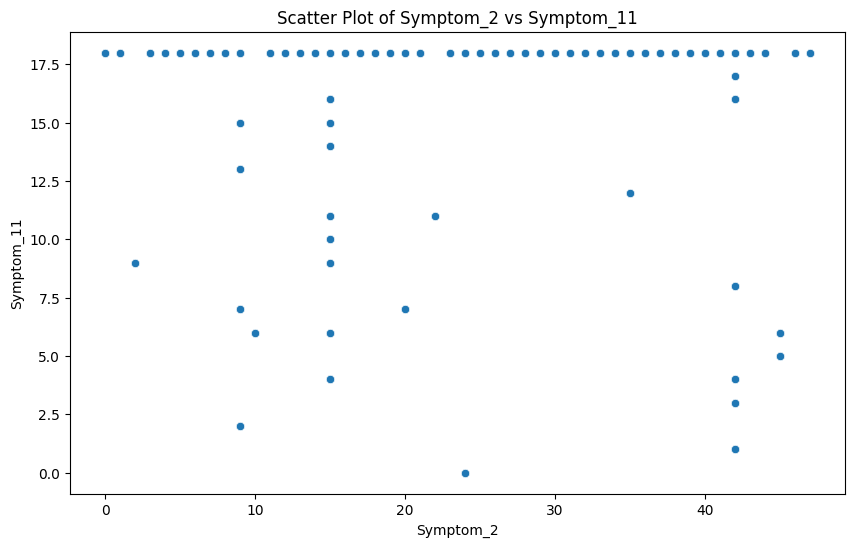

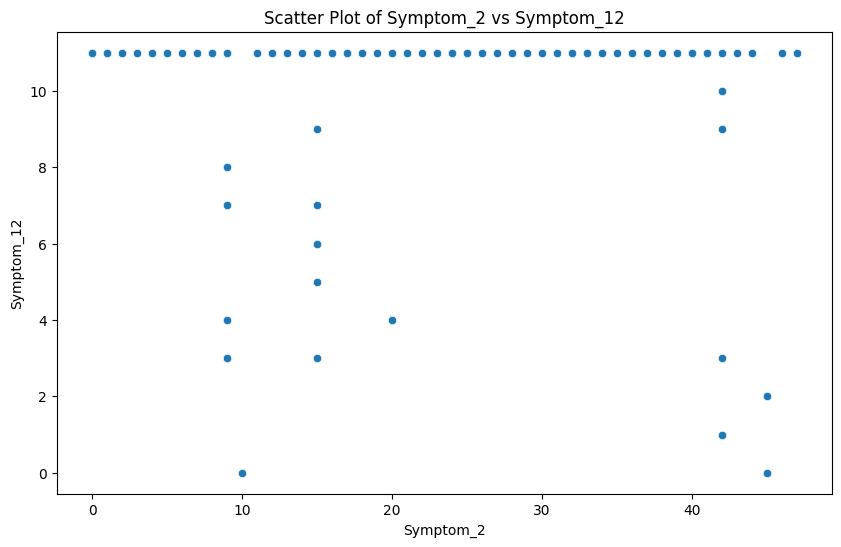

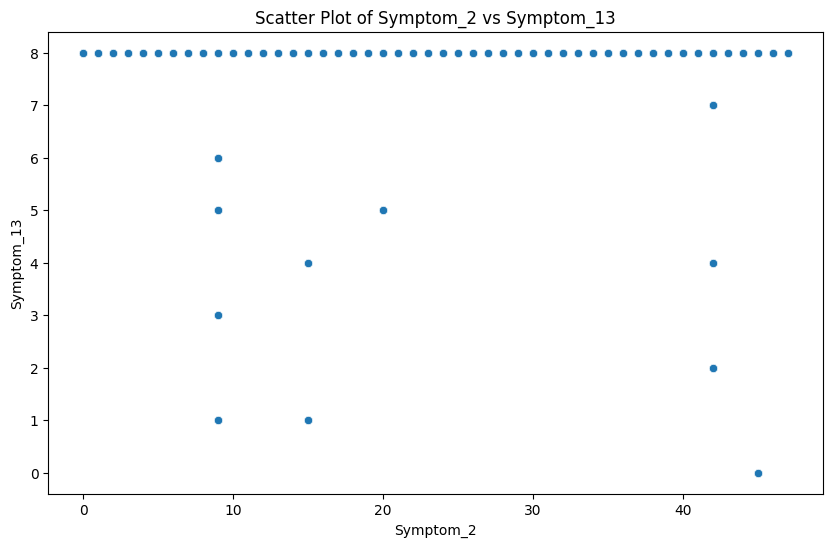

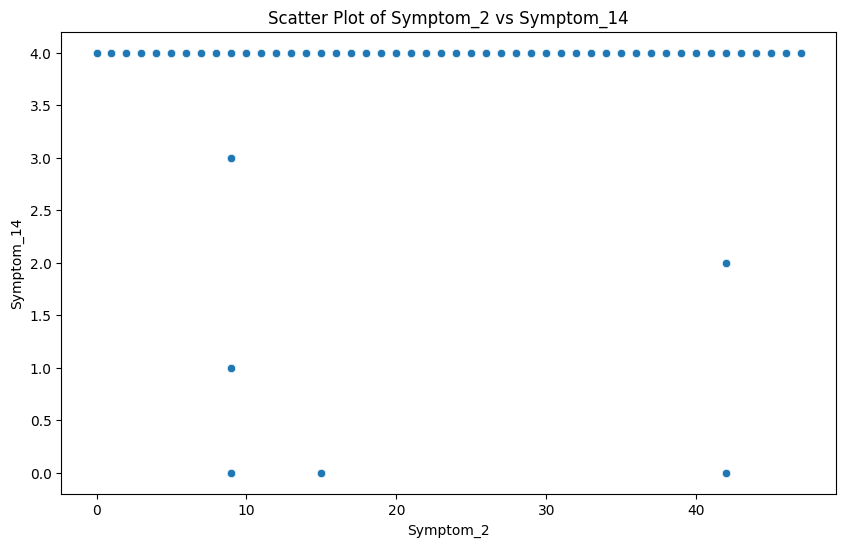

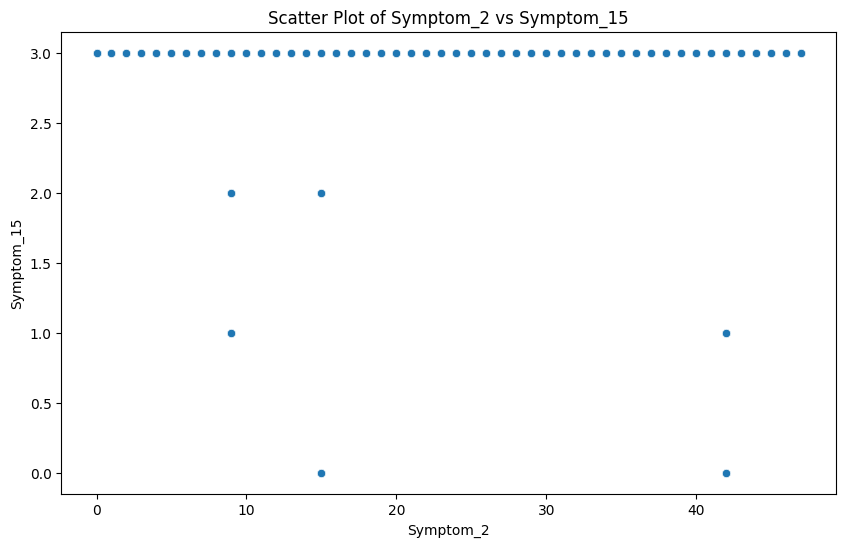

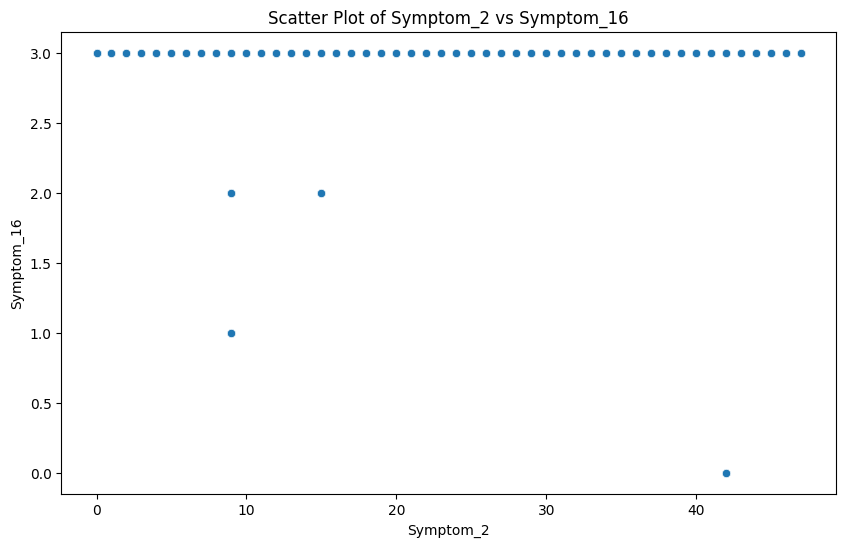

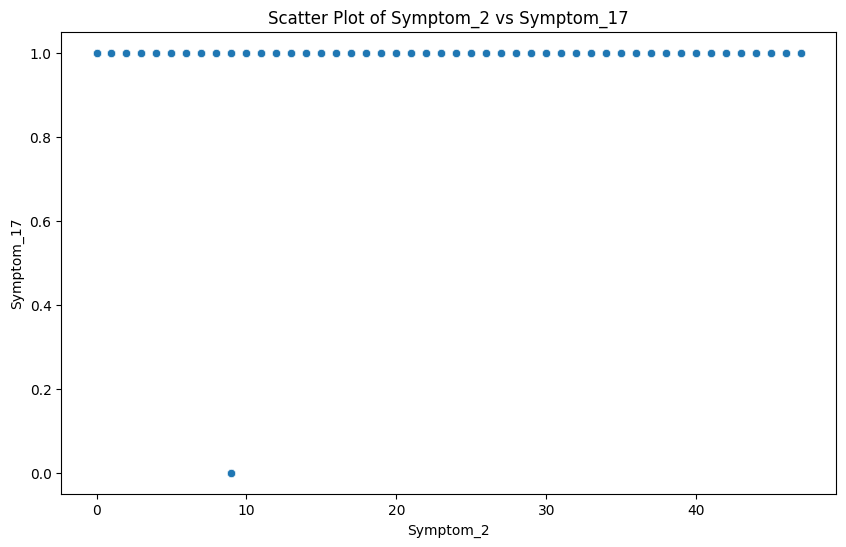

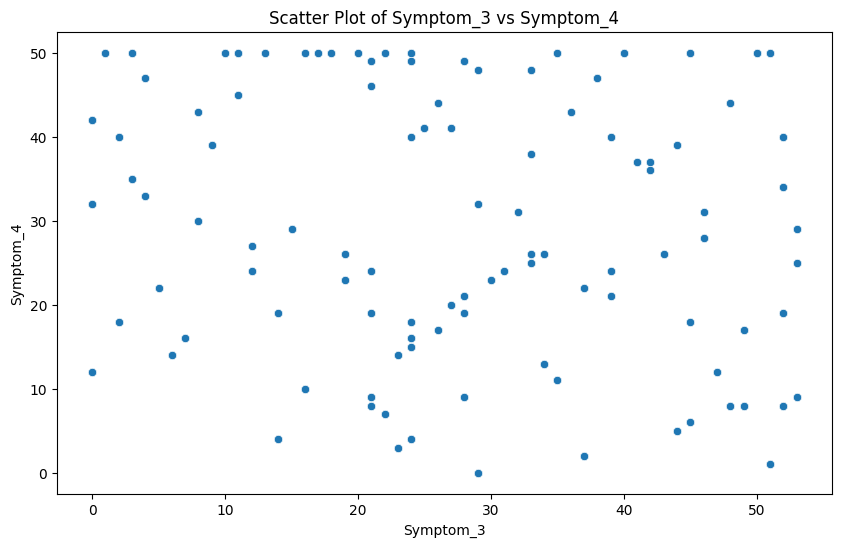

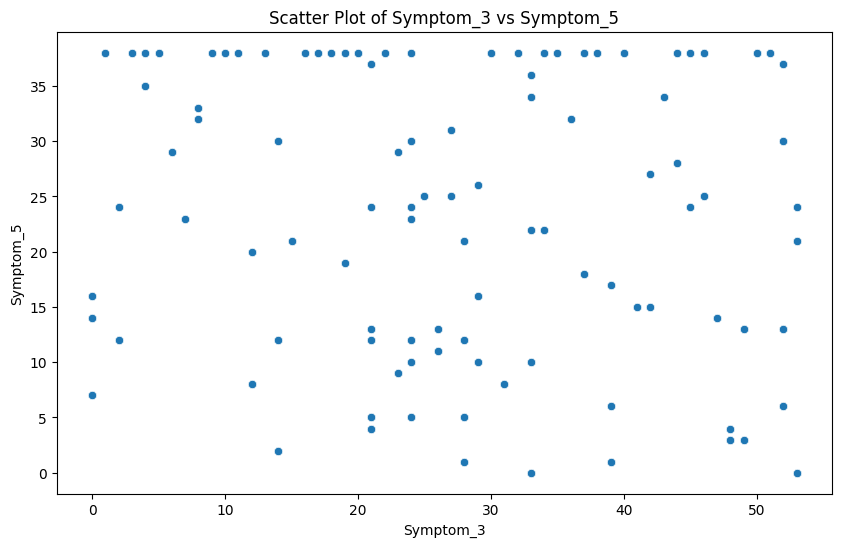

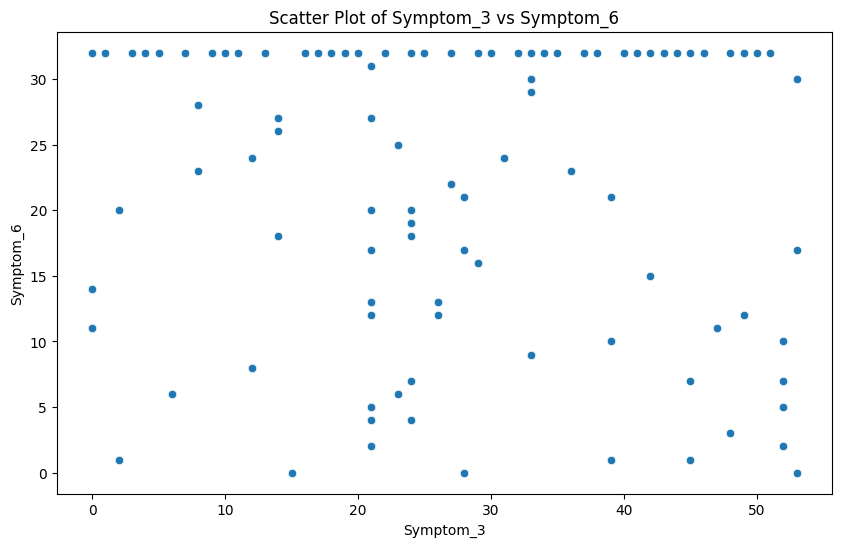

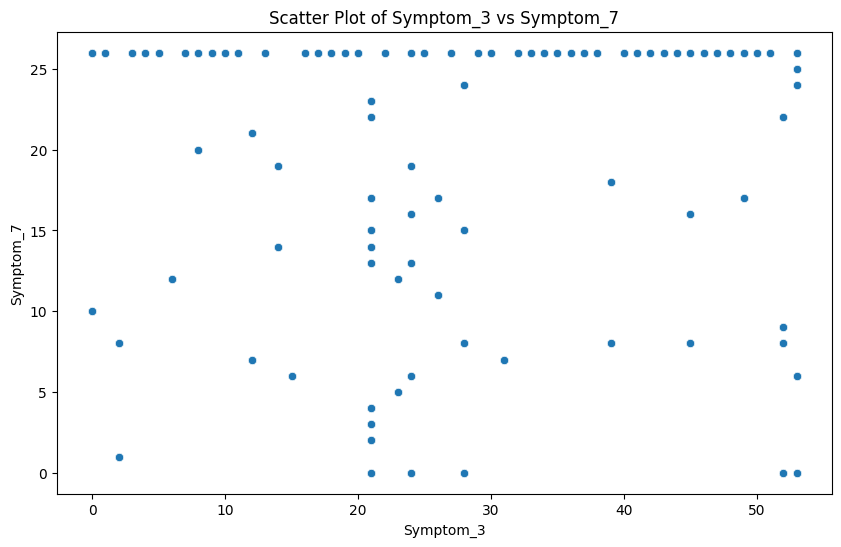

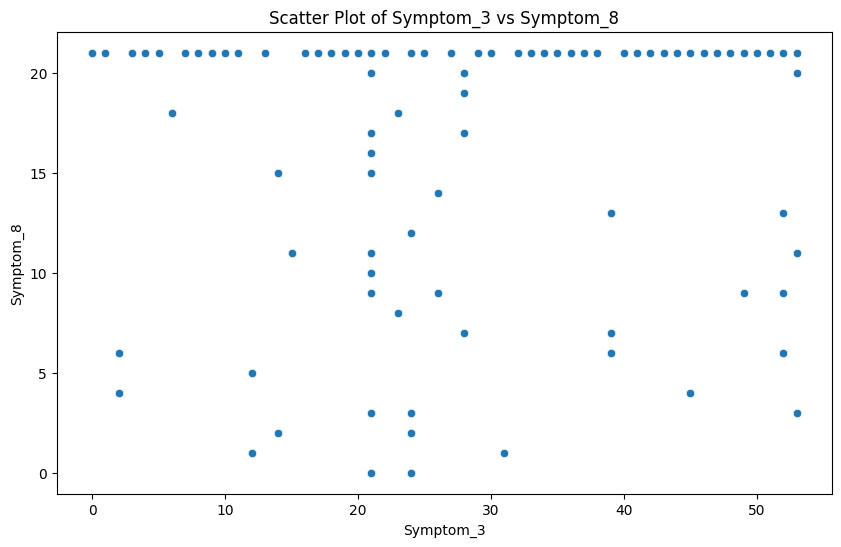

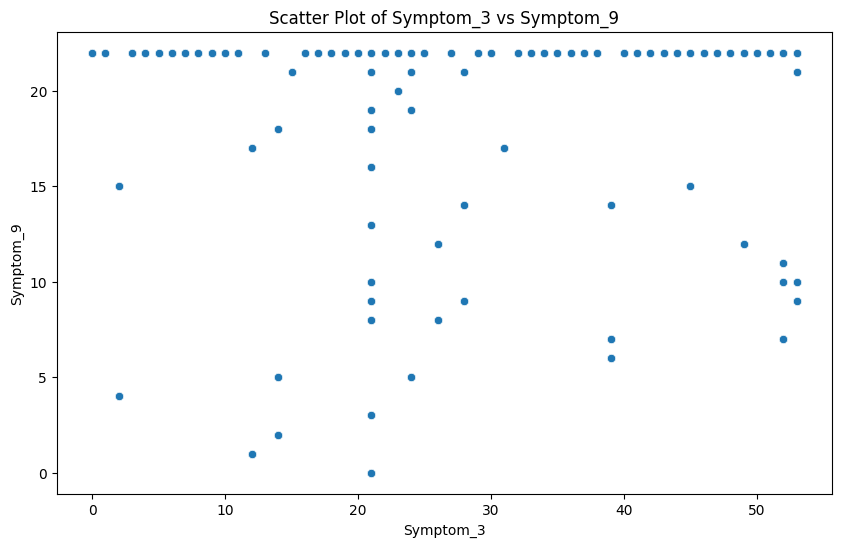

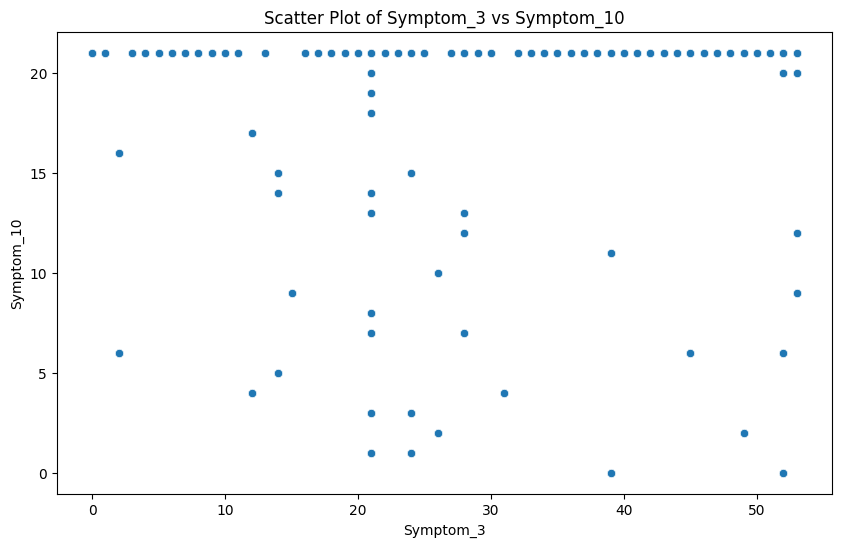

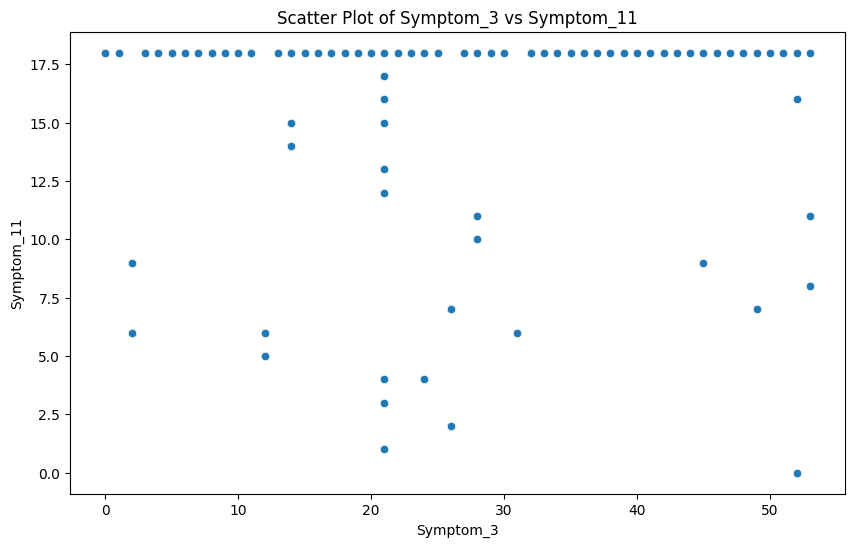

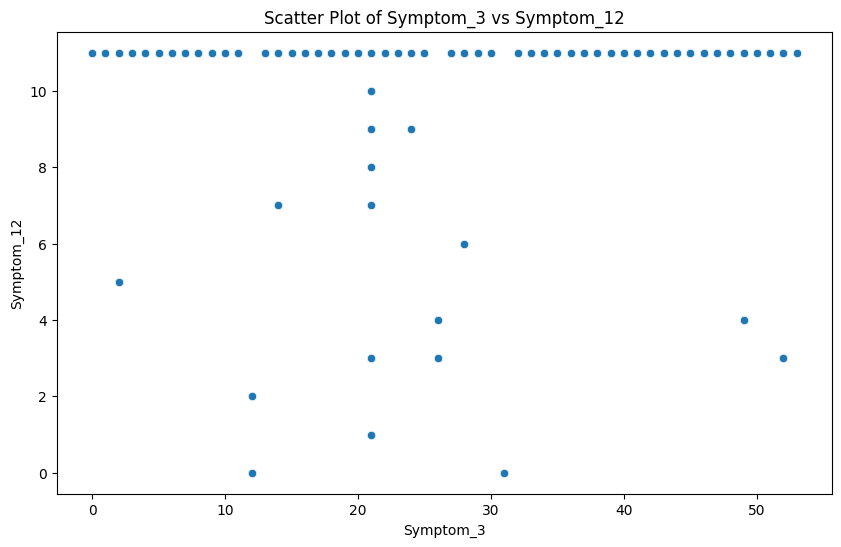

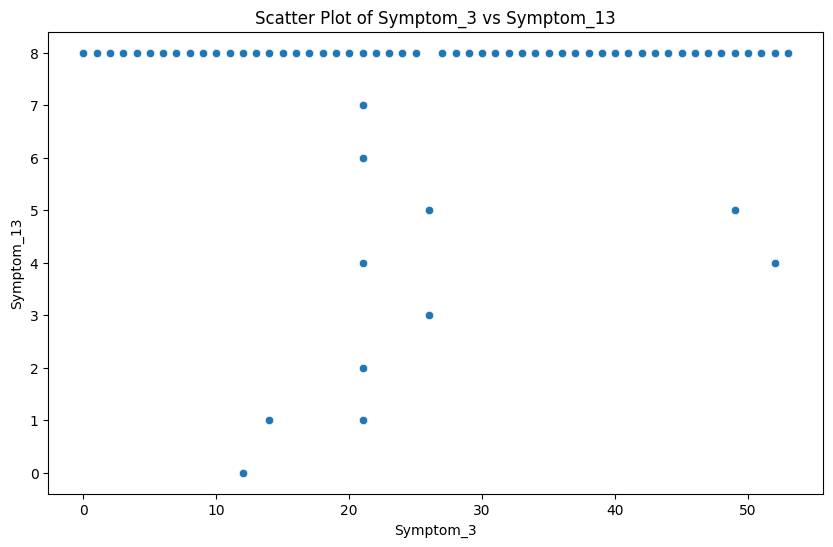

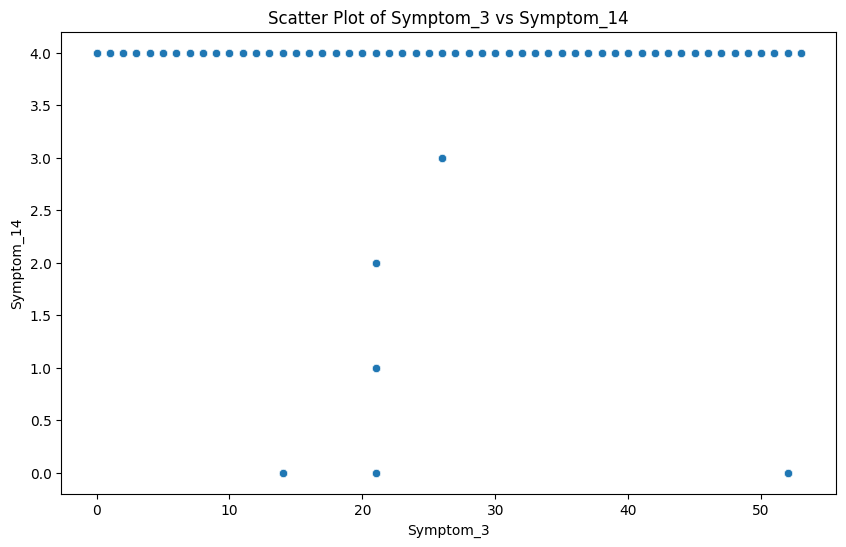

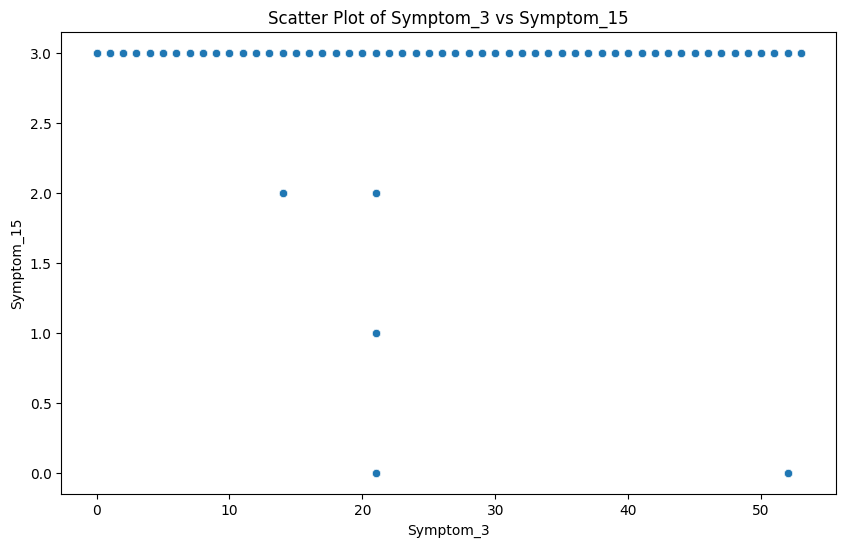

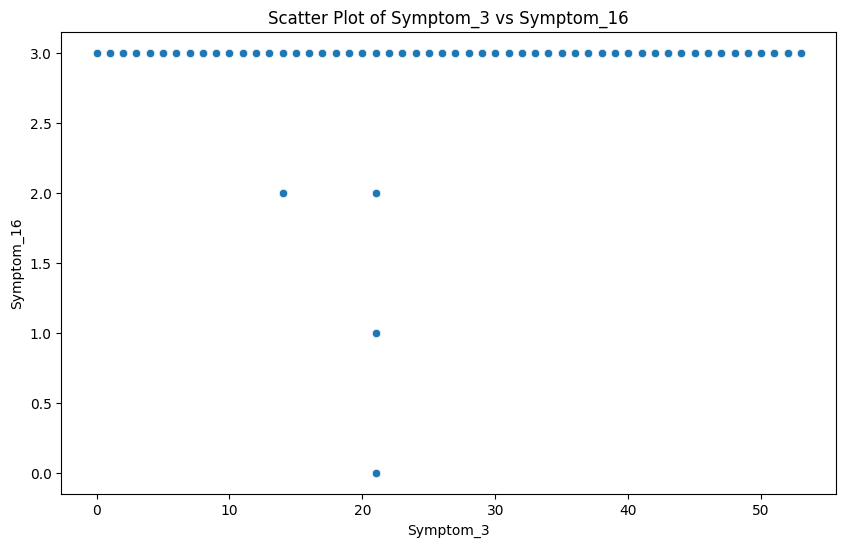

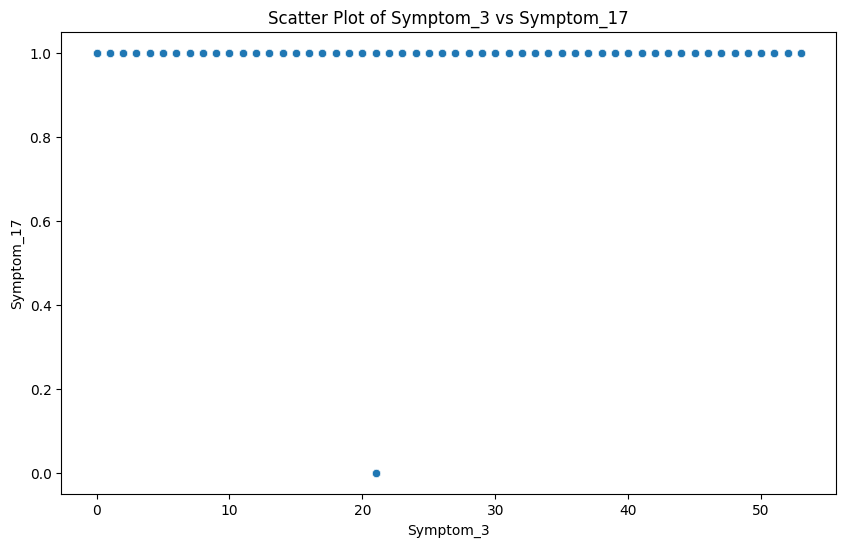

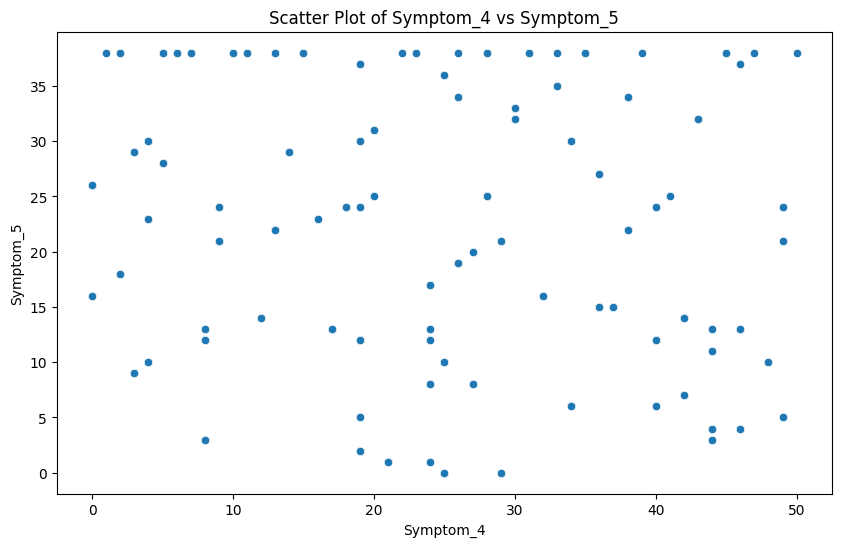

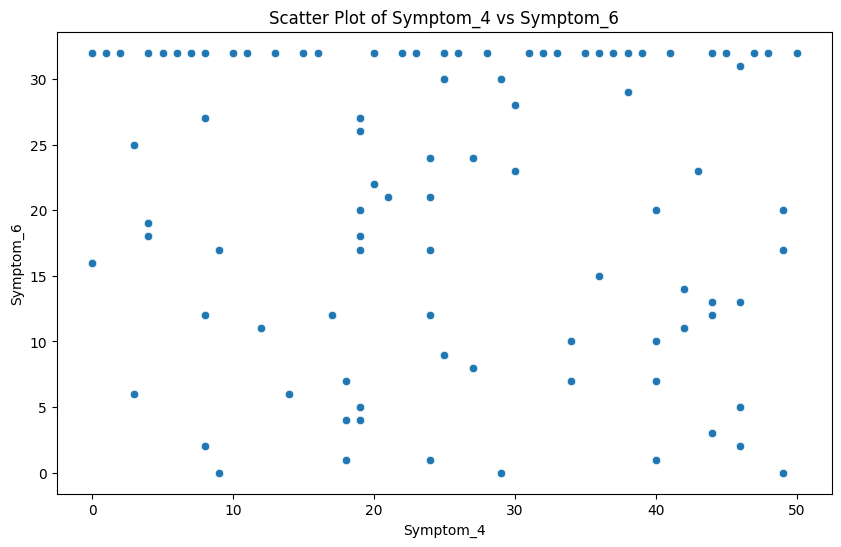

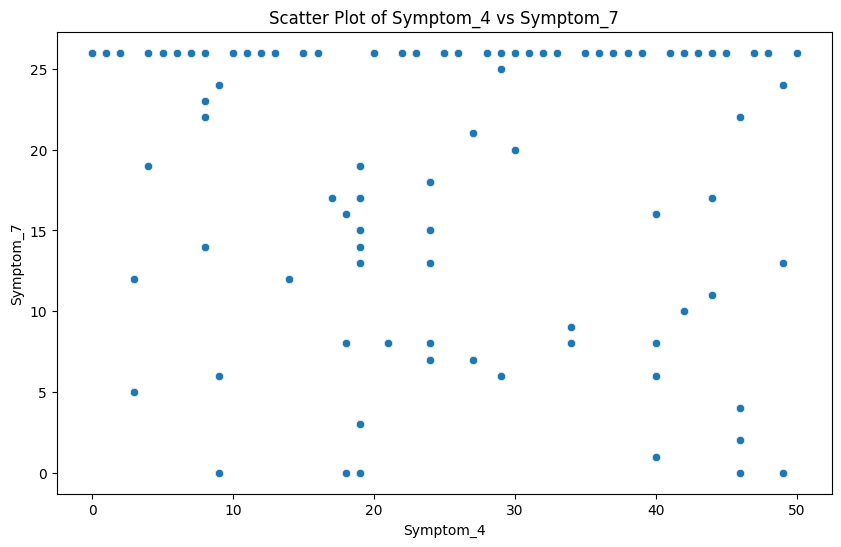

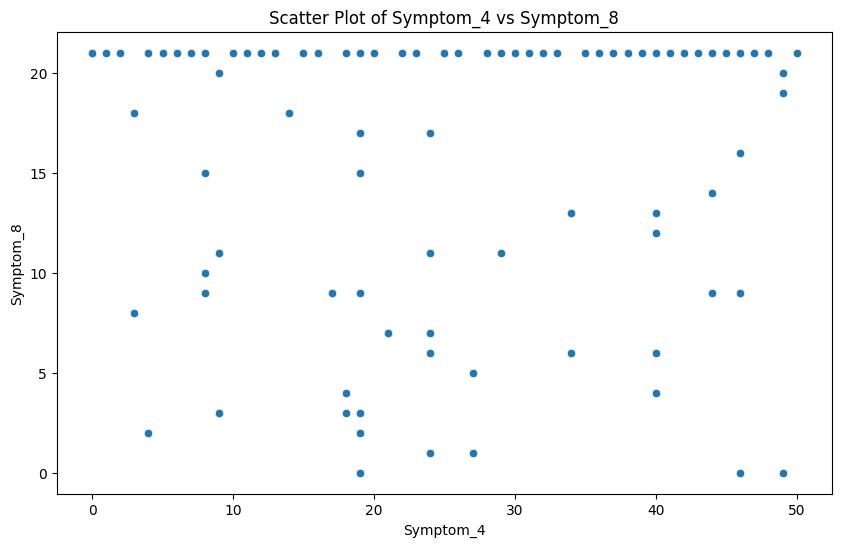

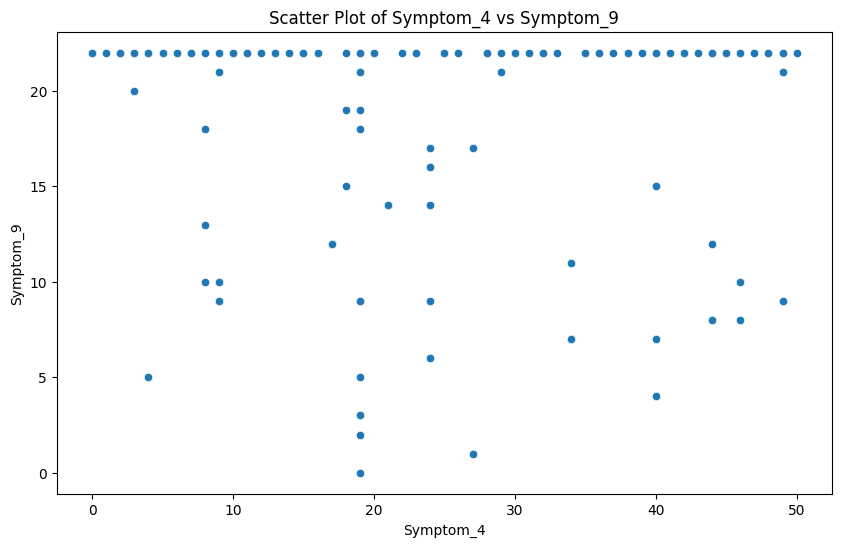

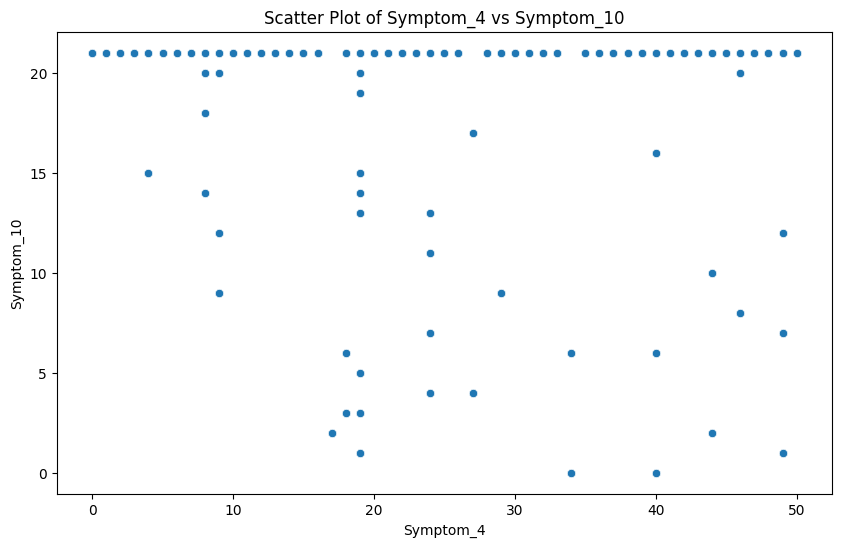

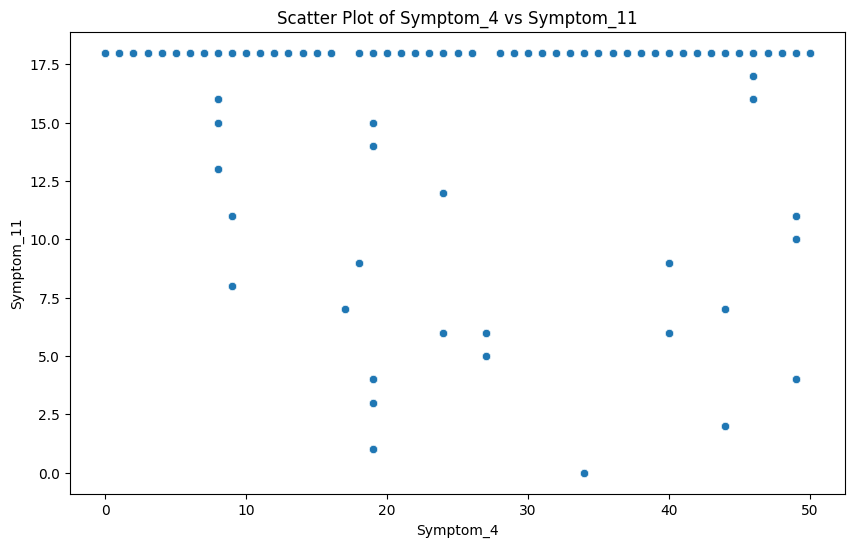

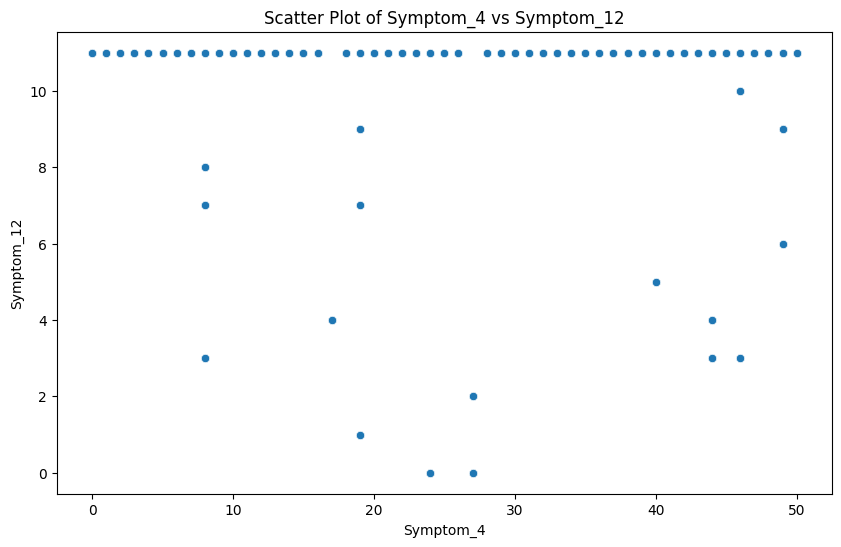

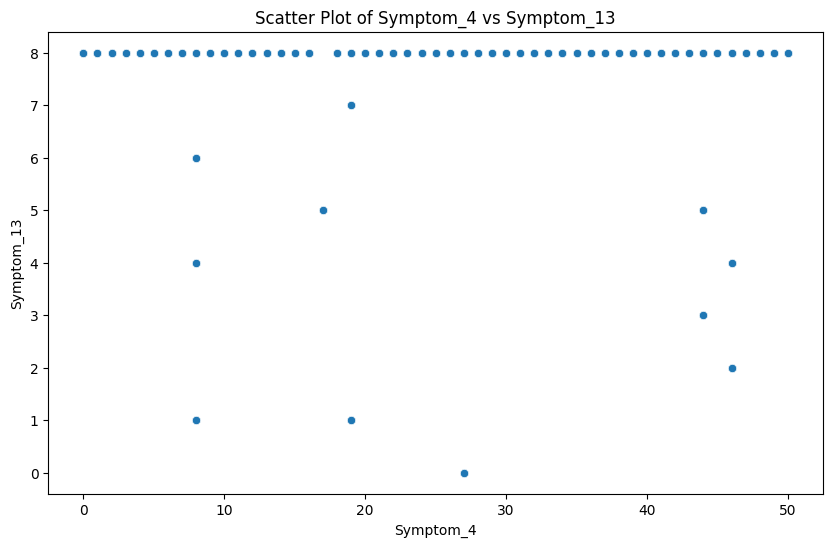

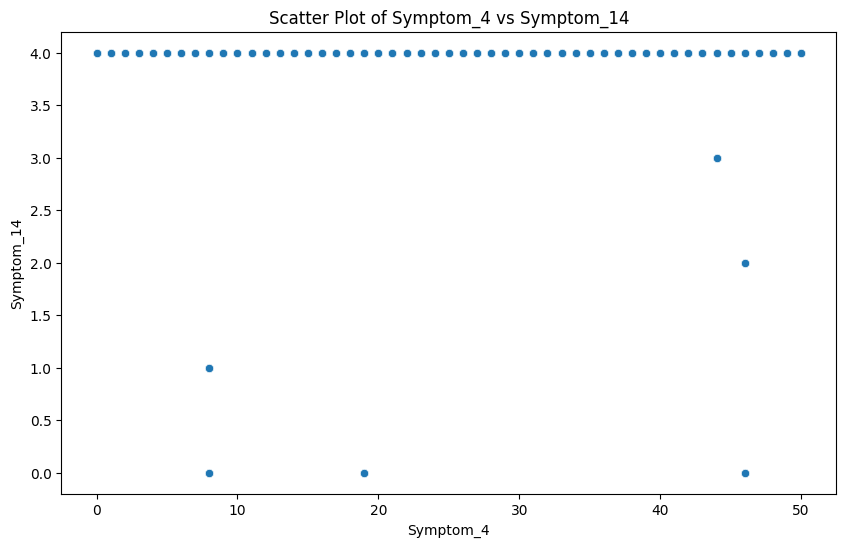

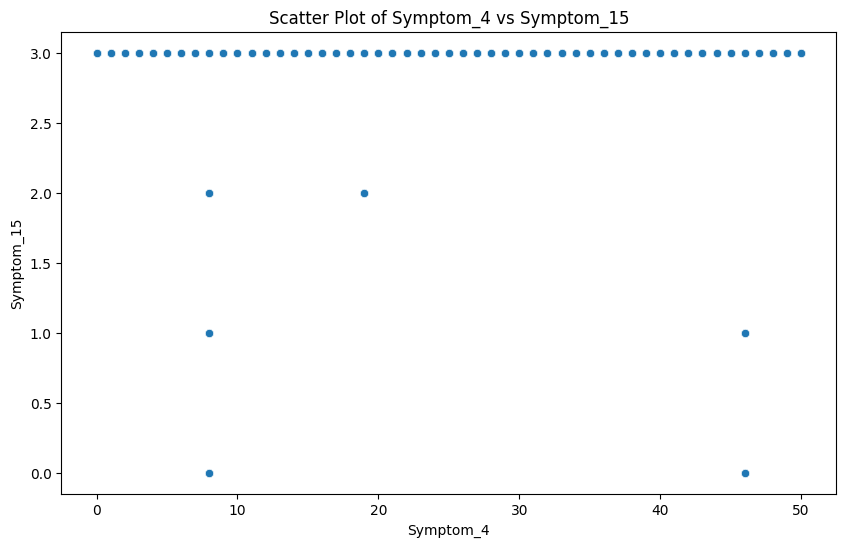

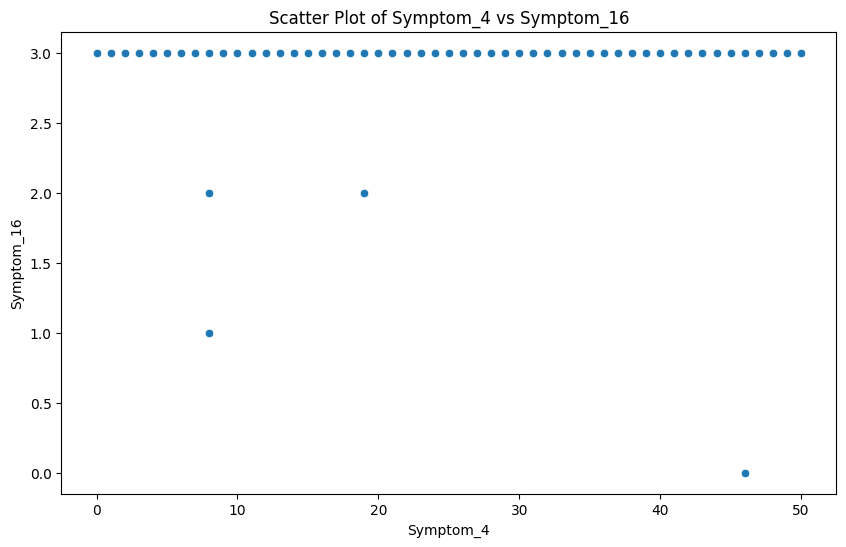

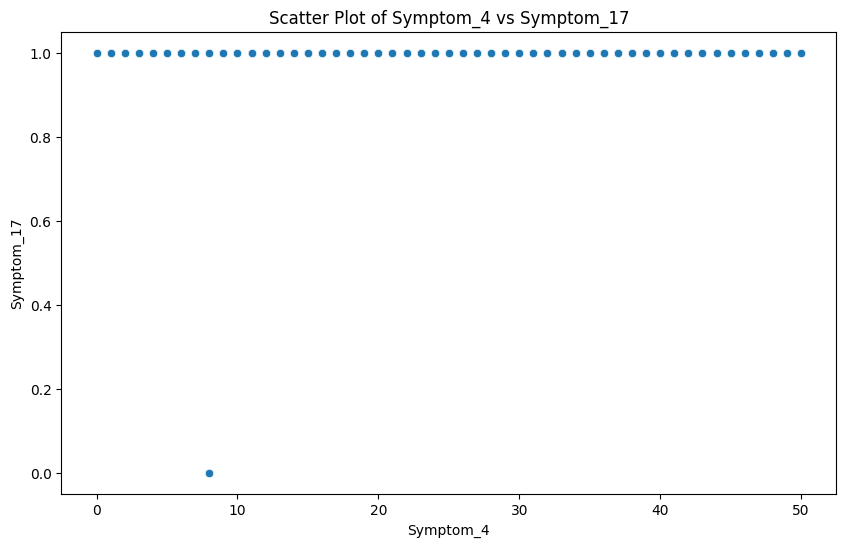

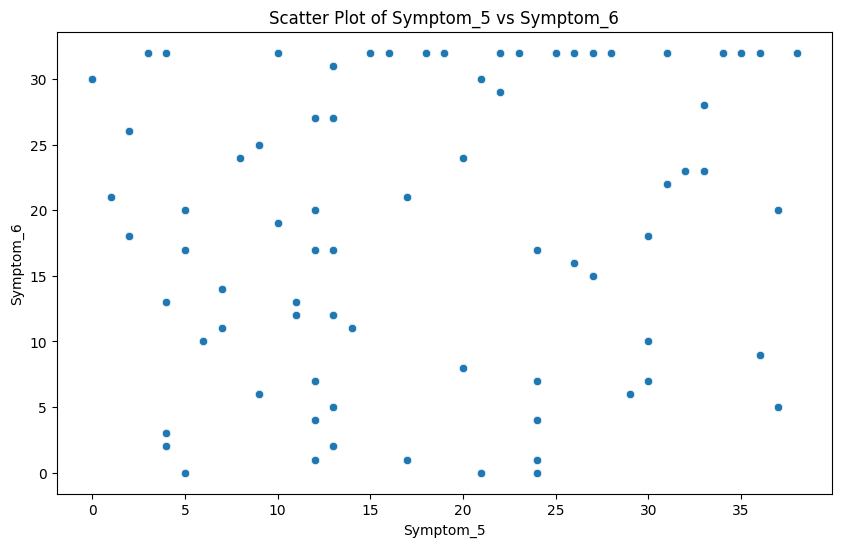

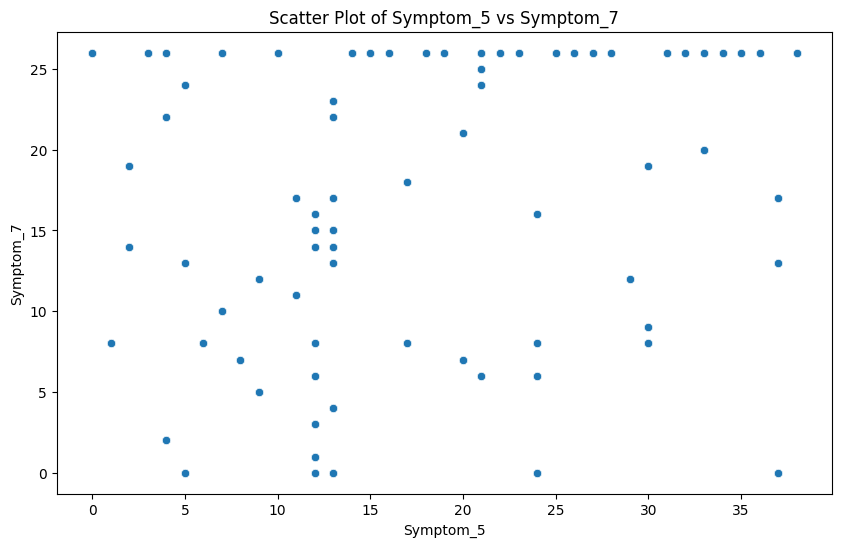

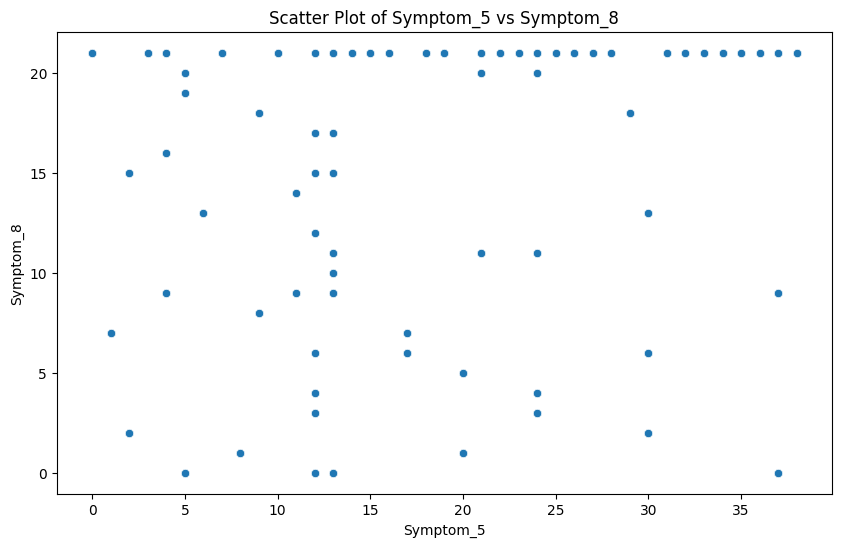

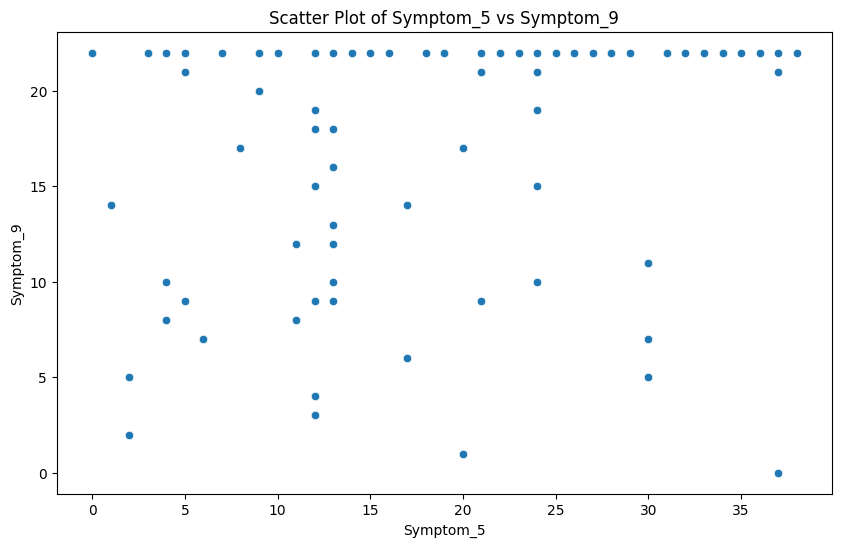

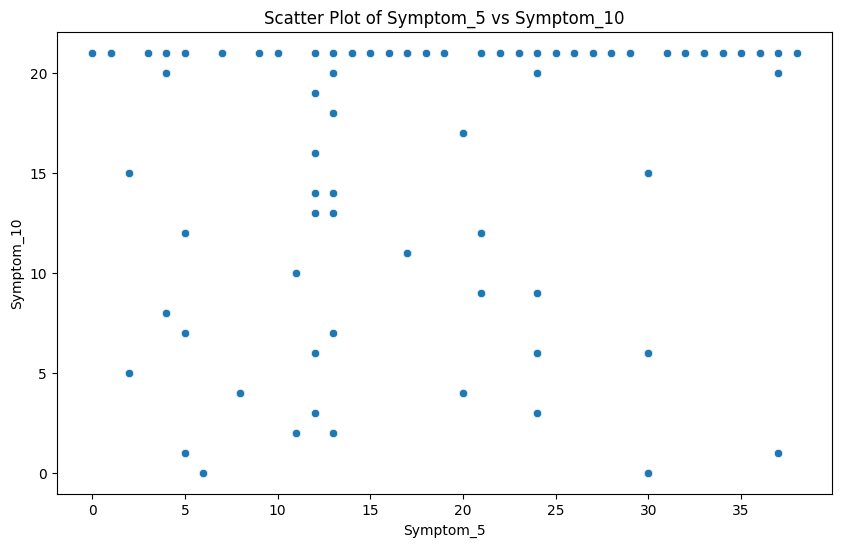

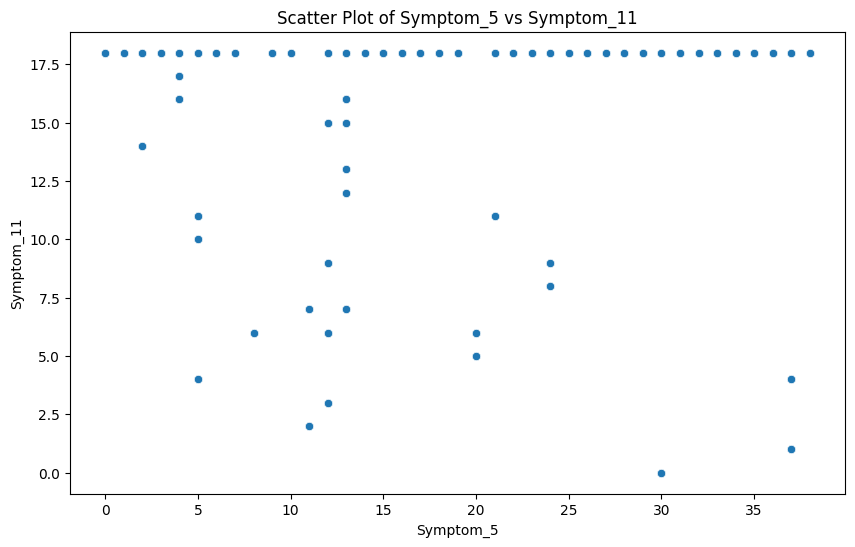

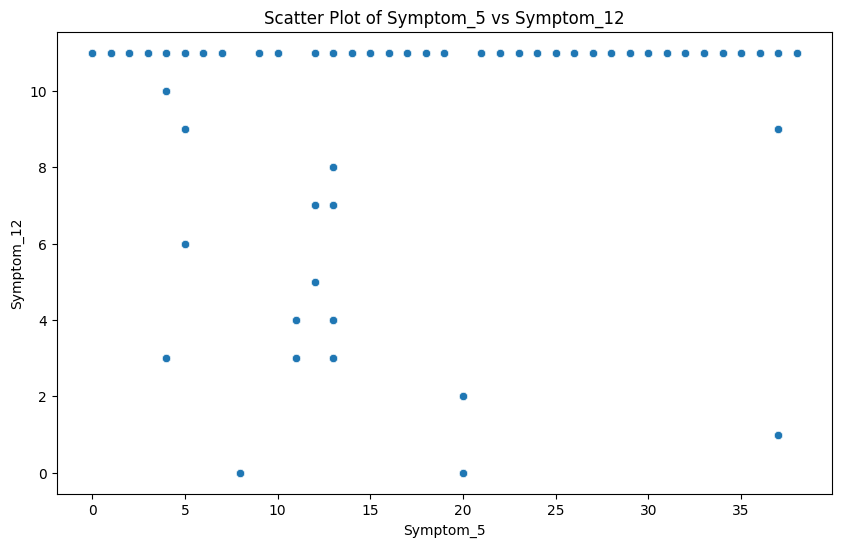

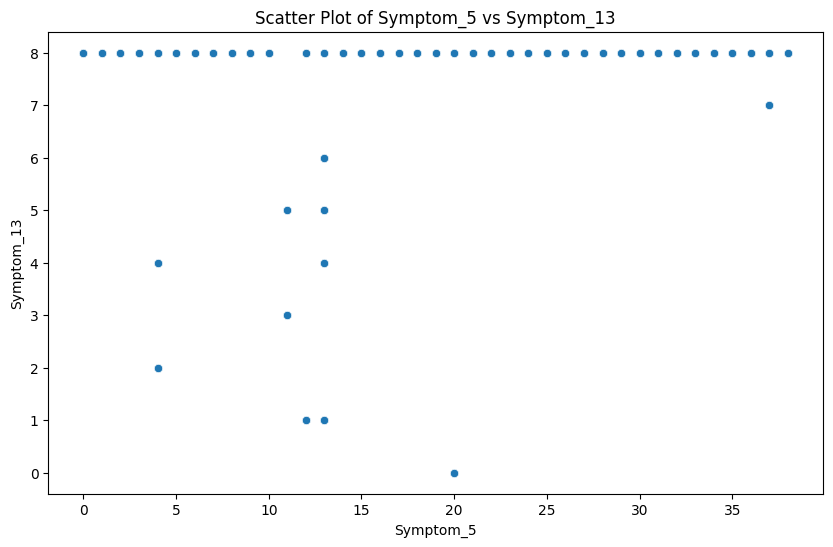

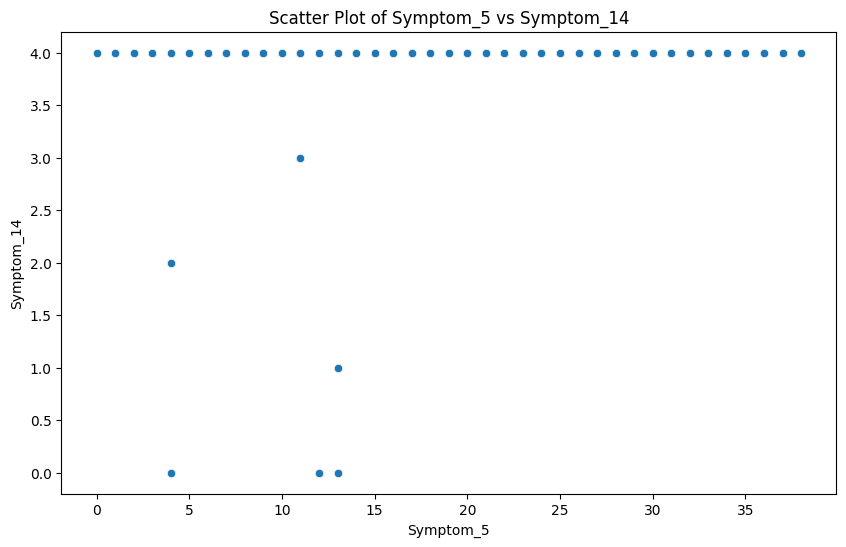

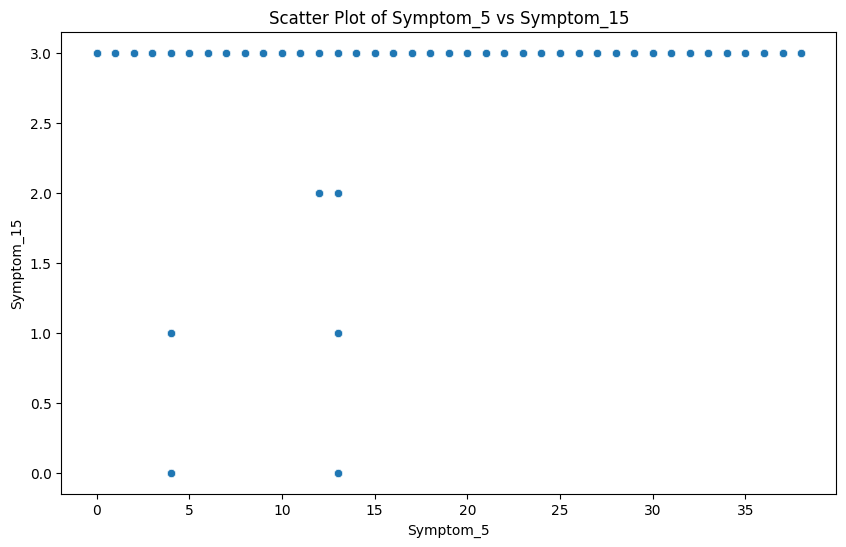

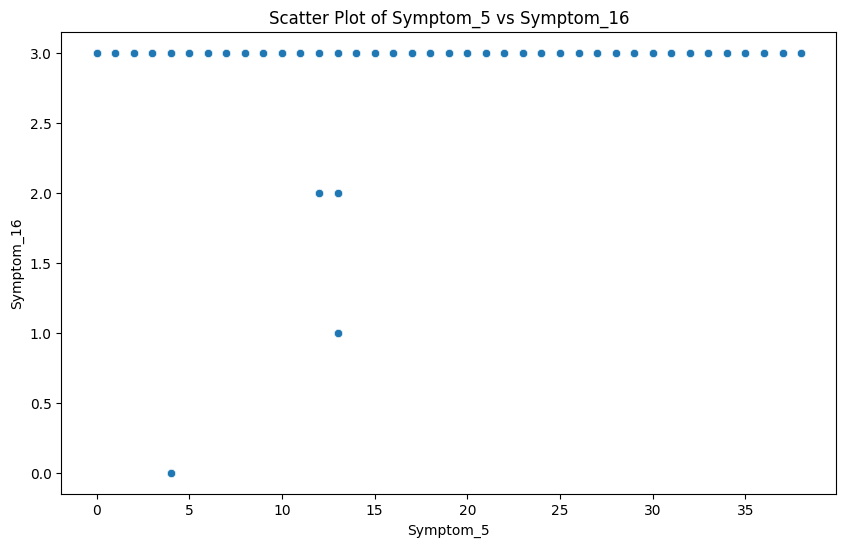

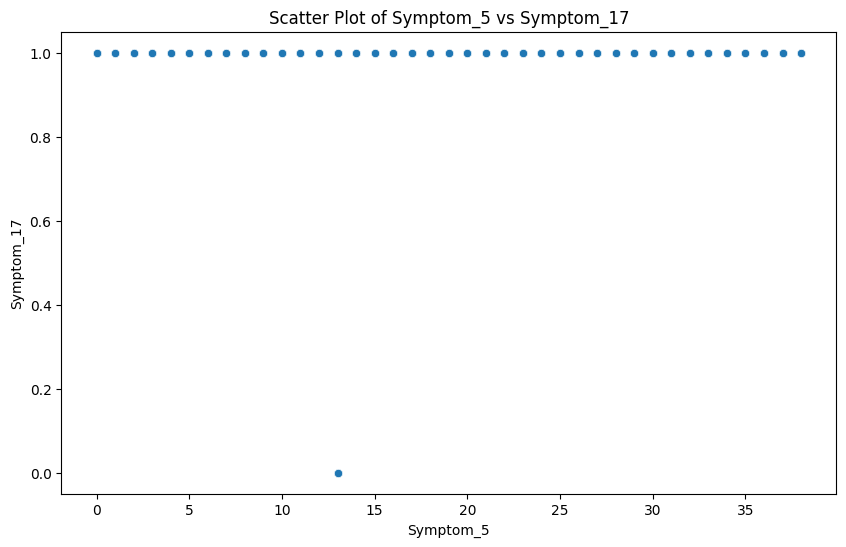

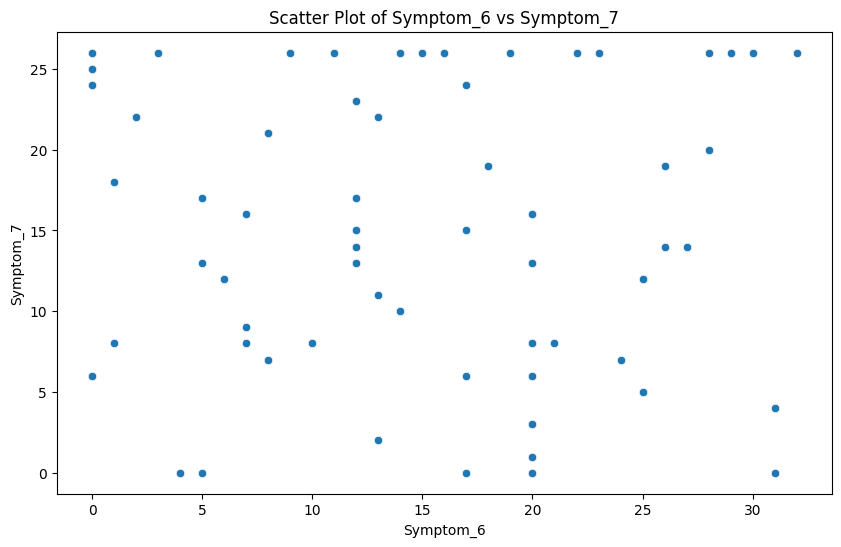

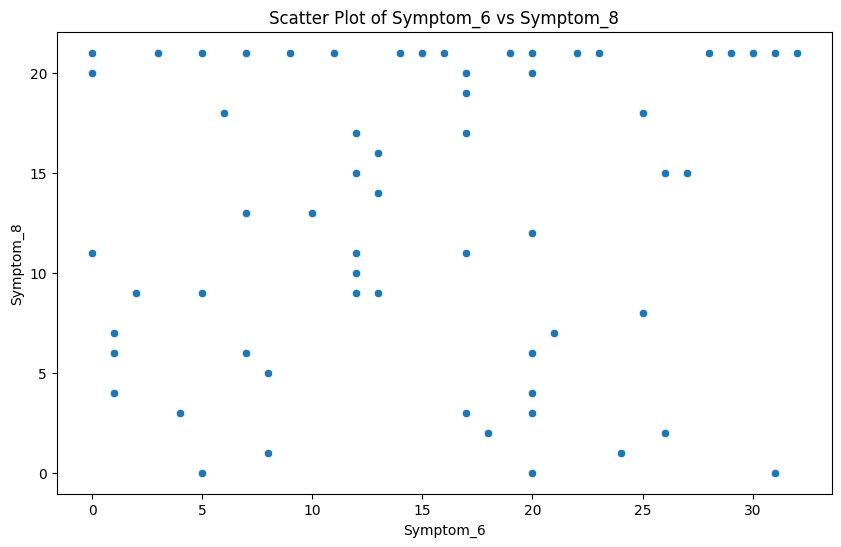

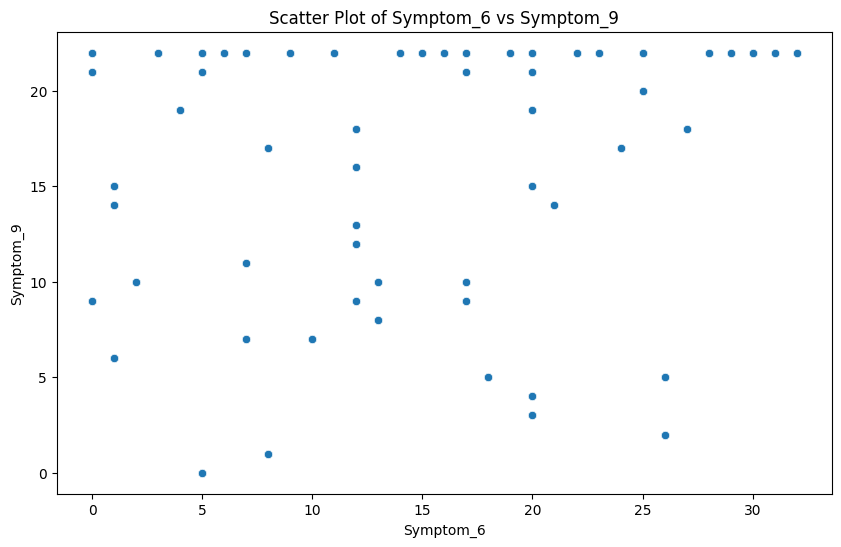

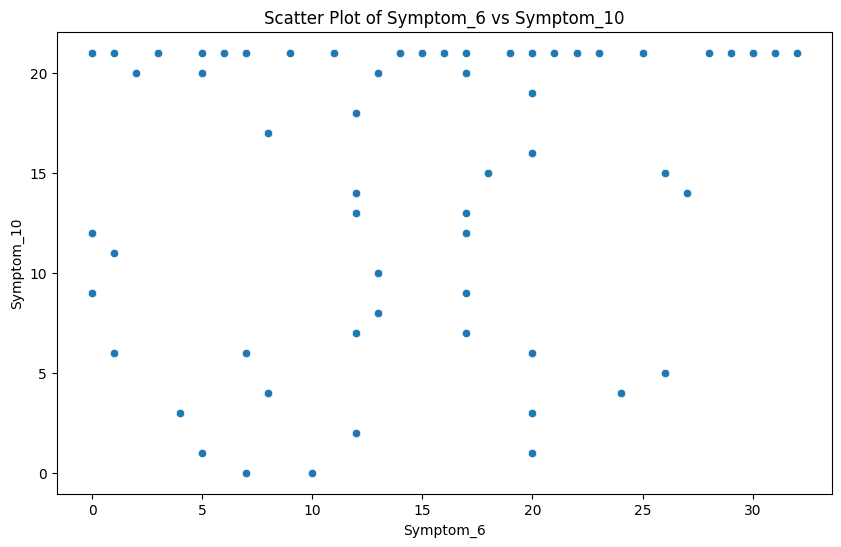

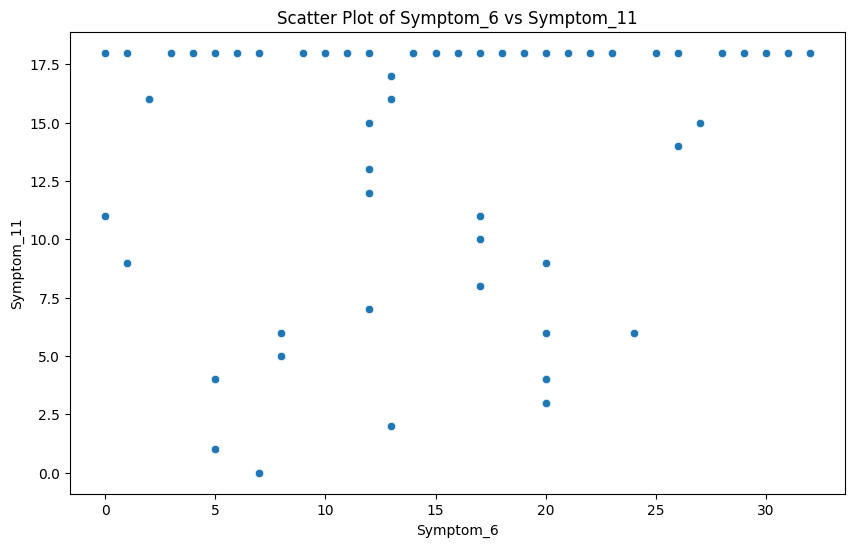

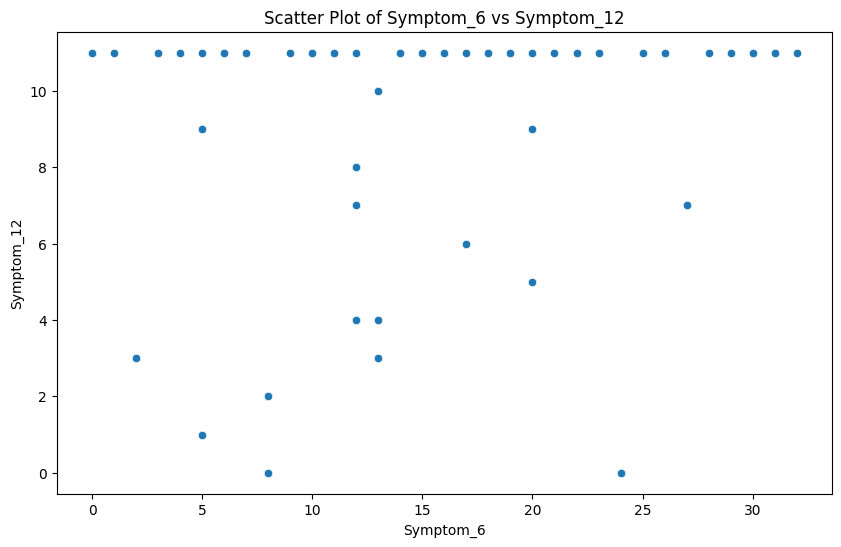

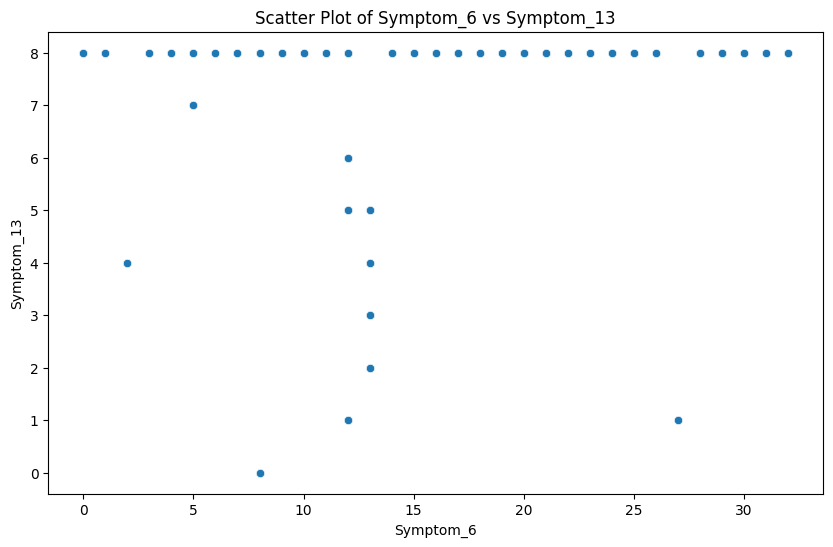

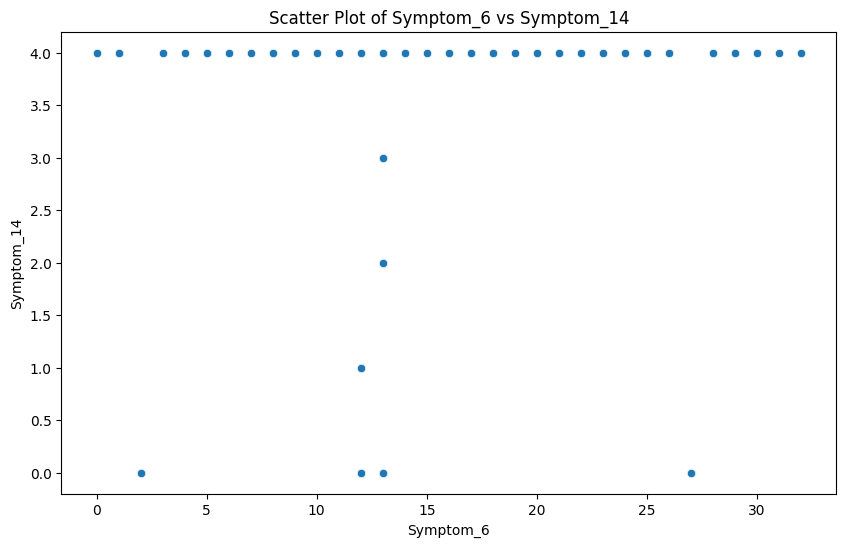

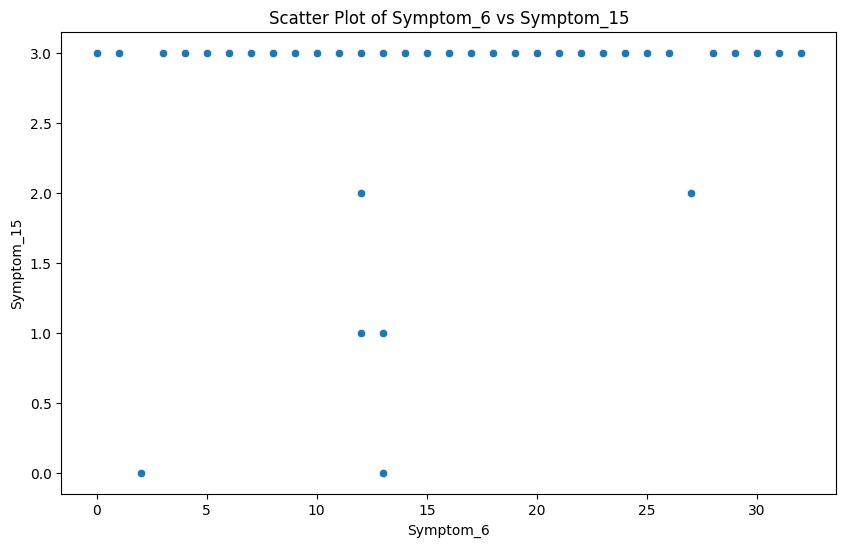

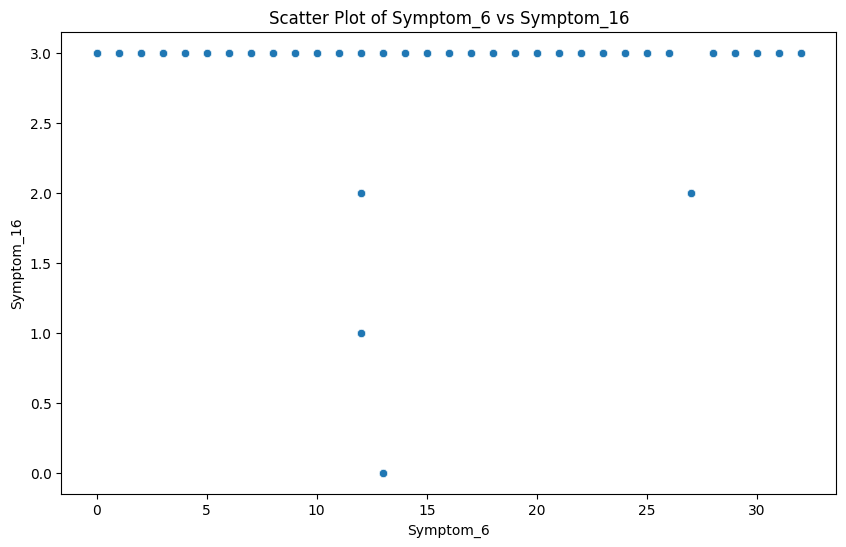

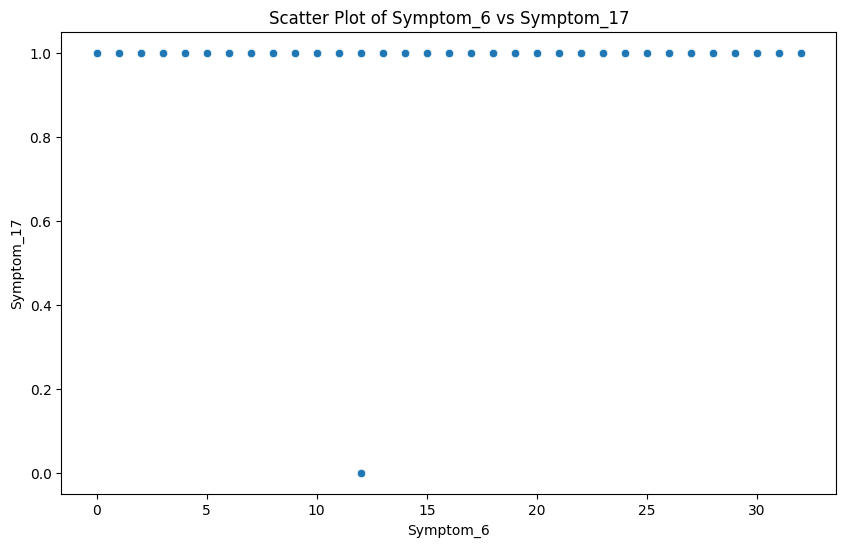

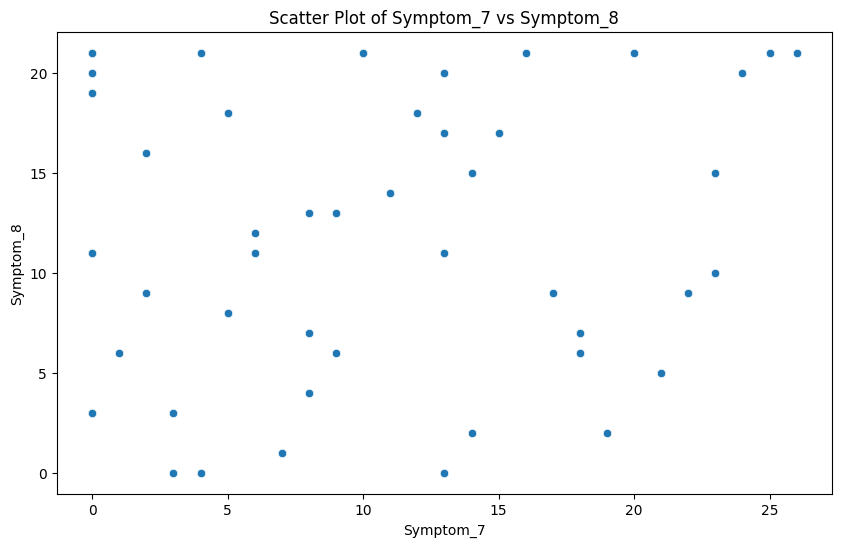

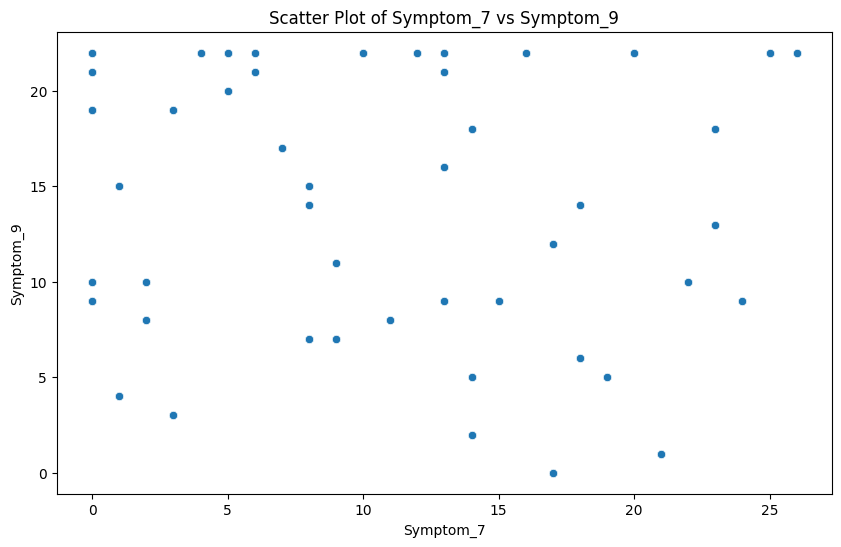

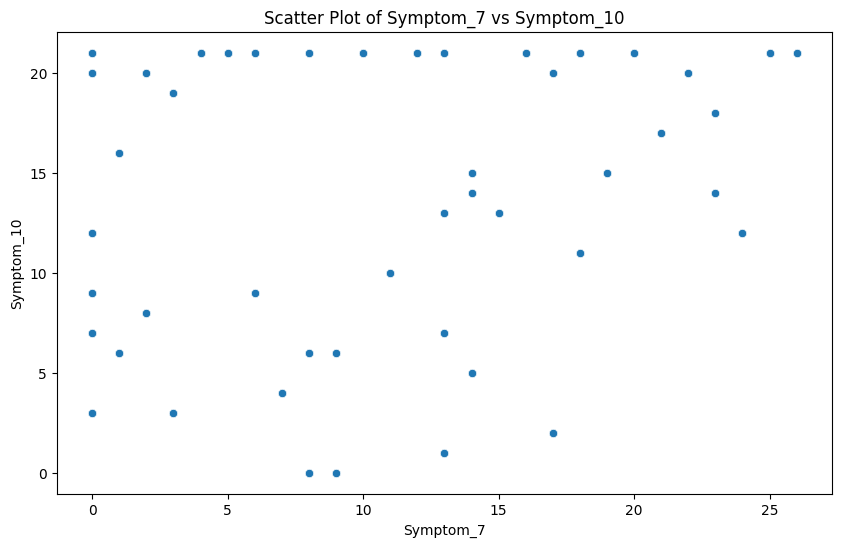

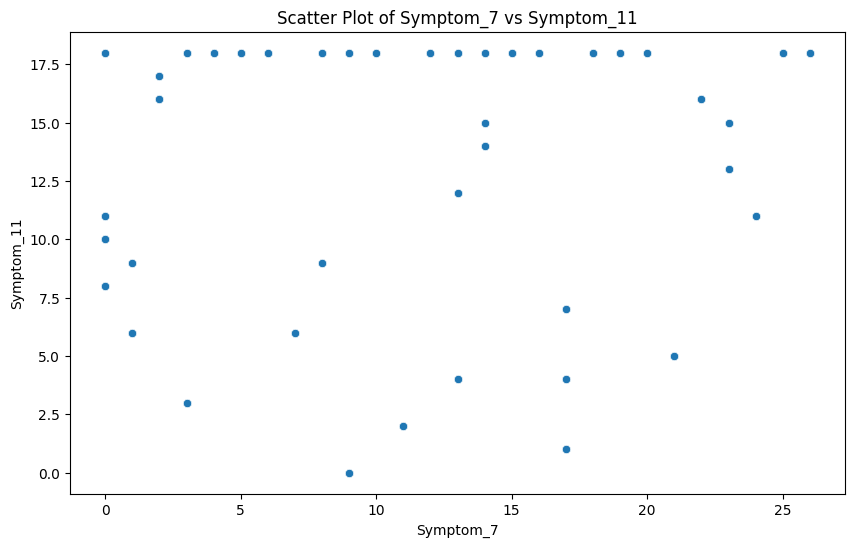

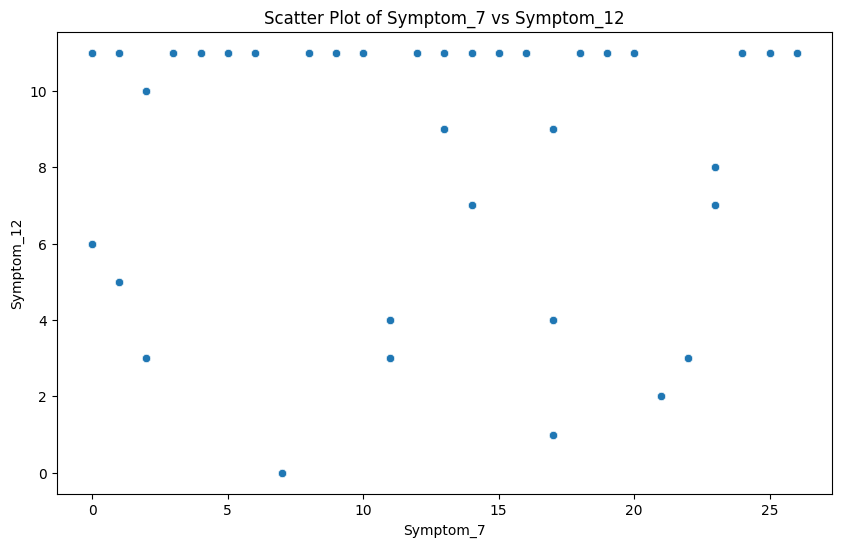

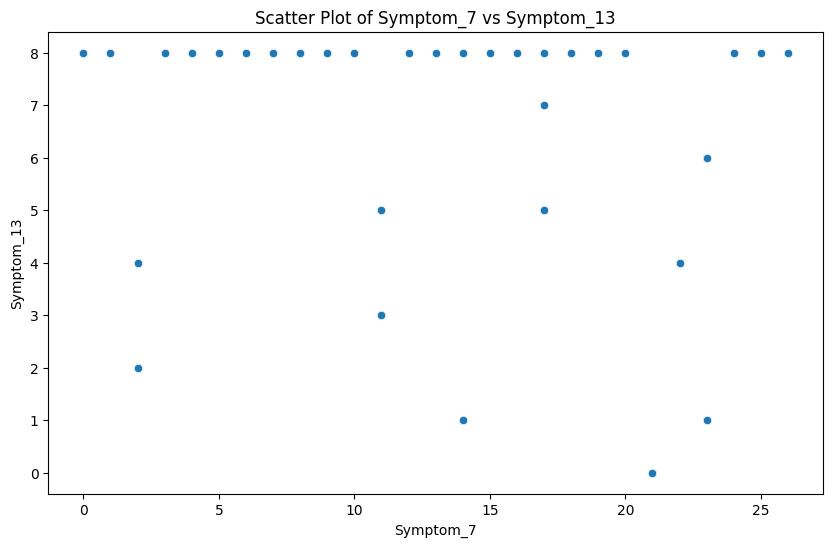

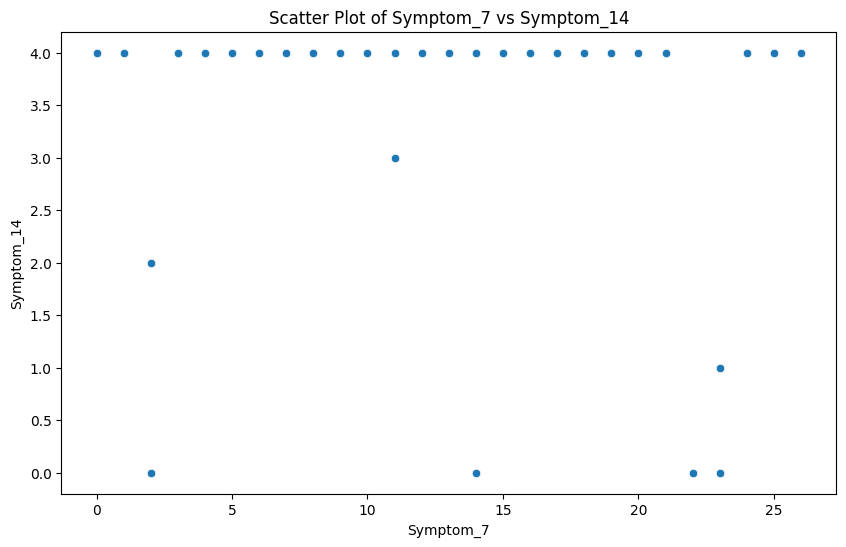

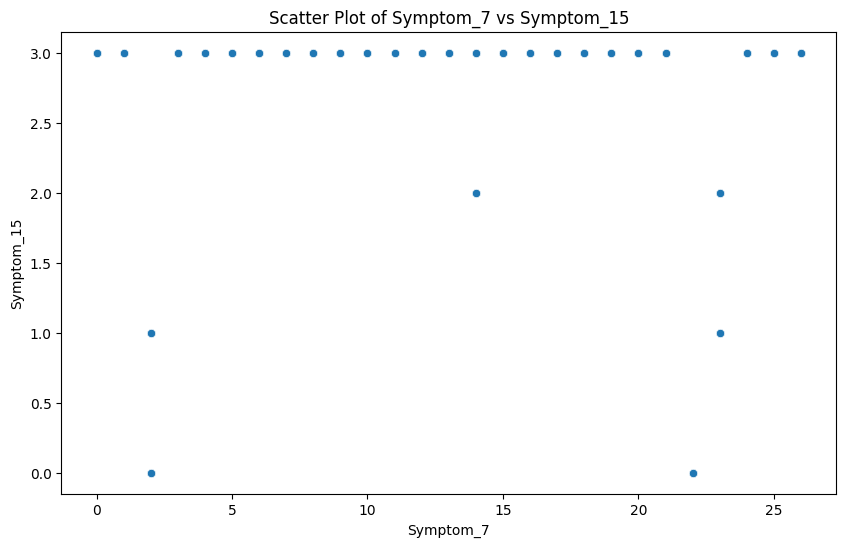

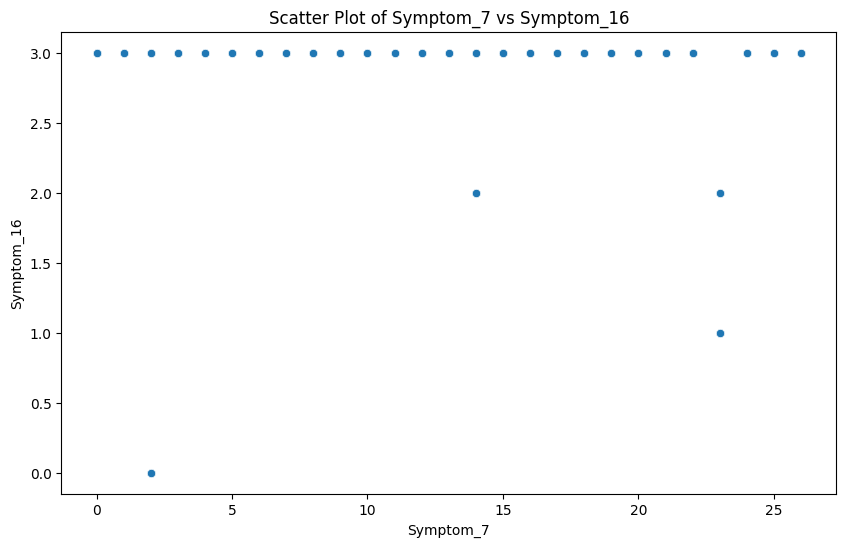

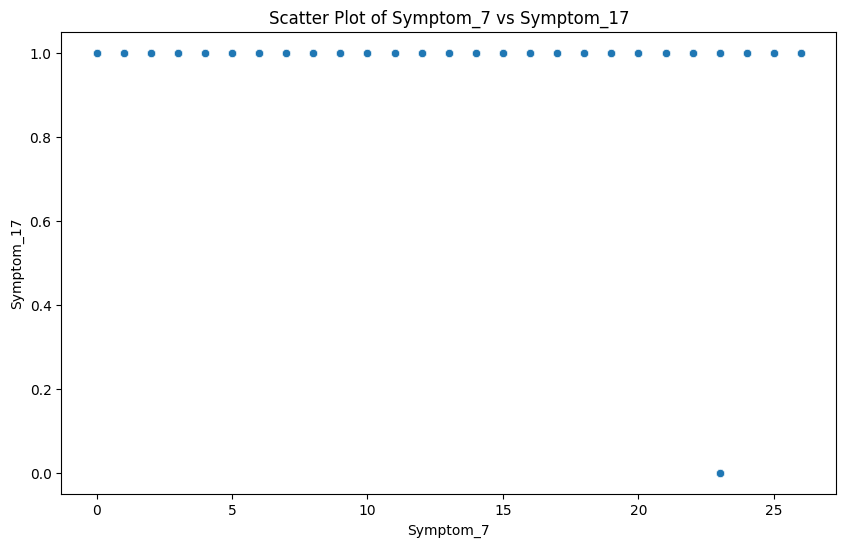

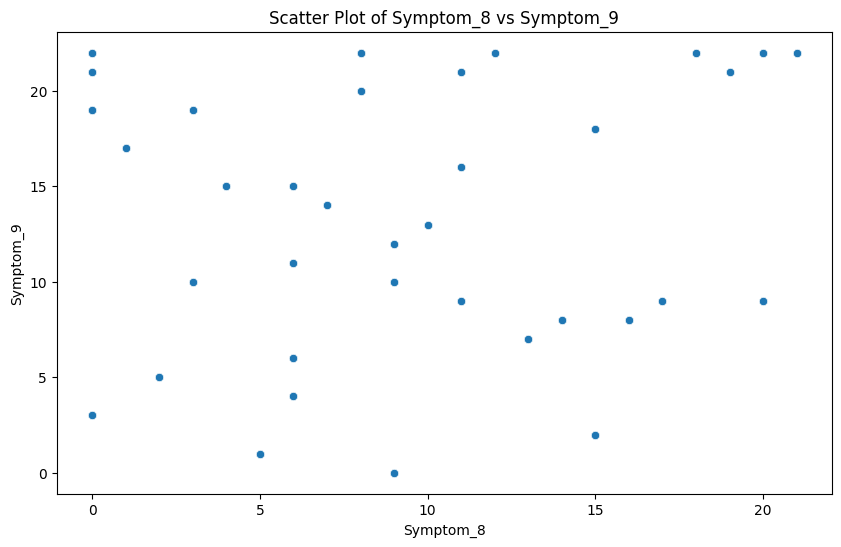

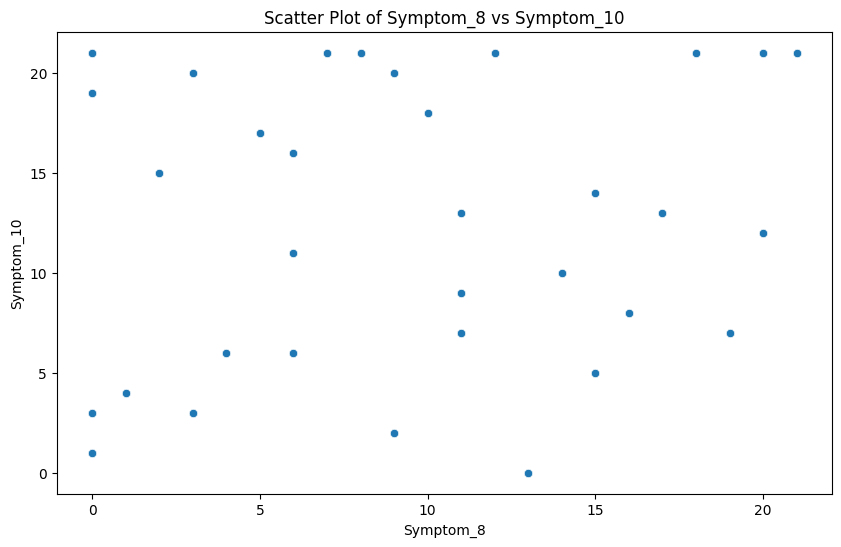

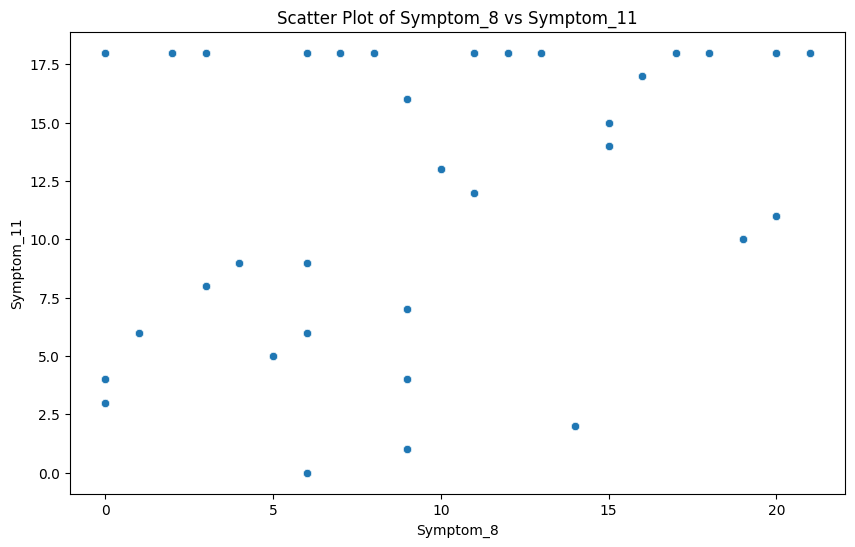

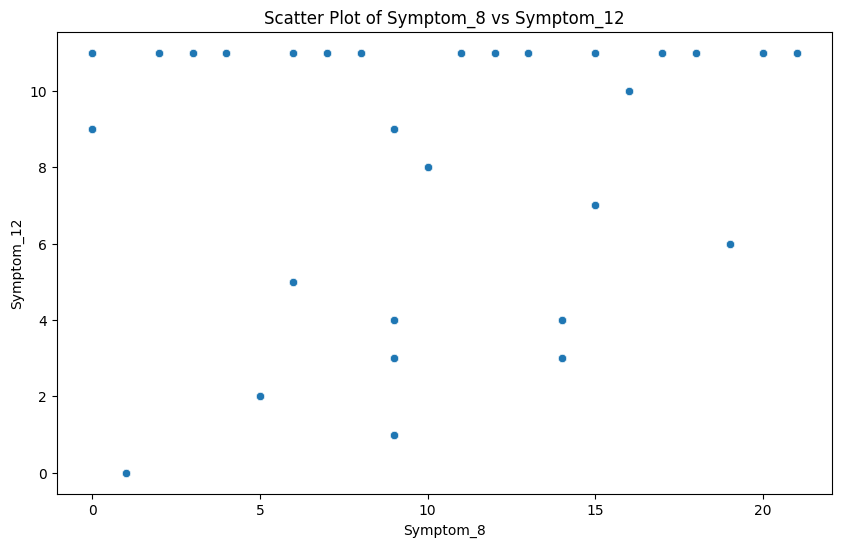

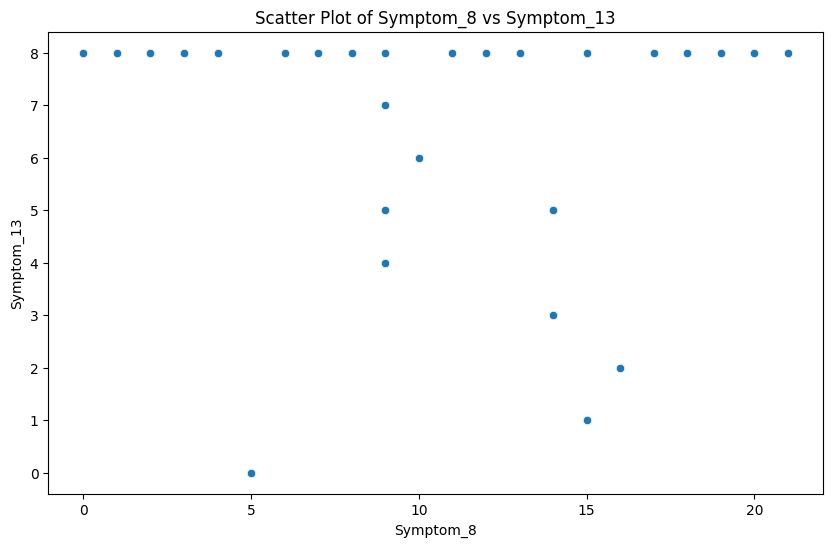

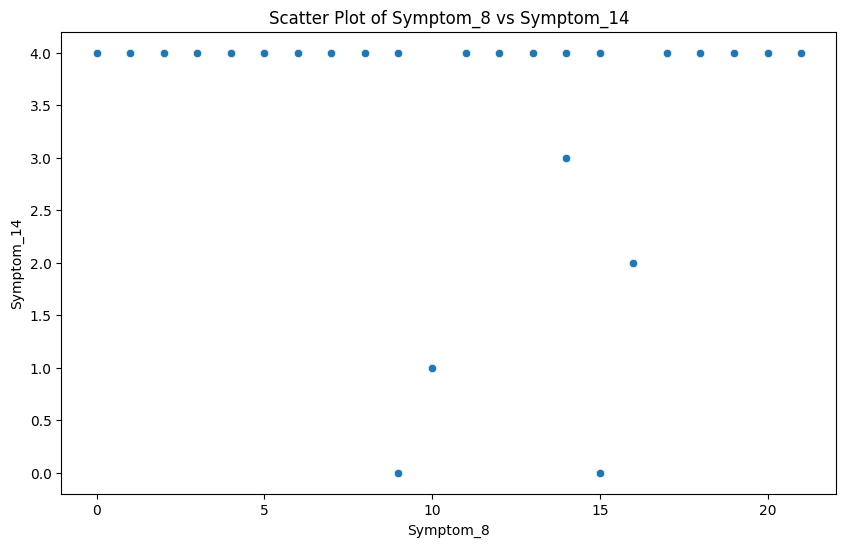

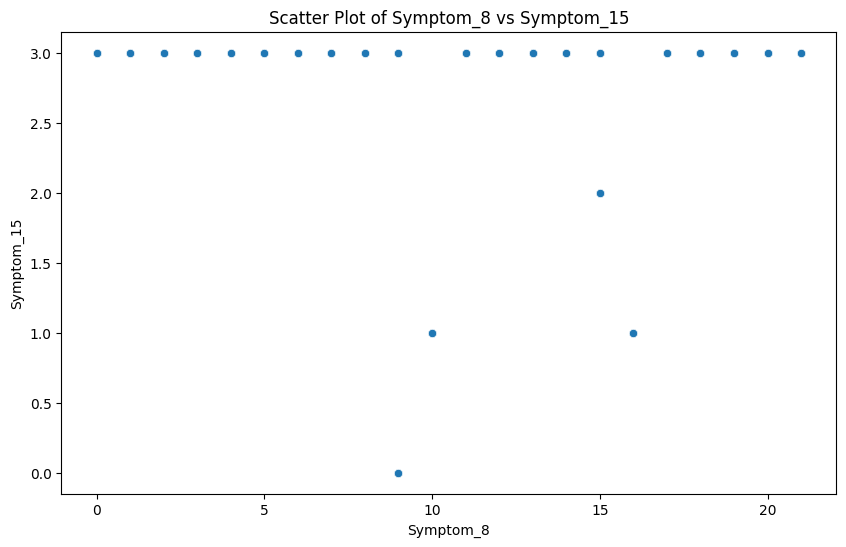

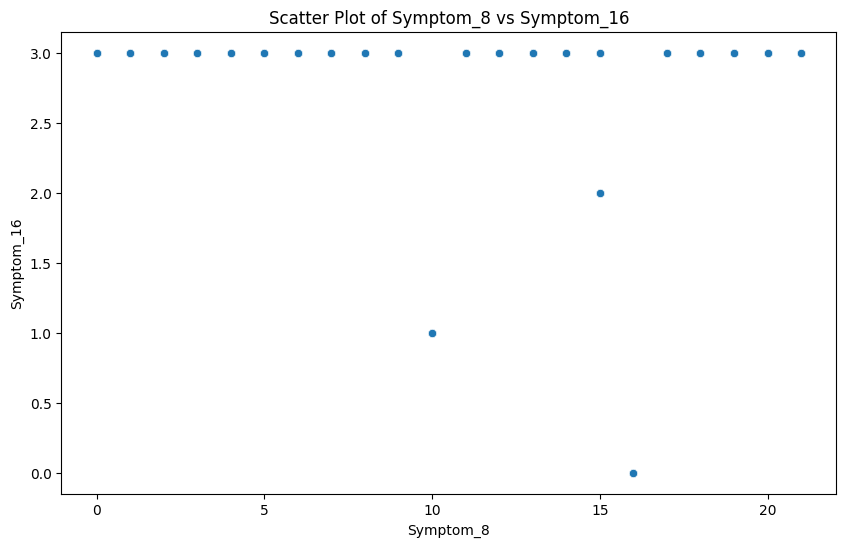

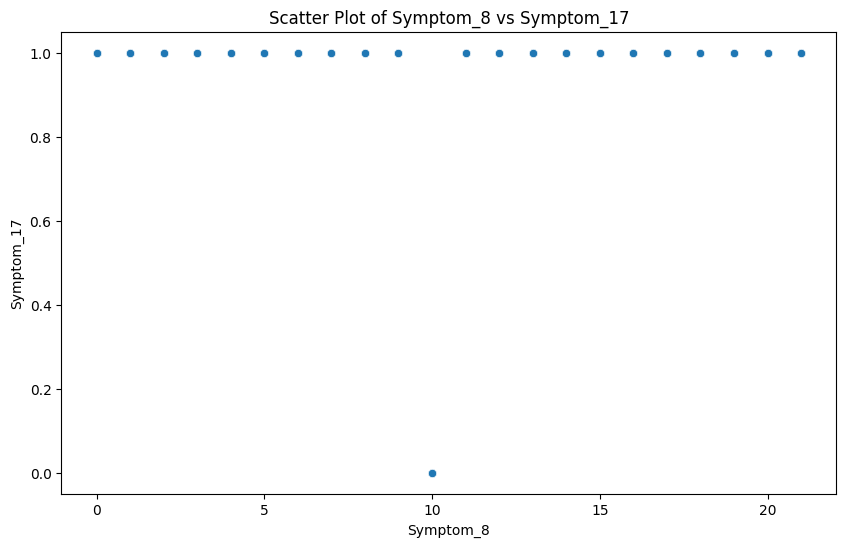

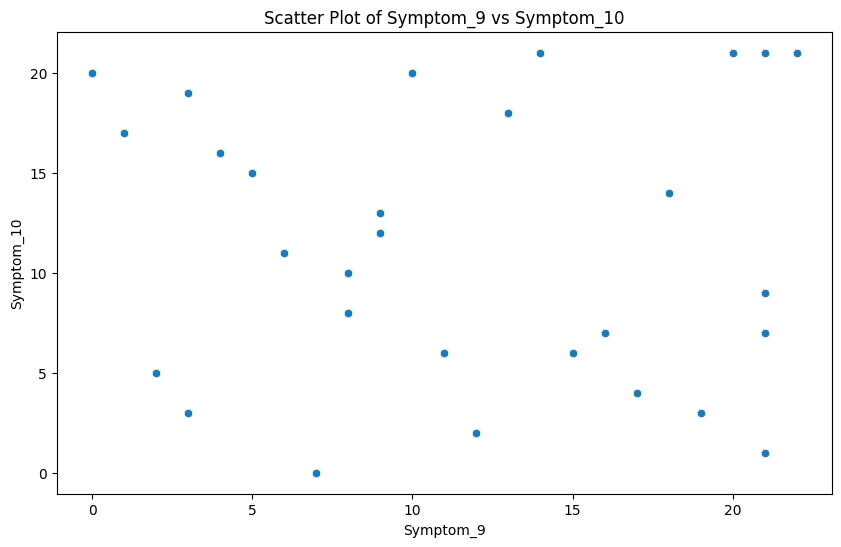

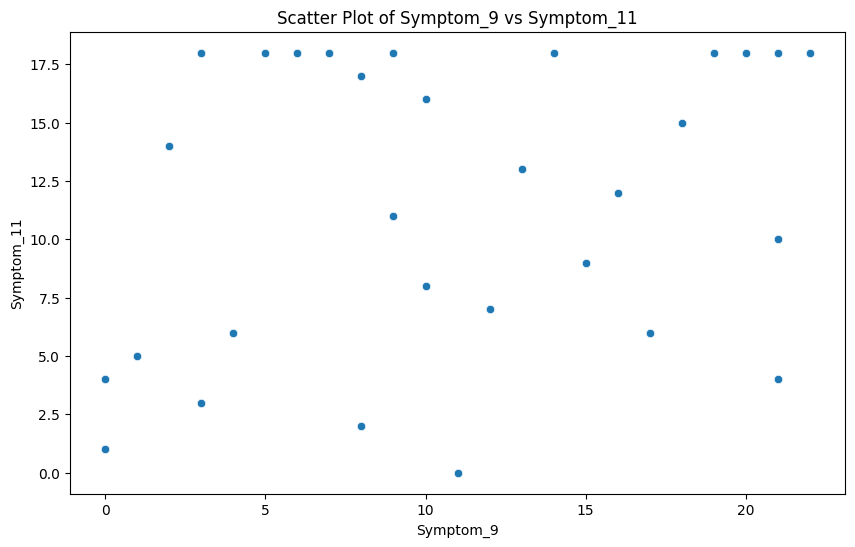

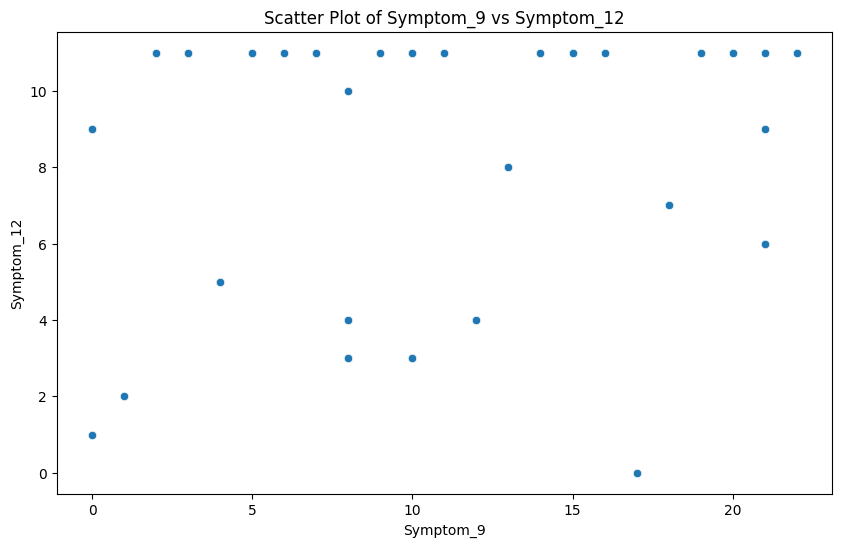

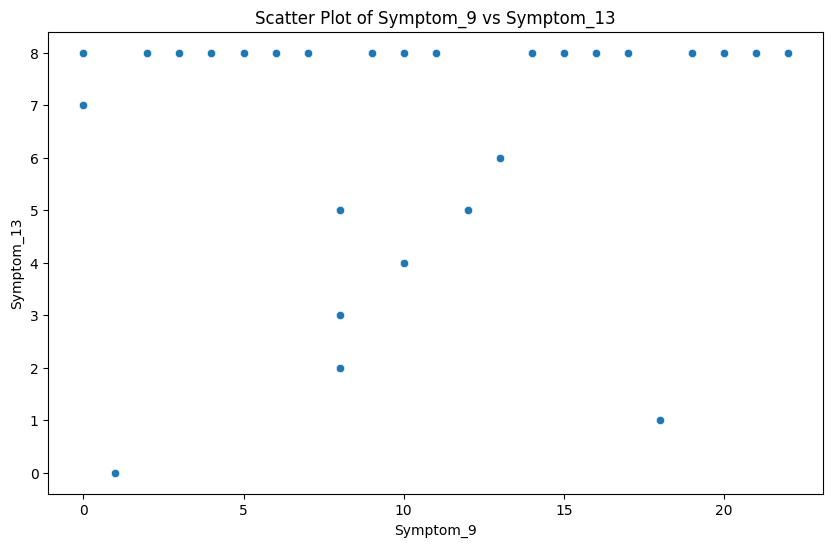

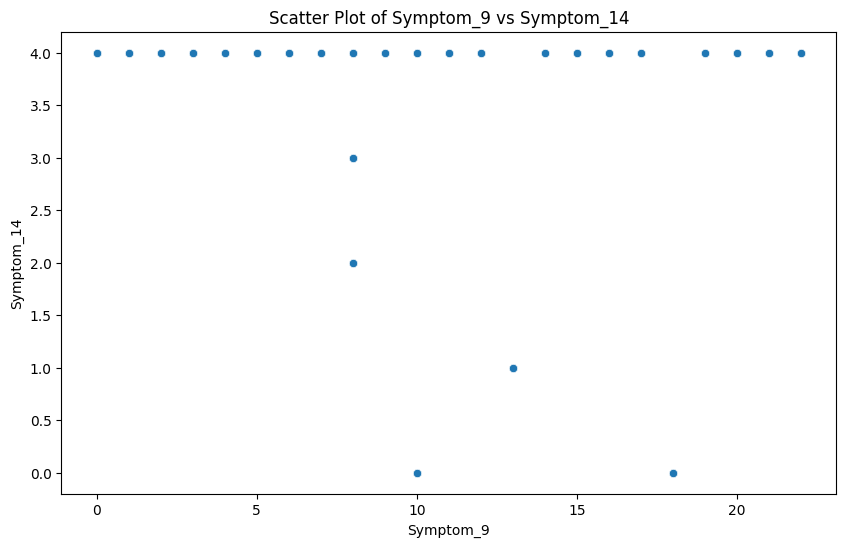

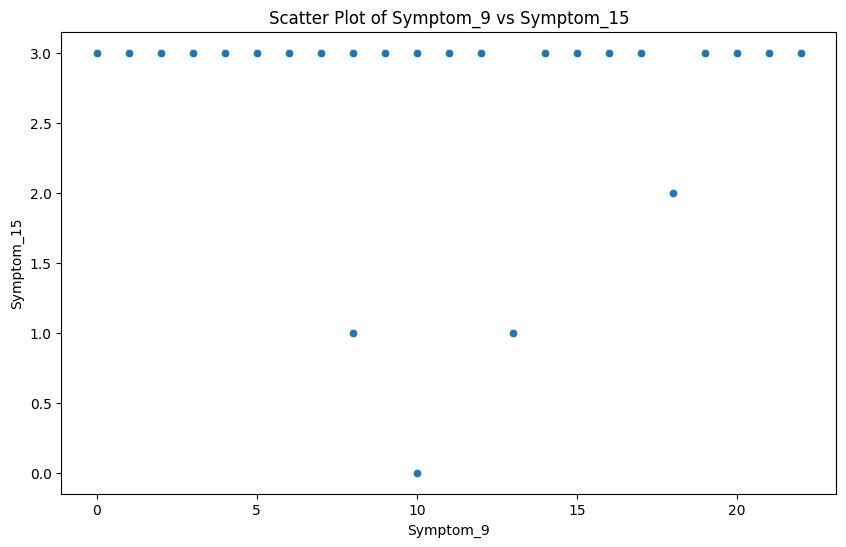

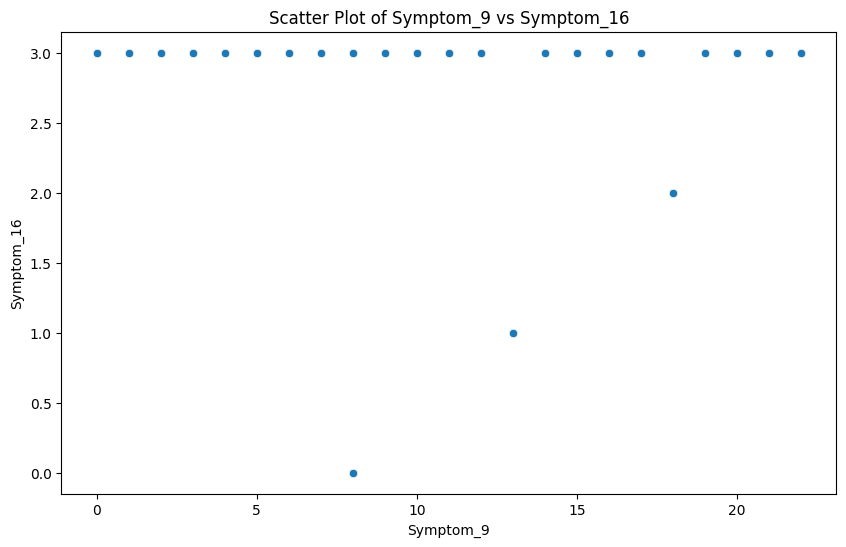

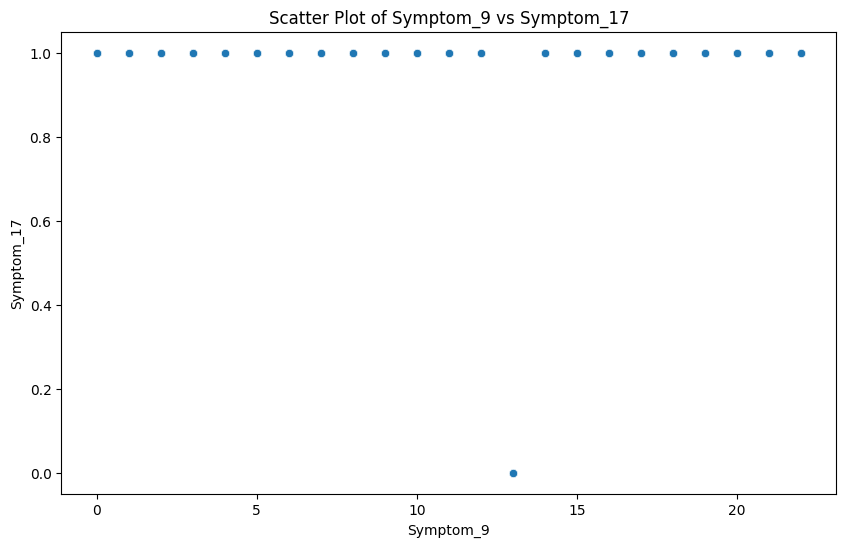

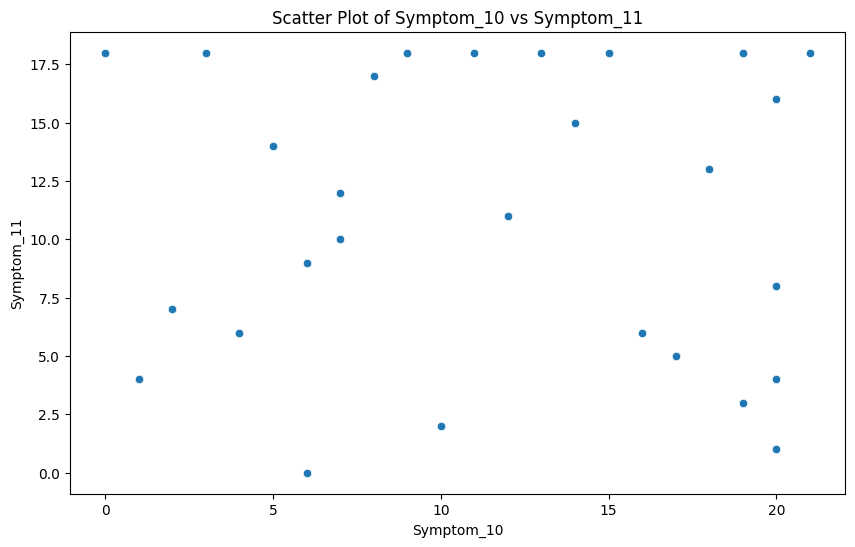

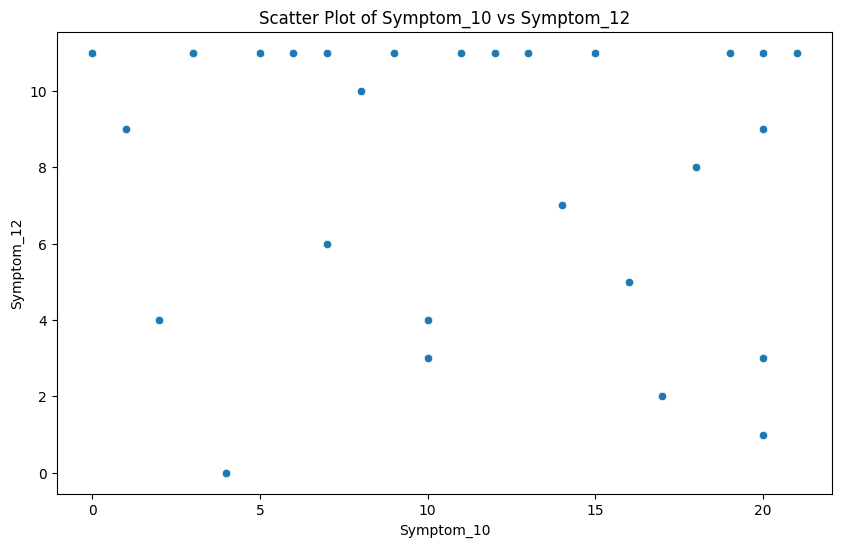

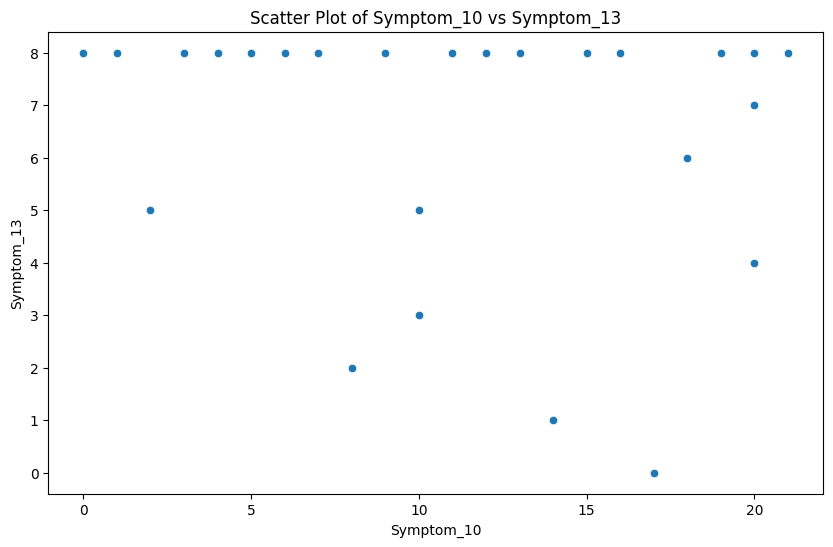

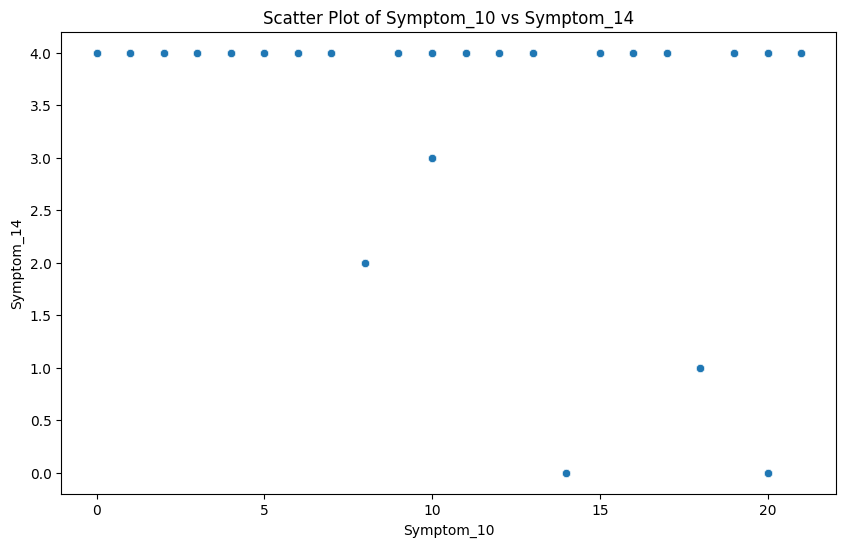

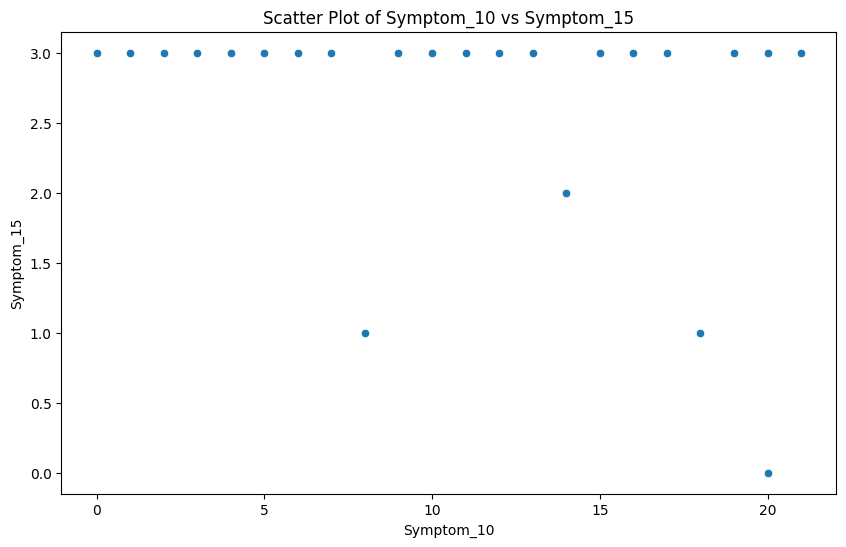

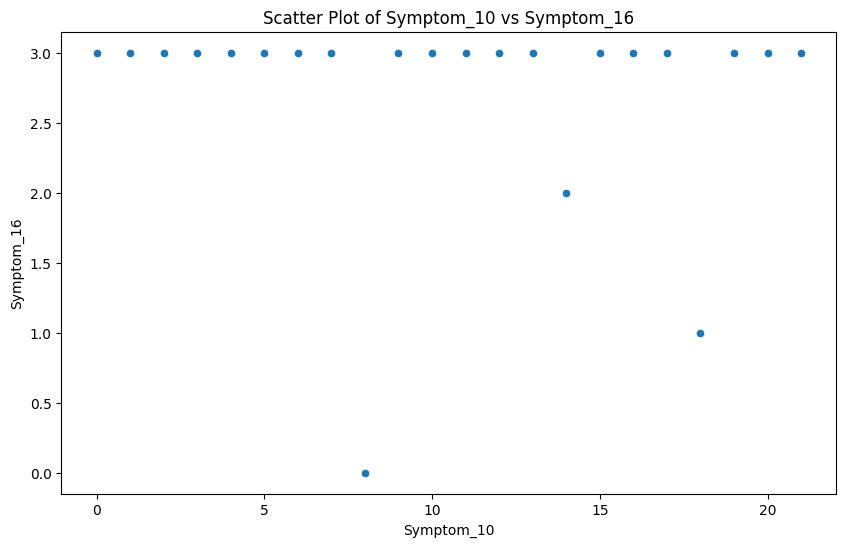

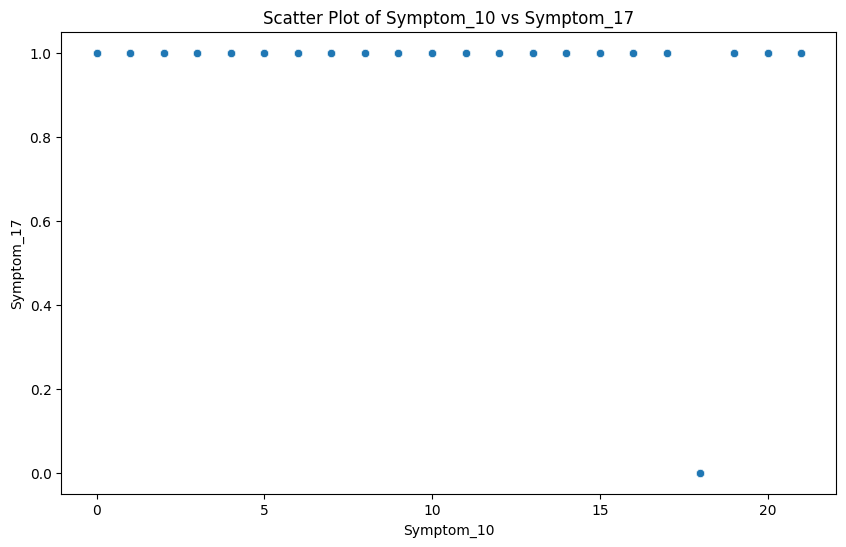

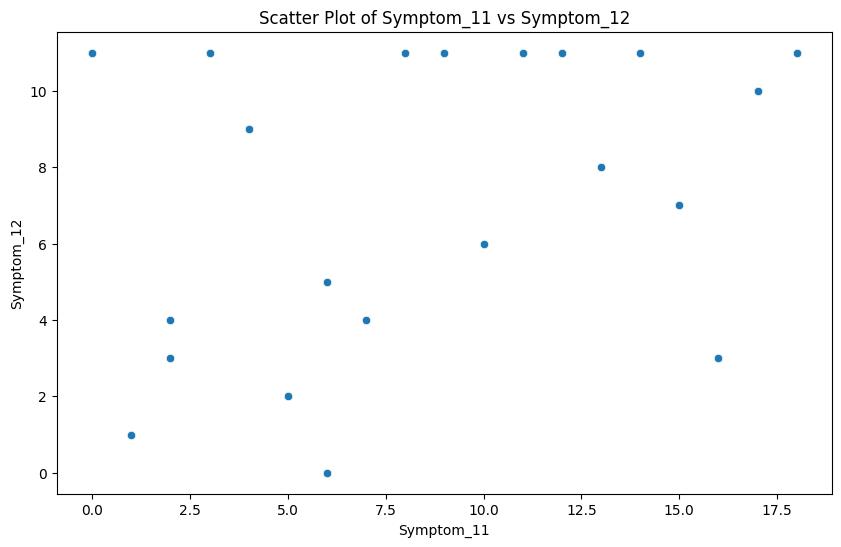

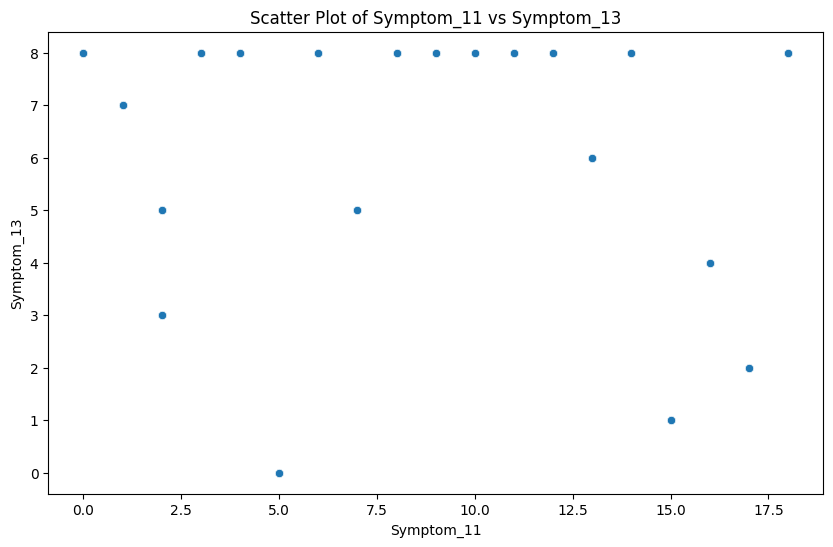

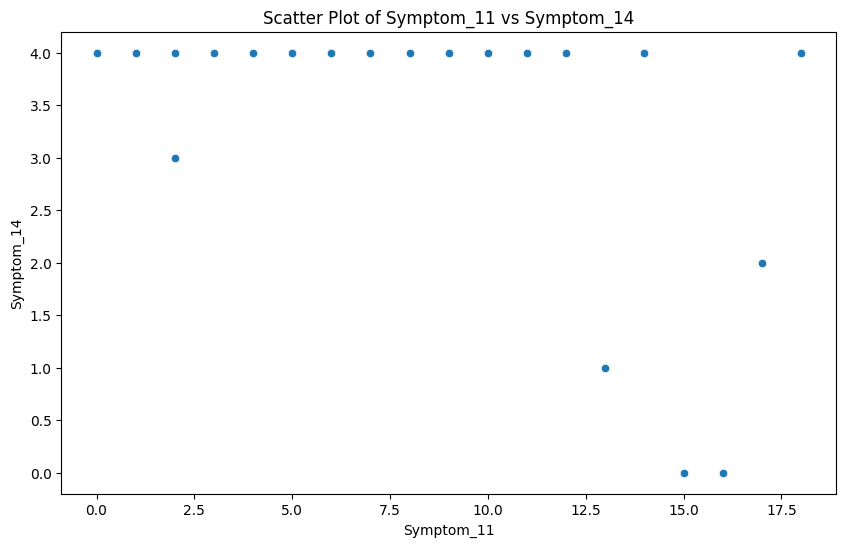

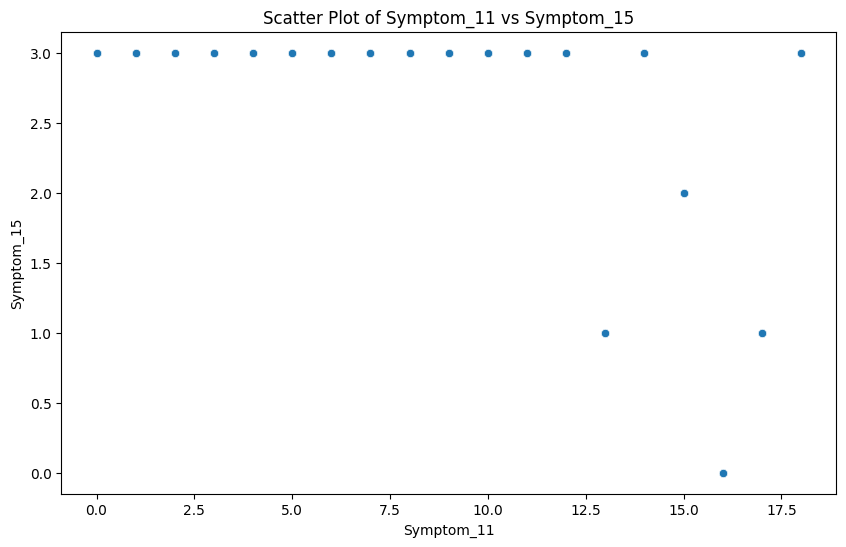

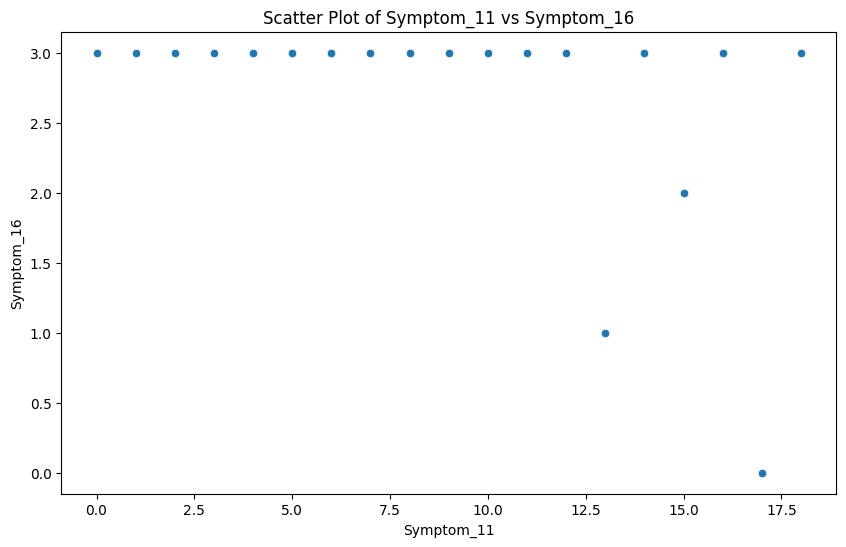

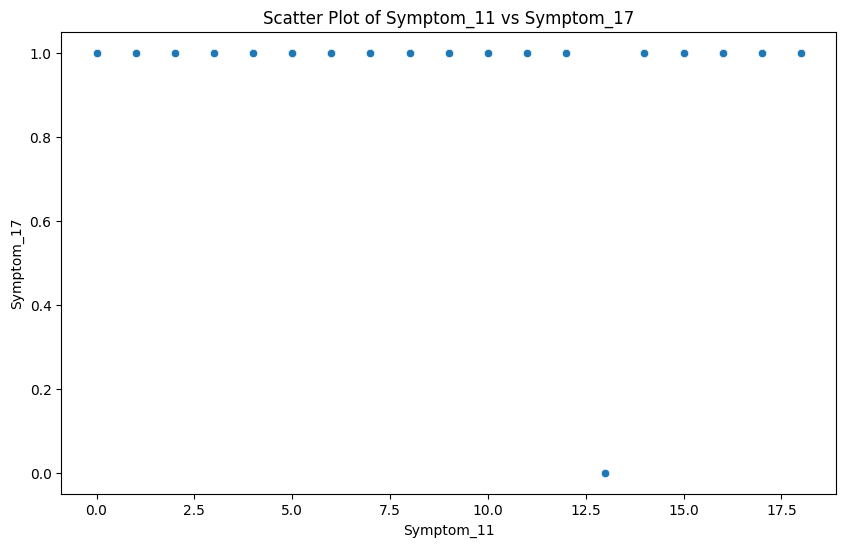

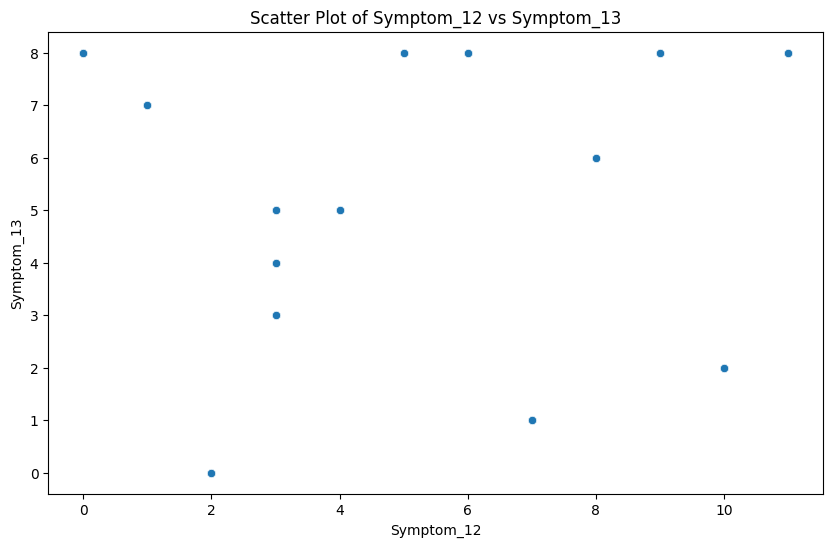

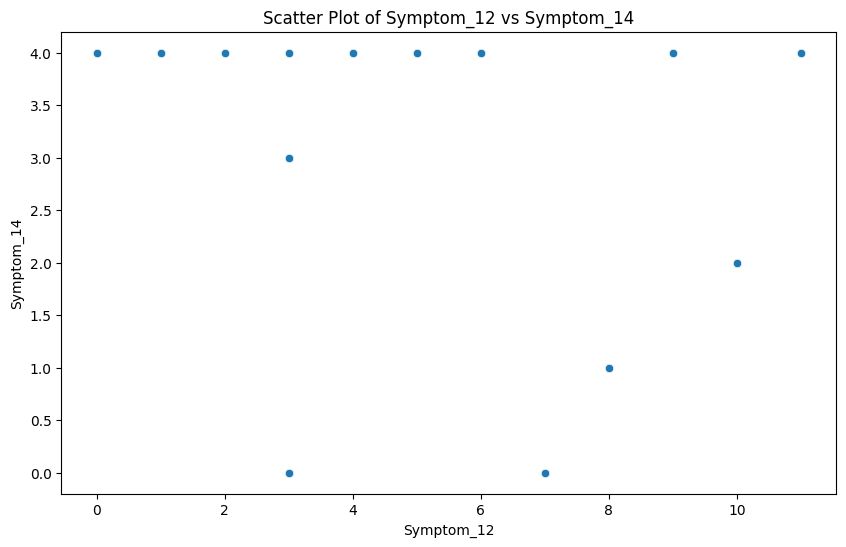

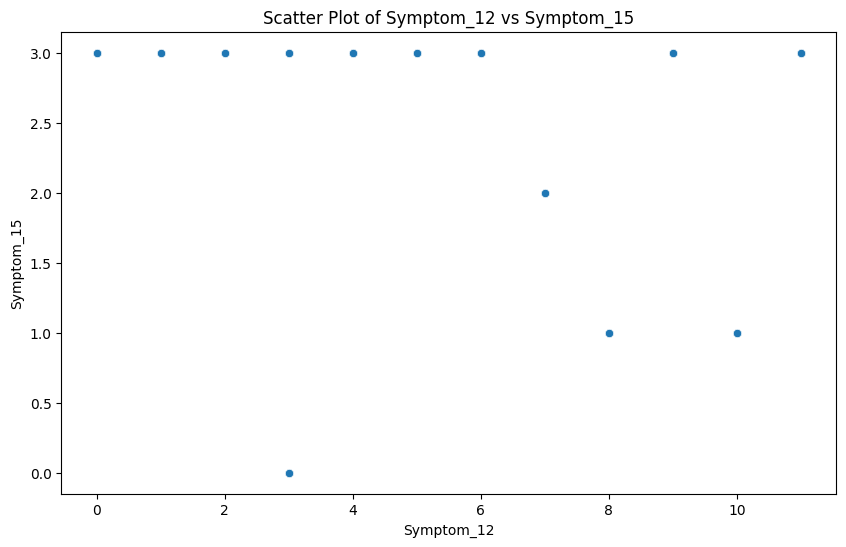

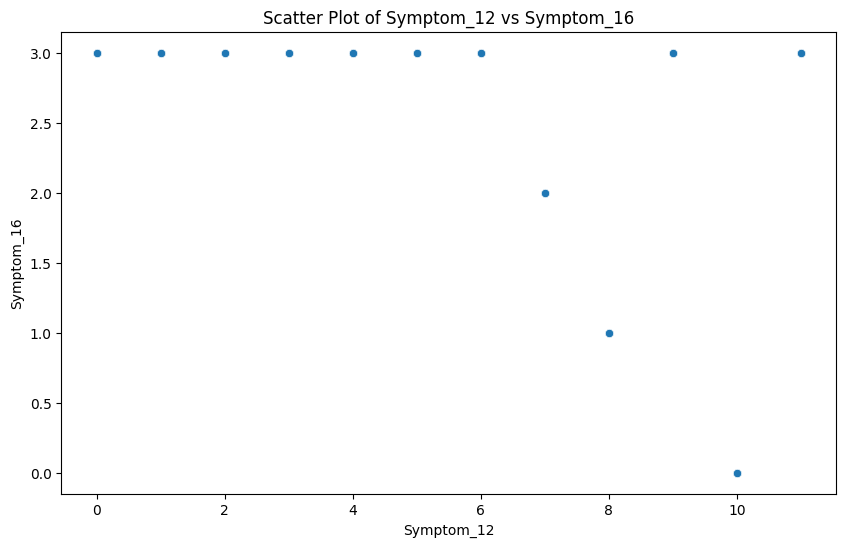

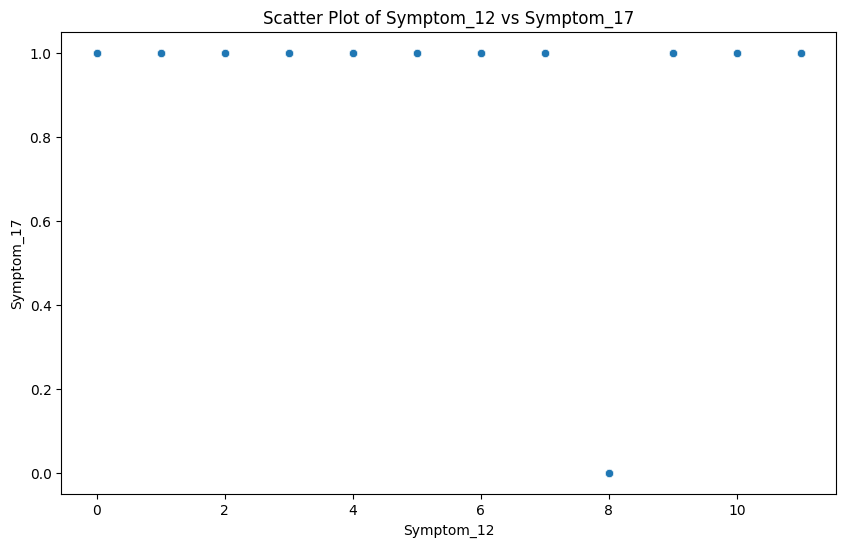

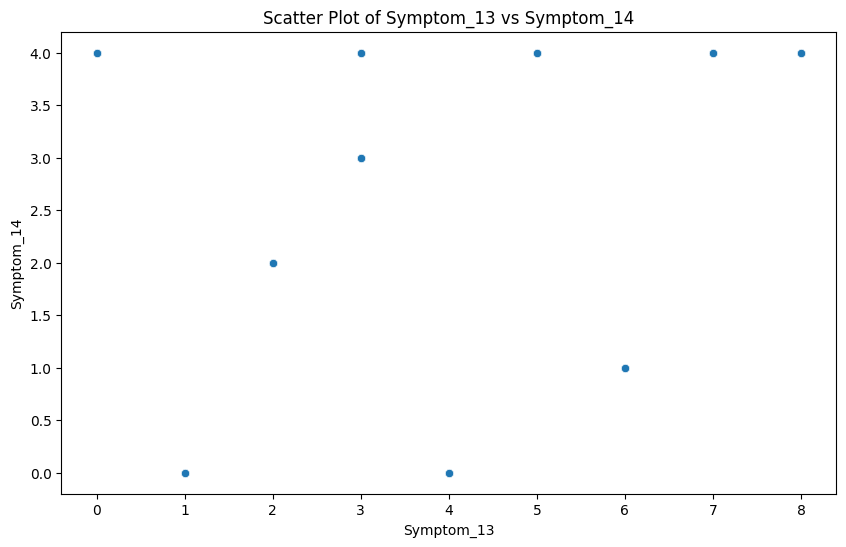

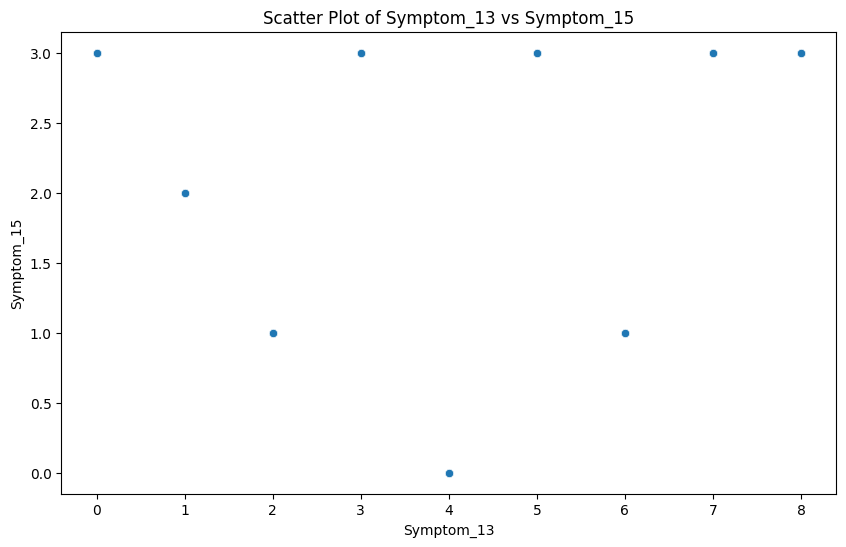

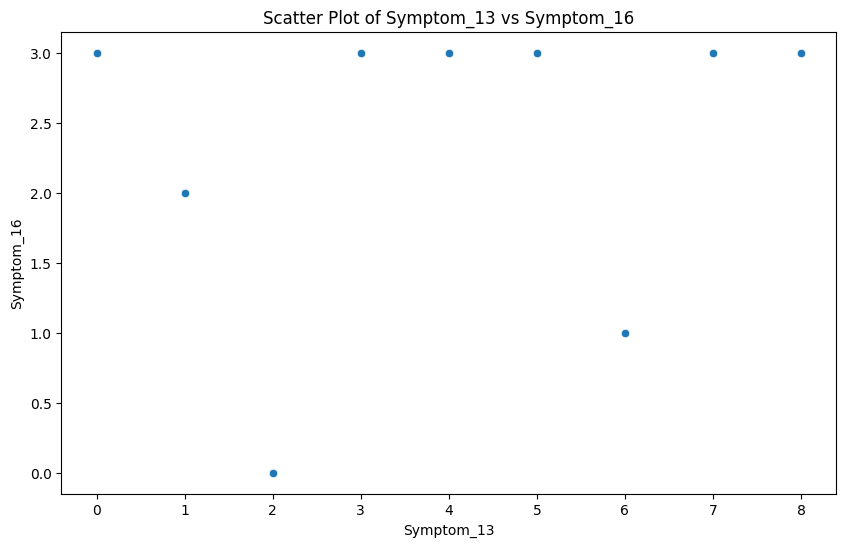

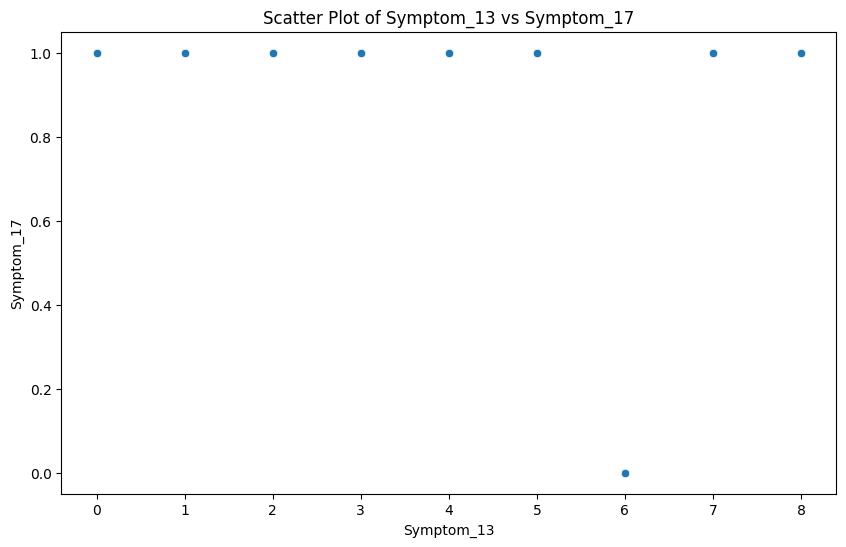

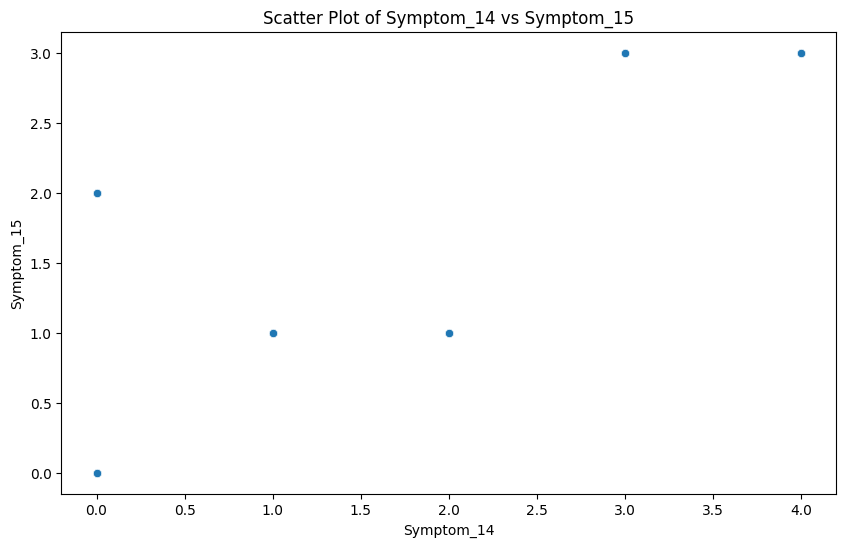

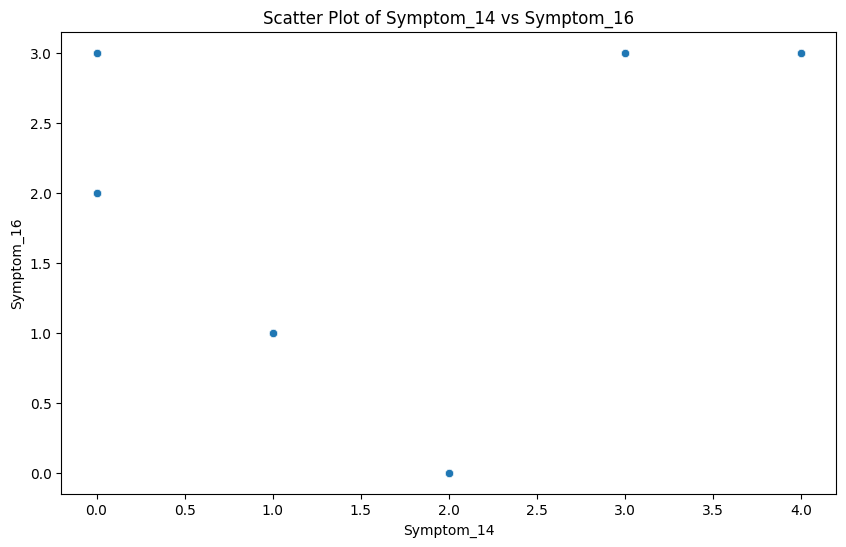

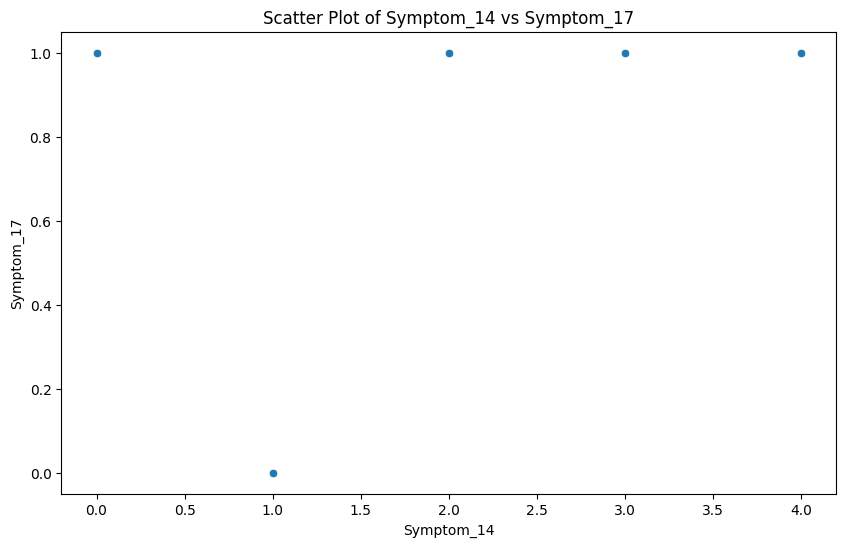

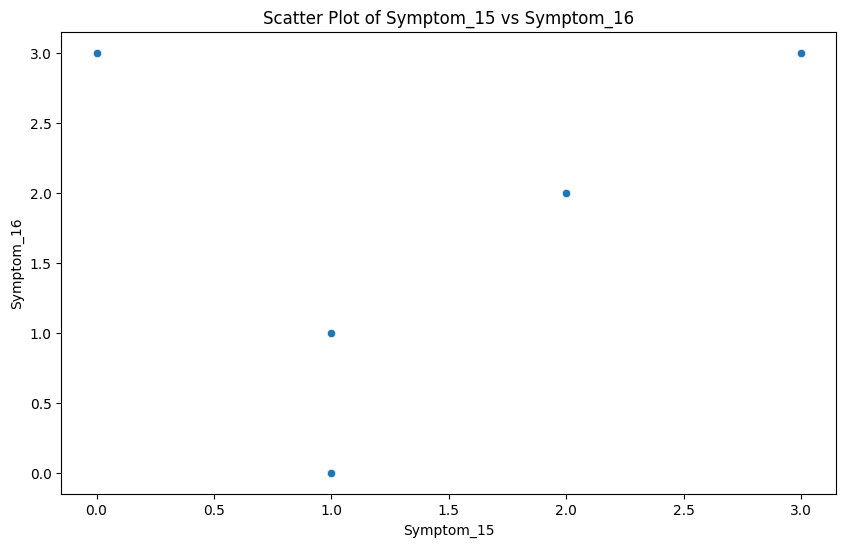

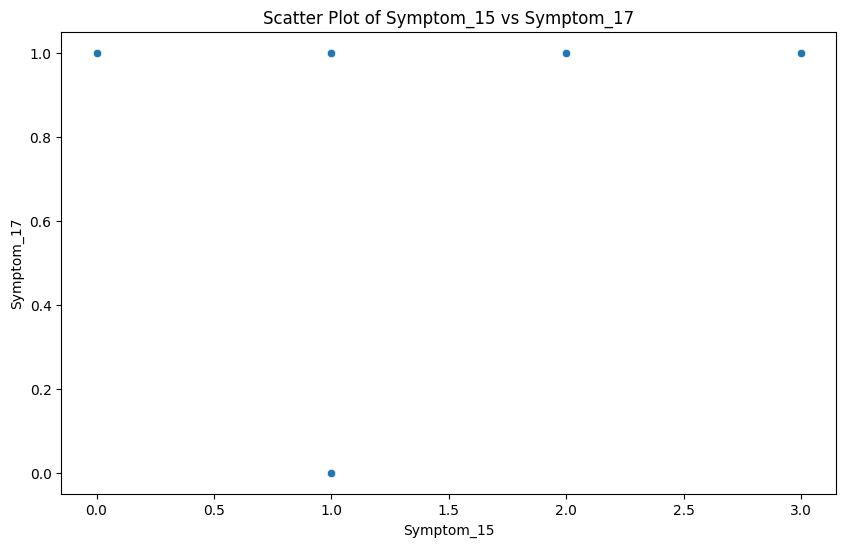

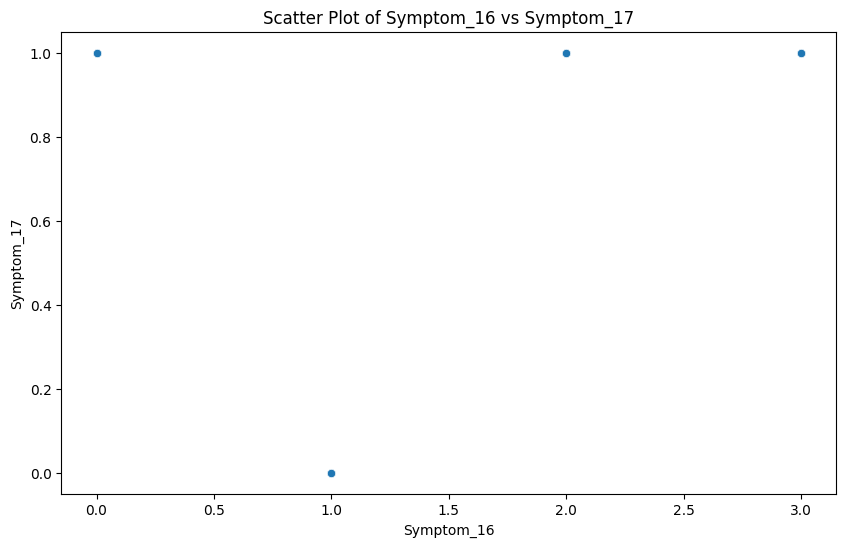

In [29]:
#plot all the graph 

import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot
def box_plot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

# Scatter Plot
def scatter_plot(df, x_column, y_column):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[x_column], y=df[y_column])
    plt.title(f'Scatter Plot of {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Bar Plot
def bar_plot(df, column):
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Pie Chart
def pie_chart(df, column):
    plt.figure(figsize=(8, 8))
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Pie Chart of {column}')
    plt.ylabel('')
    plt.show()

# Iterate through columns and generate plots
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        pie_chart(data, column)
    if data[column].dtype == 'object':
        scatter_plot(data, column)
        pie_chart(data, column)

# scatter plots for all pairs of numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        scatter_plot(data,numerical_columns[i], numerical_columns[j])


In [ ]:
#  pie chart of the distribution of 'Disease'
import matplotlib.pyplot as plt
data['Disease'].value_counts().plot.pie()
plt.show()


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Disease     4920 non-null   int64
 1   Symptom_1   4920 non-null   int64
 2   Symptom_2   4920 non-null   int64
 3   Symptom_3   4920 non-null   int64
 4   Symptom_4   4920 non-null   int64
 5   Symptom_5   4920 non-null   int64
 6   Symptom_6   4920 non-null   int64
 7   Symptom_7   4920 non-null   int64
 8   Symptom_8   4920 non-null   int64
 9   Symptom_9   4920 non-null   int64
 10  Symptom_10  4920 non-null   int64
 11  Symptom_11  4920 non-null   int64
 12  Symptom_12  4920 non-null   int64
 13  Symptom_13  4920 non-null   int64
 14  Symptom_14  4920 non-null   int64
 15  Symptom_15  4920 non-null   int64
 16  Symptom_16  4920 non-null   int64
 17  Symptom_17  4920 non-null   int64
dtypes: int64(18)
memory usage: 692.0 KB


In [24]:
data.describe().T

count       mean        std  min   25%   50%   75%   max
Disease     4920.0  20.000000  11.833362  0.0  10.0  20.0  30.0  40.0
Symptom_1   4920.0  18.095122  10.234807  0.0  11.0  15.0  28.0  33.0
Symptom_2   4920.0  26.941463  13.968681  0.0  15.0  28.0  42.0  47.0
Symptom_3   4920.0  27.067073  14.795179  0.0  19.0  24.0  39.0  53.0
Symptom_4   4920.0  26.698780  15.523655  0.0  13.0  26.0  40.0  50.0
Symptom_5   4920.0  22.830488  12.333713  0.0  12.0  23.0  37.0  38.0
Symptom_6   4920.0  21.917073  10.610690  0.0  13.0  25.0  32.0  32.0
Symptom_7   4920.0  19.010976   9.141491  0.0  12.0  26.0  26.0  26.0
Symptom_8   4920.0  16.219512   7.067688  0.0  11.0  21.0  21.0  21.0
Symptom_9   4920.0  18.135366   6.617353  0.0  16.0  22.0  22.0  22.0
Symptom_10  4920.0  17.981707   5.668923  0.0  18.0  21.0  21.0  21.0
Symptom_11  4920.0  15.600000   4.955275  0.0  18.0  18.0  18.0  18.0
Symptom_12  4920.0  10.071951   2.502145  0.0  11.0  11.0  11.0  11.0
Symptom_13  4920.0   7.541463   1.553906  0.0   8.0   8.0   8.0   8.0
Symptom_14  4920.0   3.835366   0.699177  0.0   4.0   4.0   4.0   4.0
Symptom_15  4920.0   2.902439   0.452943  0.0   3.0   3.0   3.0   3.0
Symptom_16  4920.0   2.917073   0.439502  0.0   3.0   3.0   3.0   3.0
Symptom_17  4920.0   0.985366   0.120095  0.0   1.0   1.0   1.0   1.0

from matplotlib import pyplot as plt
_df_0['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['25%'].plot(kind='hist', bins=20, title='25%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['50%'].plot(kind='hist', bins=20, title='50%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='std', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='25%', y='50%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='50%', y='75%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['25%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('25%')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['50%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('50%')

from matplotlib import pyplot as plt
_df_12['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['25%'].plot(kind='line', figsize=(8, 4), title='25%')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['50%'].plot(kind='line', figsize=(8, 4), title='50%')
plt.gca().spines[['top', 'right']].set_visible(False)

In [11]:
def evaluate_models(models, X_test, y_test):
    for name, model in models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {accuracy}")
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))

# Evaluate models
evaluate_models(models, X_test, y_test)


Logistic Regression Accuracy: 0.9176829268292683
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.67      0.53      0.59        30
           2       0.68      0.79      0.73        24
           3       1.00      0.96      0.98        25
           4       0.60      1.00      0.75        24
           5       0.90      0.78      0.84        23
           6       1.00      0.97      0.98        33
           7       1.00      0.74      0.85        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      0.86      0.93        29
          14       1.00      0.67      0.80        24
          15       0.64      0.84      0.73        19
          16       0.97      1.0

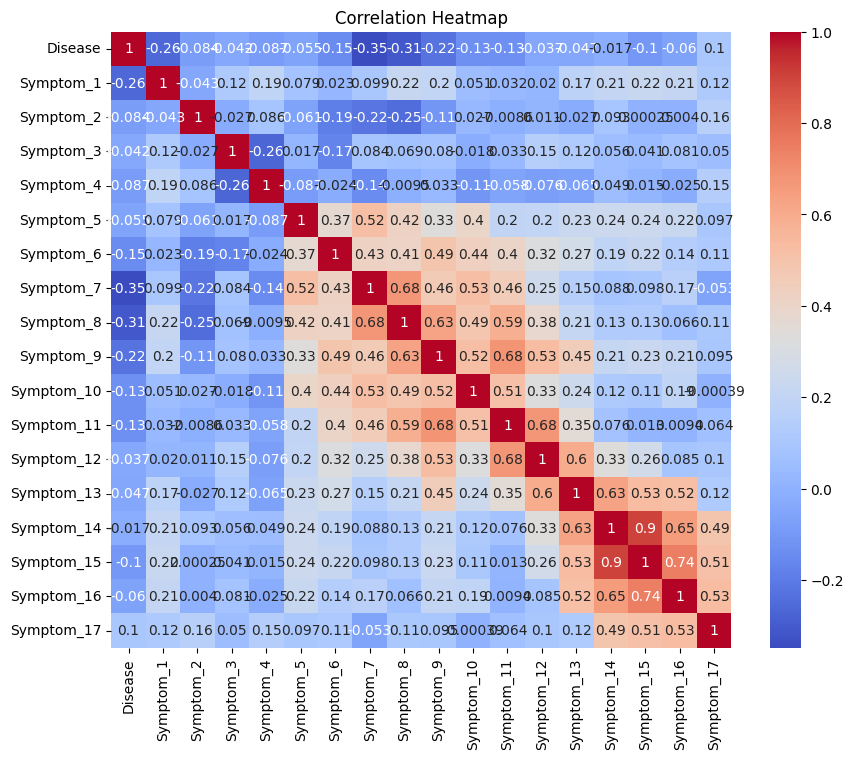

In [12]:
# code for heatmap visulaization

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [19]:
# Random Forest model for prediction
model_name = 'Random Forest'
if model_name in models:
  model = models[model_name]
  y_pred = model.predict(X_test)

  # Displaying predictions
  print("Predictions:")
  for i in range(len(y_pred)):
    original_label = label_encoders[target_column].inverse_transform([y_pred[i]])[0]
    print(f"Sample {i+1}: Predicted - {original_label}")
else:
  print(f"Model '{model_name}' not found.")


Predictions:
Sample 1: Predicted - Acne
Sample 2: Predicted - Acne
Sample 3: Predicted - Hyperthyroidism
Sample 4: Predicted - AIDS
Sample 5: Predicted - Chronic cholestasis
Sample 6: Predicted - Hypertension 
Sample 7: Predicted - Hypoglycemia
Sample 8: Predicted - Arthritis
Sample 9: Predicted - Hepatitis B
Sample 10: Predicted - Migraine
Sample 11: Predicted - Urinary tract infection
Sample 12: Predicted - Diabetes 
Sample 13: Predicted - Hepatitis D
Sample 14: Predicted - Psoriasis
Sample 15: Predicted - Alcoholic hepatitis
Sample 16: Predicted - Alcoholic hepatitis
Sample 17: Predicted - Dimorphic hemmorhoids(piles)
Sample 18: Predicted - Hepatitis E
Sample 19: Predicted - Diabetes 
Sample 20: Predicted - Cervical spondylosis
Sample 21: Predicted - Bronchial Asthma
Sample 22: Predicted - hepatitis A
Sample 23: Predicted - Hepatitis B
Sample 24: Predicted - Bronchial Asthma
Sample 25: Predicted - Allergy
Sample 26: Predicted - Hepatitis C
Sample 27: Predicted - Pneumonia
Sample 28: